In [2]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import os
import seaborn as sns
import anndata as ad
import scanpy as sc
import scanorama

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 louvain==0.7.1 pynndescent==0.5.7


In [4]:
Puram_tpm_ann = sc.read_h5ad('./Puram/Puram_scanpy.h5ad')
Puram_tpm_ann.uns['log1p']["base"] = None
Puram_tpm_ann

AnnData object with n_obs × n_vars = 4956 × 21437
    obs: 'Cell_type', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'batch_colors', 'doublet_info_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
# read in Puram metadata
sample_meta = pd.read_csv("./Puram/HNSCC%2FGSE103322_sample_metadata.txt",sep='\t')
sample_meta

cell patient_id_source  patient  \
0            HNSCC5_p3_HNSCC5_P3_D09            HNSCC5        5   
1            HNSCC5_p3_HNSCC5_P3_E10            HNSCC5        5   
2            HNSCC5_p3_HNSCC5_P3_A10            HNSCC5        5   
3            HNSCC5_p3_HNSCC5_P3_E03            HNSCC5        5   
4            HNSCC5_p3_HNSCC5_P3_E09            HNSCC5        5   
...                              ...               ...      ...   
5897  HNSCC_combo2_HNSCC_ComboP2_B07             HNSCC        0   
5898  HNSCC_combo2_HNSCC_ComboP2_C10             HNSCC        0   
5899  HNSCC_combo2_HNSCC_ComboP2_D10             HNSCC        0   
5900  HNSCC_combo2_HNSCC_ComboP2_E04             HNSCC        0   
5901  HNSCC_combo2_HNSCC_ComboP2_D07             HNSCC        0   

                 tumor site  
0     Primary (oral cavity)  
1     Primary (oral cavity)  
2     Primary (oral cavity)  
3     Primary (oral cavity)  
4     Primary (oral cavity)  
...                     ...  
5897             Lymph node  
5898  Primary (oral cavity)  
5899  Primary (oral cavity)  
5900  Primary (oral cavity)  
5901             Lymph node  

[5902 rows x 4 columns]

In [5]:
# Get MEEI5 patient info
MEEI5 = sample_meta[sample_meta['patient'] == 5]['cell'].tolist()
len(MEEI5) # num of single cells 

370

In [30]:
df_Puram = pd.read_csv("/home/cke/Puram/HNSCC2PuramGSE103322_HNSCC_exp.tsv",sep='\t',index_col='X')

In [31]:
df_Puram

HN28_P15_D06_S330_comb  HN28_P6_G05_S173_comb  \
X                                                                
ENSG00000121410                0.000000                0.00000   
ENSG00000268895                0.000000                0.00000   
ENSG00000148584                0.000000                0.00000   
ENSG00000175899                9.683000                7.58300   
ENSG00000245105                0.176320                0.00000   
...                                 ...                    ...   
ENSG00000203995                0.163500                0.27977   
ENSG00000162378                0.090853                3.93480   
ENSG00000159840                4.274800                0.00000   
ENSG00000074755                0.000000                3.77160   
ENSG00000036549                0.000000                0.00000   

                 HN26_P14_D11_S239_comb  HN26_P14_H05_S281_comb  \
X                                                                 
ENSG00000121410                0.000000                 0.00000   
ENSG00000268895                0.000000                 0.00000   
ENSG00000148584                0.000000                 0.00000   
ENSG00000175899                0.029983                 6.05470   
ENSG00000245105                0.000000                 0.00000   
...                                 ...                     ...   
ENSG00000203995                0.000000                 0.18650   
ENSG00000162378                0.073135                 0.21412   
ENSG00000159840                0.000000                 0.12433   
ENSG00000074755                1.304500                 0.09356   
ENSG00000036549                2.112000                 0.00000   

                 HN26_P25_H09_S189_comb  HN26_P14_H06_S282_comb  \
X                                                                 
ENSG00000121410                 0.00000                0.066261   
ENSG00000268895                 0.00000                0.000000   
ENSG00000148584                 0.00000                0.000000   
ENSG00000175899                 0.00000                0.000000   
ENSG00000245105                 0.00000                0.000000   
...                                 ...                     ...   
ENSG00000203995                 0.13356                0.063503   
ENSG00000162378                 2.90590                0.051024   
ENSG00000159840                 3.00340                0.605020   
ENSG00000074755                 0.00000                0.000000   
ENSG00000036549                 0.00000                0.000000   

                 HN25_P25_C04_S316_comb  HN26_P25_A11_S107_comb  \
X                                                                 
ENSG00000121410                 0.00000                0.541020   
ENSG00000268895                 0.00000                0.000000   
ENSG00000148584                 0.00000                0.000000   
ENSG00000175899                 0.19661                7.706000   
ENSG00000245105                 0.00000                0.000000   
...                                 ...                     ...   
ENSG00000203995                 1.08810                0.067639   
ENSG00000162378                 0.85599                0.000000   
ENSG00000159840                 0.00000                5.292800   
ENSG00000074755                 0.85679                0.000000   
ENSG00000036549                 0.00000                0.000000   

                 HN26_P25_C09_S129_comb  HNSCC26_P24_H05_S377_comb  ...  \
X                                                                   ...   
ENSG00000121410                0.000000                    1.30040  ...   
ENSG00000268895                0.000000                    0.00000  ...   
ENSG00000148584                0.000000                    0.00000  ...   
ENSG00000175899                0.000000                    0.00000  ...   
ENSG00000245105                0.000000                    2.61920  ...   
...              

In [42]:
df_Puram_symbol = pd.read_csv("/home/cke/Puram/HNSCC%2FGSE103322_HNSCC_exp.txt",sep='\t',index_col=0)
df_Puram_symbol

HN28_P15_D06_S330_comb  HN28_P6_G05_S173_comb  \
C9orf152                0.000000                0.00000   
RPS11                   6.003700                7.30060   
ELMO2                   0.000000                0.00000   
CREB3L1                 0.000000                0.00000   
PNMA1                   5.147400                5.33290   
...                          ...                    ...   
PIK3IP1                 0.000000                0.00000   
SNRPD2                  0.000000                5.08460   
SLC39A6                 0.000000                0.00000   
CTSC                    0.062122                0.28214   
AQP7                    0.000000                0.00000   

          HN26_P14_D11_S239_comb  HN26_P14_H05_S281_comb  \
C9orf152                 0.42761                 0.00000   
RPS11                    7.28850                 0.00000   
ELMO2                    0.00000                 5.24650   
CREB3L1                  0.00000                 0.00000   
PNMA1                    2.83370                 5.75070   
...                          ...                     ...   
PIK3IP1                  3.02340                 6.27430   
SNRPD2                   5.82720                 0.00000   
SLC39A6                  0.00000                 0.00000   
CTSC                     3.71960                 0.16864   
AQP7                     0.00000                 0.00000   

          HN26_P25_H09_S189_comb  HN26_P14_H06_S282_comb  \
C9orf152                 0.00000                  0.0000   
RPS11                    7.47420                  6.9548   
ELMO2                    0.50487                  0.0000   
CREB3L1                  0.00000                  0.0000   
PNMA1                    0.19661                  1.9949   
...                          ...                     ...   
PIK3IP1                  3.82610                  3.6801   
SNRPD2                   4.42580                  6.0100   
SLC39A6                  0.00000                  2.1795   
CTSC                     3.41450                  5.0581   
AQP7                     0.00000                  0.0000   

          HN25_P25_C04_S316_comb  HN26_P25_A11_S107_comb  \
C9orf152                  0.0000                 0.00000   
RPS11                     5.9743                 6.46500   
ELMO2                     0.0000                 3.41540   
CREB3L1                   0.0000                 0.00000   
PNMA1                     0.0000                 2.15410   
...                          ...                     ...   
PIK3IP1                   0.0000                 0.00000   
SNRPD2                    0.0000                 0.00000   
SLC39A6                   0.0000                 0.00000   
CTSC                      2.2308                 0.23756   
AQP7                      0.0000                 0.00000   

          HN26_P25_C09_S129_comb  HNSCC26_P24_H05_S377_comb  ...  \
C9orf152                  0.0000                    0.00000  ...   
RPS11                     6.5628                    7.94860  ...   
ELMO2                     0.0000                    1.96130  ...   
CREB3L1                   0.0000                    0.00000  ...   
PNMA1                     3.5815                    0.00000  ...   
...                          ...                        ...  ...   
PIK3IP1                   0.0000                    0.00000  ...   
SNRPD2                    5.1215                    5.43810  ...   
SLC39A6                   0.0000                    0.00000  ...   
CTSC                      4.6274                    0.38184  ...   
AQP7                      0.0000                    0.00000  ...   

          HNSCC20_P3_B10_S22_comb  HNSCC20_P13_B11_S215_comb  \
C9orf152                   0.0000                    0.00000   
RPS11                      6.8747                    5.96490   
ELMO2                      0.0000                    0.62106   
CREB3L1                    0.0000                    0.00000   
P

In [43]:
# map gene symbol to ensembl ids via biomart
import biomart
def get_ensembl_mappings(gene_input):  # list of your ids                                 
    # Set up connection to server                                               
    server = biomart.BiomartServer('http://uswest.ensembl.org/biomart')         
    mart = server.datasets['hsapiens_gene_ensembl']                            
                                                                                
    # List the types of data we want                                            
    attributes = [ 'hgnc_symbol', 'ensembl_gene_id']
                                                                                
    # Get the mapping between the attributes                                    
    response = mart.search({'attributes': attributes})                          
    data = response.raw.data.decode('ascii')                                    
                                                                                
    ensembl = {}                                                  
    # Store the data in a dict                                                  
    for line in data.splitlines():                                              
        line = line.split('\t')                                                 
        # The entries are in the same order as in the `attributes` variable
#         transcript_id = line[0]                                                 
        gene_symbol = line[0]                                                   
        ensembl_gene = line[1]                                                  
#         ensembl_peptide = line[3]                                               
                                                                                
        # Some of these keys may be an empty string. If you want, you can 
        # avoid having a '' key in your dict by ensuring the 
        # transcript/gene/peptide ids have a nonzero length before
        # adding them to the dict
        ensembl[gene_symbol] = ensembl_gene                      
#         ensembl_to_genesymbol[ensembl_gene] = gene_symbol                       
#         ensembl_to_genesymbol[ensembl_peptide] = gene_symbol                
    res = []
    for i in gene_input:
        if i in ensembl:
            res.append(ensembl[i])
        else:
            res.append('NA')
    return res

In [47]:
gene_input

['C9orf152',
 'RPS11',
 'ELMO2',
 'CREB3L1',
 'PNMA1',
 'MMP2',
 'TMEM216',
 'TRAF3IP2-AS1',
 'LRRC37A5P',
 'LOC653712',
 'C10orf90',
 'ZHX3',
 'ERCC5',
 'GPR98',
 'RXFP3',
 'CTAGE10P',
 'APBB2',
 'KLHL13',
 'KRTAP10-8',
 'PDCL3',
 'AEN',
 'FRG2',
 'DECR1',
 'SALL1',
 'GGT3P',
 'CADM4',
 'RPS18',
 'SLC10A7',
 'CFHR5',
 'OR2K2',
 'BRIX1',
 'MIR378F',
 'LMAN1',
 'CHD8',
 'SUMO1',
 'MIR941-2',
 'GP1BA',
 'MIR1233-2',
 'BSN-AS2',
 'BOLA3-AS1',
 'UQCR11',
 'DDB1',
 'MYO9B',
 'MMP7',
 'MIR1976',
 'CRNKL1',
 'MIR618',
 'XAB2',
 'RTN1',
 'KLHL14',
 'ADAM21P1',
 'TBX10',
 'ZBTB12',
 'UTY',
 'MIR515-2',
 'CENPQ',
 'ZAR1L',
 'DTNBP1',
 'MIR3156-3',
 'KBTBD8',
 'ZEB1',
 'ZG16',
 'PRKAG2-AS1',
 'FAT4',
 'LOC728040',
 'LOC100216546',
 'MIER1',
 'CHD9',
 'STK16',
 'ARID3C',
 'TOB2',
 'MIR1246',
 'INIP',
 'BANK1',
 'OR2V2',
 'MIR489',
 'SFTA2',
 'GRM2',
 'PROSC',
 'MIR4511',
 'SPIN2B',
 'PIR',
 'IPO9',
 'FLJ26850',
 'TTTY1B',
 'EVC',
 'CXCL13',
 'KIAA1199',
 'EHHADH-AS1',
 'SORL1',
 'NAT10',
 'CHD1',


In [45]:
gene_input = df_Puram_symbol.index.tolist()
ensid = get_ensembl_mappings([i for i in gene_input])
print(ensid)

['ENSG00000188959', 'ENSG00000142534', 'ENSG00000062598', 'ENSG00000157613', 'ENSG00000176903', 'ENSG00000087245', 'ENSG00000187049', 'ENSG00000231889', 'ENSG00000204173', 'NA', 'ENSG00000154493', 'ENSG00000174306', 'ENSG00000134899', 'NA', 'ENSG00000182631', 'ENSG00000181358', 'ENSG00000163697', 'ENSG00000003096', 'ENSG00000187766', 'ENSG00000115539', 'ENSG00000181026', 'ENSG00000205097', 'ENSG00000104325', 'ENSG00000103449', 'ENSG00000197421', 'ENSG00000105767', 'ENSG00000231500', 'ENSG00000120519', 'ENSG00000134389', 'ENSG00000171133', 'ENSG00000113460', 'ENSG00000264926', 'ENSG00000074695', 'ENSG00000100888', 'ENSG00000116030', 'ENSG00000216141', 'ENSG00000185245', 'ENSG00000221065', 'NA', 'NA', 'ENSG00000127540', 'ENSG00000167986', 'ENSG00000099331', 'ENSG00000137673', 'ENSG00000238705', 'ENSG00000101343', 'ENSG00000208022', 'ENSG00000076924', 'ENSG00000139970', 'ENSG00000197705', 'ENSG00000235812', 'ENSG00000167800', 'ENSG00000204366', 'ENSG00000183878', 'ENSG00000207615', 'ENSG0

## Scanpy workflow as tutorial 

In [31]:
# to do: 
# T-cell subtypes were anootated based Differential expression of T-cell markers in Puram deconv paper

In [48]:
# remove patient MEEI5 as Puram deconv paper did
# REASON: which is one of the samples with matched primary and LN, in an effort to have a more uniform set of single-cell samples to generate signature matrices because the eventual pathology was determined to be a spindle cell carcinoma (SCC with spindle cell features).
df_Puram_filtered_tpm = df_Puram_symbol.loc[:,df_Puram_symbol.columns.isin(MEEI5)==False]

In [49]:
df_Puram_filtered_tpm

HN28_P15_D06_S330_comb  HN28_P6_G05_S173_comb  \
C9orf152                0.000000                0.00000   
RPS11                   6.003700                7.30060   
ELMO2                   0.000000                0.00000   
CREB3L1                 0.000000                0.00000   
PNMA1                   5.147400                5.33290   
...                          ...                    ...   
PIK3IP1                 0.000000                0.00000   
SNRPD2                  0.000000                5.08460   
SLC39A6                 0.000000                0.00000   
CTSC                    0.062122                0.28214   
AQP7                    0.000000                0.00000   

          HN26_P14_D11_S239_comb  HN26_P14_H05_S281_comb  \
C9orf152                 0.42761                 0.00000   
RPS11                    7.28850                 0.00000   
ELMO2                    0.00000                 5.24650   
CREB3L1                  0.00000                 0.00000   
PNMA1                    2.83370                 5.75070   
...                          ...                     ...   
PIK3IP1                  3.02340                 6.27430   
SNRPD2                   5.82720                 0.00000   
SLC39A6                  0.00000                 0.00000   
CTSC                     3.71960                 0.16864   
AQP7                     0.00000                 0.00000   

          HN26_P25_H09_S189_comb  HN26_P14_H06_S282_comb  \
C9orf152                 0.00000                  0.0000   
RPS11                    7.47420                  6.9548   
ELMO2                    0.50487                  0.0000   
CREB3L1                  0.00000                  0.0000   
PNMA1                    0.19661                  1.9949   
...                          ...                     ...   
PIK3IP1                  3.82610                  3.6801   
SNRPD2                   4.42580                  6.0100   
SLC39A6                  0.00000                  2.1795   
CTSC                     3.41450                  5.0581   
AQP7                     0.00000                  0.0000   

          HN25_P25_C04_S316_comb  HN26_P25_A11_S107_comb  \
C9orf152                  0.0000                 0.00000   
RPS11                     5.9743                 6.46500   
ELMO2                     0.0000                 3.41540   
CREB3L1                   0.0000                 0.00000   
PNMA1                     0.0000                 2.15410   
...                          ...                     ...   
PIK3IP1                   0.0000                 0.00000   
SNRPD2                    0.0000                 0.00000   
SLC39A6                   0.0000                 0.00000   
CTSC                      2.2308                 0.23756   
AQP7                      0.0000                 0.00000   

          HN26_P25_C09_S129_comb  HNSCC26_P24_H05_S377_comb  ...  \
C9orf152                  0.0000                    0.00000  ...   
RPS11                     6.5628                    7.94860  ...   
ELMO2                     0.0000                    1.96130  ...   
CREB3L1                   0.0000                    0.00000  ...   
PNMA1                     3.5815                    0.00000  ...   
...                          ...                        ...  ...   
PIK3IP1                   0.0000                    0.00000  ...   
SNRPD2                    5.1215                    5.43810  ...   
SLC39A6                   0.0000                    0.00000  ...   
CTSC                      4.6274                    0.38184  ...   
AQP7                      0.0000                    0.00000  ...   

          HNSCC20_P3_B10_S22_comb  HNSCC20_P13_B11_S215_comb  \
C9orf152                   0.0000                    0.00000   
RPS11                      6.8747                    5.96490   
ELMO2                      0.0000                    0.62106   
CREB3L1                    0.0000                    0.00000   
P

In [50]:
# Create scanpy object
Puram_tpm_ann = ad.AnnData(df_Puram_filtered_tpm.transpose())

/tmp/ipykernel_27146/659243053.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  Puram_tpm_ann = ad.AnnData(df_Puram_filtered_tpm.transpose())


In [51]:
Puram_tpm_ann.obs_names = df_Puram_filtered_tpm.columns.tolist()
Puram_tpm_ann.var_names = df_Puram_filtered_tpm.index.tolist()

In [52]:
df_tmp_Puram = df_Puram_filtered_tpm.transpose()
df_tmp_Puram['cell'] = df_tmp_Puram.index.tolist()
df_tmp_Puram = pd.merge(df_tmp_Puram,sample_meta,on='cell')
df_tmp_Puram

C9orf152   RPS11    ELMO2  CREB3L1    PNMA1     MMP2  TMEM216  \
0      0.00000  6.0037  0.00000      0.0  5.14740  0.00000   0.0000   
1      0.00000  7.3006  0.00000      0.0  5.33290  0.00000   0.0000   
2      0.42761  7.2885  0.00000      0.0  2.83370  0.00000   3.6040   
3      0.00000  0.0000  5.24650      0.0  5.75070  0.00000   4.9978   
4      0.00000  7.4742  0.50487      0.0  0.19661  0.36065   0.0000   
...        ...     ...      ...      ...      ...      ...      ...   
5527   0.00000  5.3595  0.00000      0.0  0.00000  4.55370   0.0000   
5528   0.00000  7.4281  0.00000      0.0  0.00000  0.00000   4.8608   
5529   0.00000  6.8439  3.28630      0.0  0.00000  0.00000   0.0000   
5530   0.00000  6.8676  0.00000      0.0  5.34620  0.00000   4.4569   
5531   0.00000  6.3146  3.59050      0.0  0.00000  0.00000   0.0000   

      TRAF3IP2-AS1  LRRC37A5P  LOC653712  ...   PCIF1  PIK3IP1  SNRPD2  \
0          0.29983        0.0    0.00000  ...  4.0557   0.0000  0.0000   
1          0.59072        0.0    0.00000  ...  6.2641   0.0000  5.0846   
2          0.13093        0.0    0.00000  ...  4.0897   3.0234  5.8272   
3          3.28420        0.0    0.00000  ...  0.0000   6.2743  0.0000   
4          0.16092        0.0    0.00000  ...  4.7105   3.8261  4.4258   
...            ...        ...        ...  ...     ...      ...     ...   
5527       0.00000        0.0    0.00000  ...  0.0000   2.1919  5.5306   
5528       0.00000        0.0    0.90920  ...  0.0000   0.0000  3.9699   
5529       0.00000        0.0    0.00000  ...  2.3796   0.0000  6.2187   
5530       0.33342        0.0    0.00000  ...  4.0692   1.4447  5.8587   
5531       3.07830        0.0    0.40599  ...  5.0544   0.0000  5.8016   

      SLC39A6      CTSC  AQP7                       cell  patient_id_source  \
0      0.0000  0.062122   0.0     HN28_P15_D06_S330_comb               HN28   
1      0.0000  0.282140   0.0      HN28_P6_G05_S173_comb               HN28   
2      0.0000  3.719600   0.0     HN26_P14_D11_S239_comb               HN26   
3      0.0000  0.168640   0.0     HN26_P14_H05_S281_comb               HN26   
4      0.0000  3.414500   0.0     HN26_P25_H09_S189_comb               HN26   
...       ...       ...   ...                        ...                ...   
5527   0.0000  5.665900   0.0   HNSCC17_P4_G12_S180_comb            HNSCC17   
5528   0.0000  0.931300   0.0  HNSCC20_P13_C05_S221_comb            HNSCC20   
5529   4.4841  4.804400   0.0   HNSCC17_P4_C12_S132_comb            HNSCC17   
5530   0.0000  0.116360   0.0    HNSCC20_P3_H08_S92_comb            HNSCC20   
5531   3.3105  5.314700   0.0    HNSCC20_P3_G06_S78_comb            HNSCC20   

      patient             tumor site  
0          28                    NaN  
1          28  Primary (oral cavity)  
2          26             Lymph node  
3          26             Lymph node  
4          26             Lymph node  
...       ...                    ...  
5527       17  Primary (oral cavity)  
5528       20             Lymph node  
5529       17  Primary (oral cavity)  
5530       20  Primary (oral cavity)  
5531       20  Primary (oral cavity)  

[5532 rows x 23690 columns]

In [53]:
df_tmp_Puram['patient_id_source'].value_counts()

HNSCC20    691
HNSCC16    596
HNSCC18    567
HNSCC25    501
HNSCC17    490
HN28       355
HNSCC6     308
HNSCC      282
HNSCC28    261
HN25       224
HN26       214
HNSCC26    214
HNSCC22    201
HNSCC12    157
HNSCC24    130
HNSCC8     104
HNSCC13     90
HNSCC10     89
HN23        51
HNSCC7       7
Name: patient_id_source, dtype: int64

In [54]:
df_tmp_Puram['patient'].value_counts()

25    725
20    691
28    616
16    596
18    567
17    490
26    428
6     308
0     282
22    201
12    157
24    130
8     104
13     90
10     89
23     51
7       7
Name: patient, dtype: int64

In [55]:
celltype_label_Puram = pd.read_csv("./Puram/PuramHNSCC_cell_category_mappedCelltypes_simple.csv",index_col=0) 
# celltype_label_Puram
Puram_tpm_ann.obs['Cell_type'] = celltype_label_Puram['cell_category'].fillna('other').astype("category")

In [56]:
Puram_tpm_ann.obs

Cell_type
HN28_P15_D06_S330_comb     Fibroblast
HN28_P6_G05_S173_comb      Fibroblast
HN26_P14_D11_S239_comb          tumor
HN26_P14_H05_S281_comb     Fibroblast
HN26_P25_H09_S189_comb          tumor
...                               ...
HNSCC17_P4_G12_S180_comb        other
HNSCC20_P13_C05_S221_comb       tumor
HNSCC17_P4_C12_S132_comb        tumor
HNSCC20_P3_H08_S92_comb         tumor
HNSCC20_P3_G06_S78_comb         tumor

[5532 rows x 1 columns]

In [71]:
# add ensembl ids and batch(sample) info into andata object
Puram_tpm_ann.var['gene_ids'] = ensid 
Puram_tpm_ann.obs['batch'] = df_tmp_Puram['patient'].tolist()
Puram_tpm_ann.obs['batch'] = Puram_tpm_ann.obs['batch'].astype('category')

In [ ]:
# fixing batch problem: switch from source to patient 
# ignore at later rerun 
# Puram_tpm_ann.obs['batch'] = df_tmp_Puram[df_tmp_Puram['cell'].isin(Puram_tpm_ann.obs.index)]['patient'].tolist()

In [59]:
# Puram_tpm_ann = Puram_tpm_ann[Puram_tpm_ann.obs_names.isin(MEEI5) == False]

In [72]:
Puram_tpm_ann.obs

Cell_type batch  n_genes_by_counts  total_counts  \
HN28_P15_D06_S330_comb     Fibroblast    28               4286  10863.072266   
HN28_P6_G05_S173_comb      Fibroblast    28               2723   8215.890625   
HN26_P14_D11_S239_comb          tumor    26               6965  14733.937500   
HN26_P14_H05_S281_comb     Fibroblast    26               3451   8777.818359   
HN26_P25_H09_S189_comb          tumor    26               7355  13060.125977   
...                               ...   ...                ...           ...   
HNSCC17_P4_G12_S180_comb        other    17               4801  11268.680664   
HNSCC20_P13_C05_S221_comb       tumor    20               5788  14423.927734   
HNSCC17_P4_C12_S132_comb        tumor    17               5375  15053.469727   
HNSCC20_P3_H08_S92_comb         tumor    20               5666  14207.774414   
HNSCC20_P3_G06_S78_comb         tumor    20               5653  15284.923828   

                           total_counts_mt  pct_counts_mt  total_counts_ribo  \
HN28_P15_D06_S330_comb                 0.0            0.0         496.078857   
HN28_P6_G05_S173_comb                  0.0            0.0         536.591492   
HN26_P14_D11_S239_comb                 0.0            0.0         596.789917   
HN26_P14_H05_S281_comb                 0.0            0.0         513.661133   
HN26_P25_H09_S189_comb                 0.0            0.0         600.984863   
...                                    ...            ...                ...   
HNSCC17_P4_G12_S180_comb               0.0            0.0         497.123260   
HNSCC20_P13_C05_S221_comb              0.0            0.0         565.387085   
HNSCC17_P4_C12_S132_comb               0.0            0.0         568.009644   
HNSCC20_P3_H08_S92_comb                0.0            0.0         484.732178   
HNSCC20_P3_G06_S78_comb                0.0            0.0         500.776367   

                           pct_counts_ribo  total_counts_hb  pct_counts_hb  \
HN28_P15_D06_S330_comb            4.566653          3.10450       0.028578   
HN28_P6_G05_S173_comb             6.531142          0.00000       0.000000   
HN26_P14_D11_S239_comb            4.050444          2.54990       0.017306   
HN26_P14_H05_S281_comb            5.851809          0.18523       0.002110   
HN26_P25_H09_S189_comb            4.601677          2.86773       0.021958   
...                                    ...              ...            ...   
HNSCC17_P4_G12_S180_comb          4.411548          0.00000       0.000000   
HNSCC20_P13_C05_S221_comb         3.919786          0.00000       0.000000   
HNSCC17_P4_C12_S132_comb          3.773281          2.32510       0.015446   
HNSCC20_P3_H08_S92_comb           3.411739          0.00000       0.000000   
HNSCC20_P3_G06_S78_comb           3.276277          0.42975       0.002812   

                           percent_mt2      n_counts  
HN28_P15_D06_S330_comb             0.0  10863.072266  
HN28_P6_G05_S173_comb              0.0   8215.890625  
HN26_P14_D11_S239_comb             0.0  14733.937500  
HN26_P14_H05_S281_comb             0.0   8777.818359  
HN26_P25_H09_S189_comb             0.0  13060.125977  
...                                ...           ...  
HNSCC17_P4_G12_S180_comb           0.0  11268.680664  
HNSCC20_P13_C05_S221_comb          0.0  14423.927734  
HNSCC17_P4_C12_S132_comb           0.0  15053.469727  
HNSCC20_P3_H08_S92_comb            0.0  14207.774414  
HNSCC20_P3_G06_S78_comb            0.0  15284.923828  

[5532 rows x 12 columns]

## Calculate QC

In [61]:
# mitochondrial genes
Puram_tpm_ann.var['mt'] = Puram_tpm_ann.var_names.str.startswith('MT-') 
# ribosomal genes
Puram_tpm_ann.var['ribo'] = Puram_tpm_ann.var_names.str.startswith(("RPS","RPL"))
# hemoglobin genes.
Puram_tpm_ann.var['hb'] = Puram_tpm_ann.var_names.str.contains(("^HB[^(P)]"))

Puram_tpm_ann.var

/tmp/ipykernel_27146/1334943164.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  Puram_tpm_ann.var['mt'] = Puram_tpm_ann.var_names.str.startswith('MT-')


gene_ids     mt   ribo     hb
C9orf152  ENSG00000188959  False  False  False
RPS11     ENSG00000142534  False   True  False
ELMO2     ENSG00000062598  False  False  False
CREB3L1   ENSG00000157613  False  False  False
PNMA1     ENSG00000176903  False  False  False
...                   ...    ...    ...    ...
PIK3IP1   ENSG00000100100  False  False  False
SNRPD2    ENSG00000125743  False  False  False
SLC39A6   ENSG00000141424  False  False  False
CTSC      ENSG00000109861  False  False  False
AQP7      ENSG00000165269  False  False  False

[23686 rows x 4 columns]

In [62]:
sc.pp.calculate_qc_metrics(Puram_tpm_ann, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [63]:
Puram_tpm_ann # no genes were selected and no transformation/scaling atm

AnnData object with n_obs × n_vars = 5532 × 23686
    obs: 'Cell_type', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [73]:
final_adata = Puram_tpm_ann
# in accordance with Cillo procedure names

In [135]:
final_adata.var_names_make_unique()

In [136]:
final_adata

AnnData object with n_obs × n_vars = 4956 × 21437
    obs: 'Cell_type', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [74]:
mito_genes = final_adata.var_names.str.startswith('MT-') 
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
final_adata.obs['percent_mt2'] = np.sum(
    final_adata[:, mito_genes].X, axis=1) / np.sum(final_adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
final_adata.obs['n_counts'] = final_adata.X.sum(axis=1)

In [75]:
final_adata.obs

Cell_type batch  n_genes_by_counts  total_counts  \
HN28_P15_D06_S330_comb     Fibroblast    28               4286  10863.072266   
HN28_P6_G05_S173_comb      Fibroblast    28               2723   8215.890625   
HN26_P14_D11_S239_comb          tumor    26               6965  14733.937500   
HN26_P14_H05_S281_comb     Fibroblast    26               3451   8777.818359   
HN26_P25_H09_S189_comb          tumor    26               7355  13060.125977   
...                               ...   ...                ...           ...   
HNSCC17_P4_G12_S180_comb        other    17               4801  11268.680664   
HNSCC20_P13_C05_S221_comb       tumor    20               5788  14423.927734   
HNSCC17_P4_C12_S132_comb        tumor    17               5375  15053.469727   
HNSCC20_P3_H08_S92_comb         tumor    20               5666  14207.774414   
HNSCC20_P3_G06_S78_comb         tumor    20               5653  15284.923828   

                           total_counts_mt  pct_counts_mt  total_counts_ribo  \
HN28_P15_D06_S330_comb                 0.0            0.0         496.078857   
HN28_P6_G05_S173_comb                  0.0            0.0         536.591492   
HN26_P14_D11_S239_comb                 0.0            0.0         596.789917   
HN26_P14_H05_S281_comb                 0.0            0.0         513.661133   
HN26_P25_H09_S189_comb                 0.0            0.0         600.984863   
...                                    ...            ...                ...   
HNSCC17_P4_G12_S180_comb               0.0            0.0         497.123260   
HNSCC20_P13_C05_S221_comb              0.0            0.0         565.387085   
HNSCC17_P4_C12_S132_comb               0.0            0.0         568.009644   
HNSCC20_P3_H08_S92_comb                0.0            0.0         484.732178   
HNSCC20_P3_G06_S78_comb                0.0            0.0         500.776367   

                           pct_counts_ribo  total_counts_hb  pct_counts_hb  \
HN28_P15_D06_S330_comb            4.566653          3.10450       0.028578   
HN28_P6_G05_S173_comb             6.531142          0.00000       0.000000   
HN26_P14_D11_S239_comb            4.050444          2.54990       0.017306   
HN26_P14_H05_S281_comb            5.851809          0.18523       0.002110   
HN26_P25_H09_S189_comb            4.601677          2.86773       0.021958   
...                                    ...              ...            ...   
HNSCC17_P4_G12_S180_comb          4.411548          0.00000       0.000000   
HNSCC20_P13_C05_S221_comb         3.919786          0.00000       0.000000   
HNSCC17_P4_C12_S132_comb          3.773281          2.32510       0.015446   
HNSCC20_P3_H08_S92_comb           3.411739          0.00000       0.000000   
HNSCC20_P3_G06_S78_comb           3.276277          0.42975       0.002812   

                           percent_mt2      n_counts  
HN28_P15_D06_S330_comb             0.0  10863.072266  
HN28_P6_G05_S173_comb              0.0   8215.890625  
HN26_P14_D11_S239_comb             0.0  14733.937500  
HN26_P14_H05_S281_comb             0.0   8777.818359  
HN26_P25_H09_S189_comb             0.0  13060.125977  
...                                ...           ...  
HNSCC17_P4_G12_S180_comb           0.0  11268.680664  
HNSCC20_P13_C05_S221_comb          0.0  14423.927734  
HNSCC17_P4_C12_S132_comb           0.0  15053.469727  
HNSCC20_P3_H08_S92_comb            0.0  14207.774414  
HNSCC20_P3_G06_S78_comb            0.0  15284.923828  

[5532 rows x 12 columns]

#### plot some of the QC-features as violin plots.

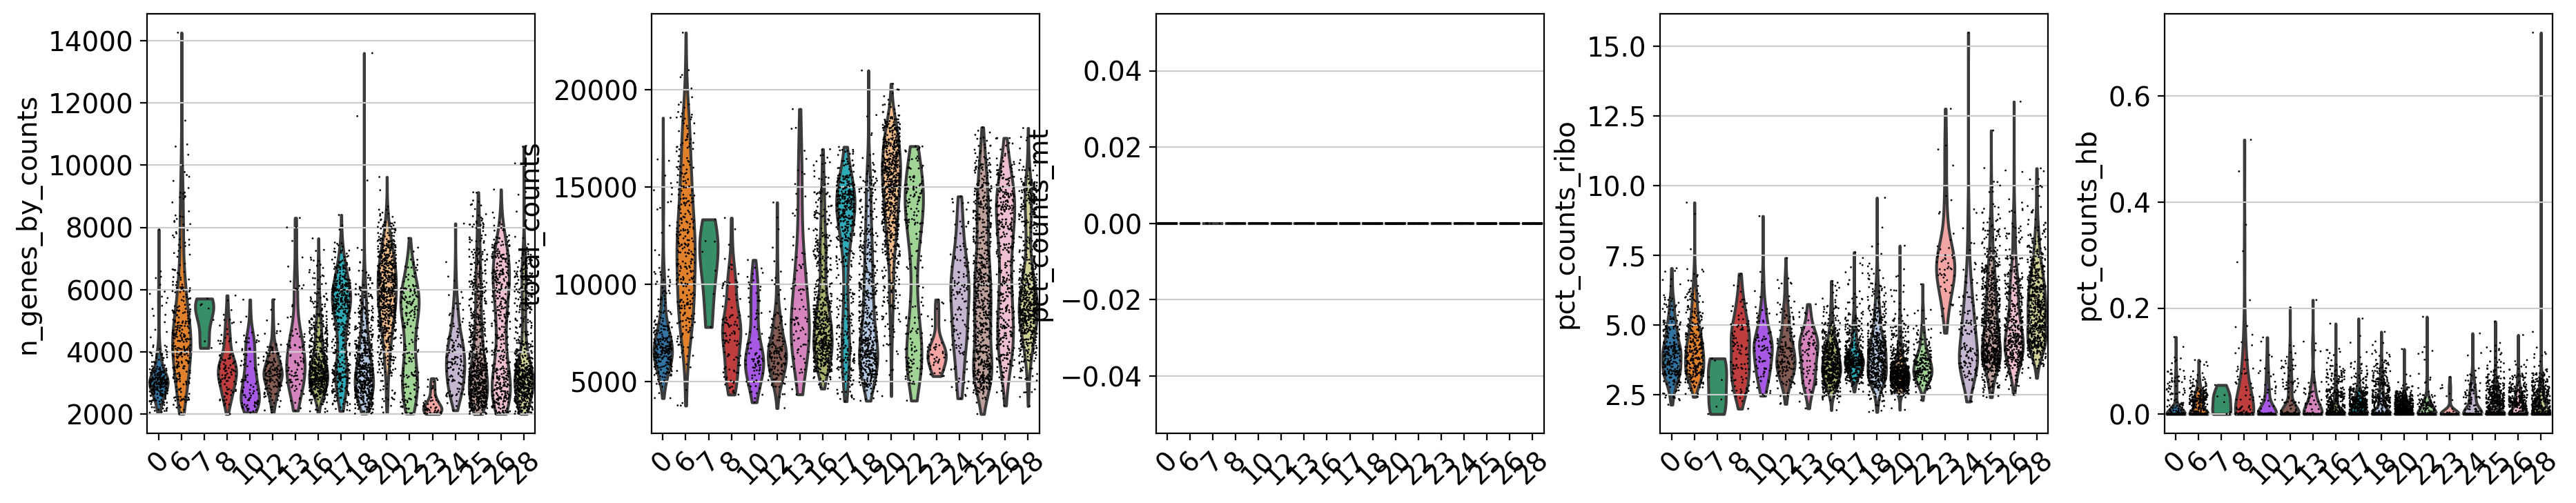

In [76]:
sc.pl.violin(final_adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby='batch', rotation= 45)

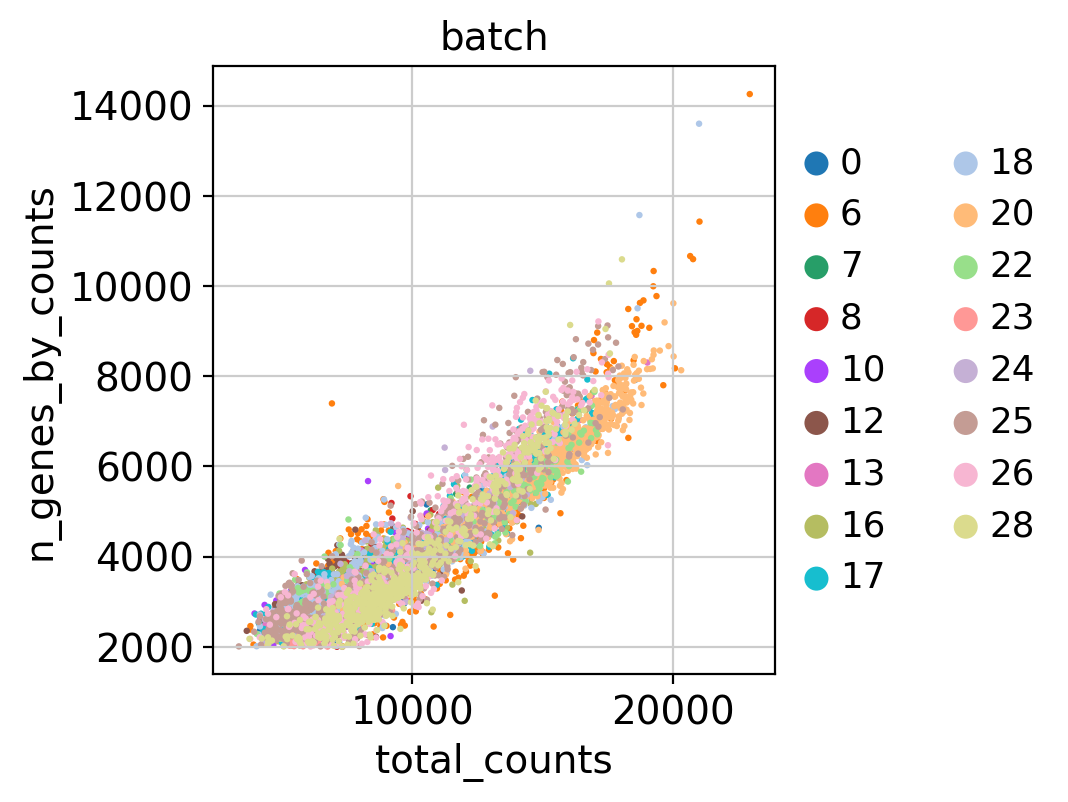

In [77]:
# expect to see an increasing number of detected genes with increasing total count
sc.pl.scatter(final_adata, x='total_counts', y='n_genes_by_counts', color="batch")

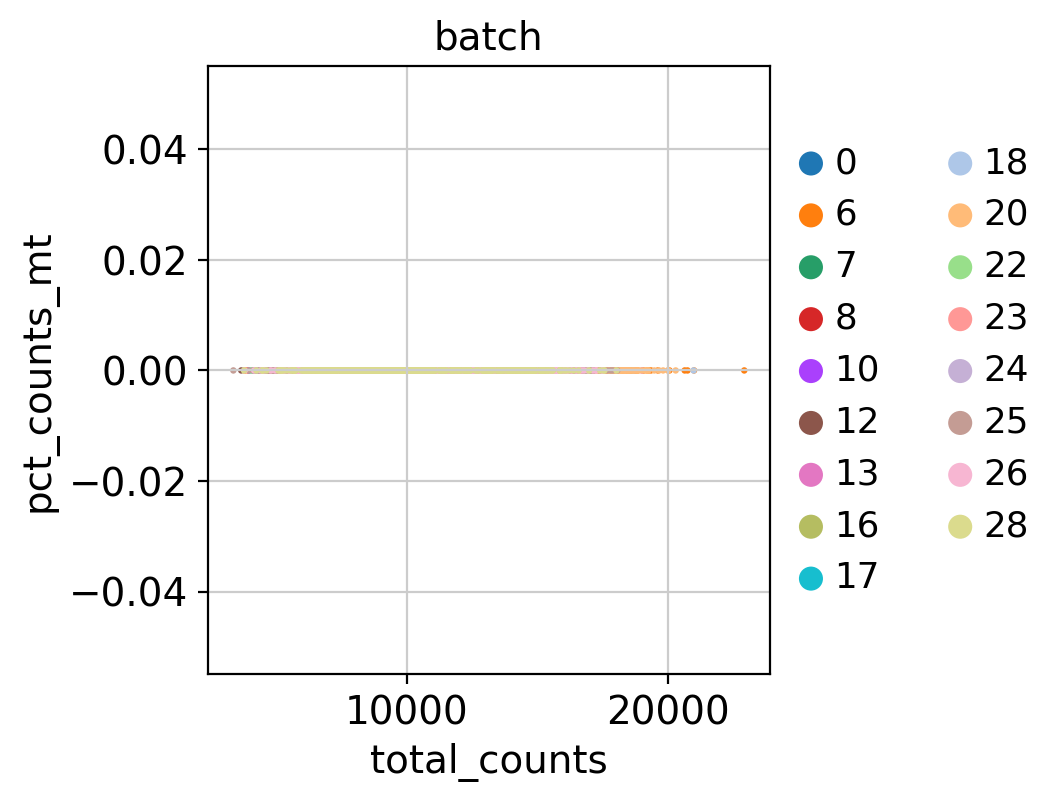

In [78]:
''' 
the total count for each cell against the mitochondrial/ribosomal content. 
Well-behaved cells should have a large number of expressed features and and a low percentage of expression from feature controls. 
High percentage expression from feature controls and few expressed features are indicative of blank and failed cells.
'''
sc.pl.scatter(final_adata, x='total_counts', y='pct_counts_mt', color="batch")

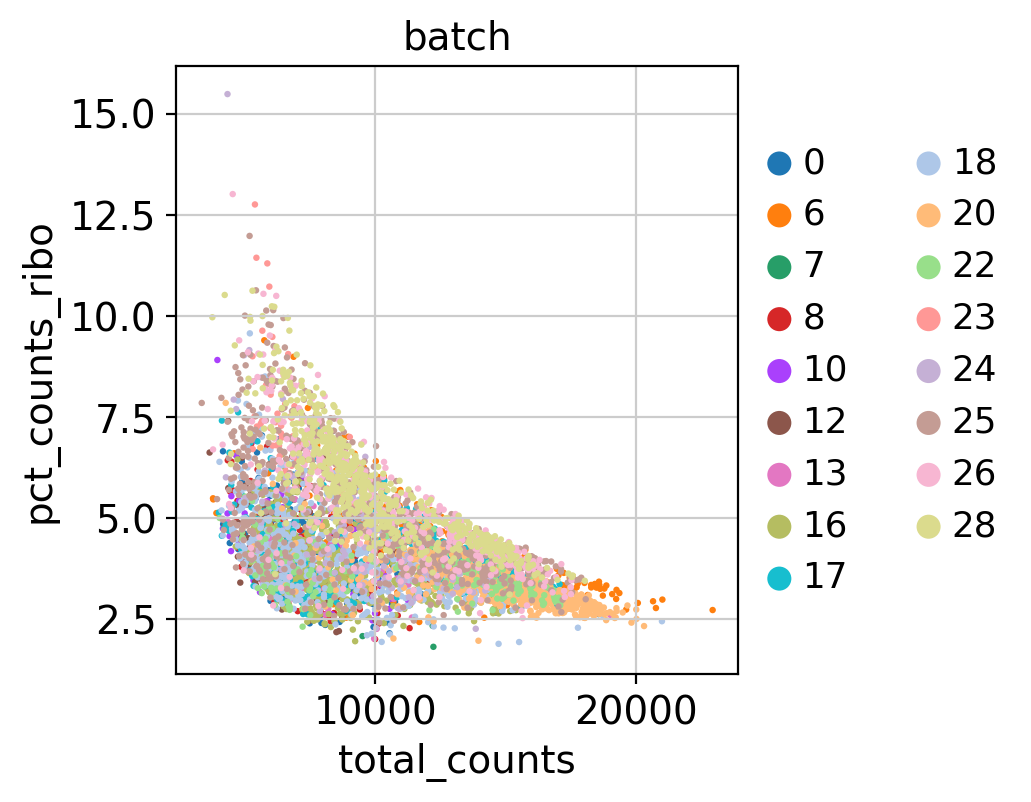

In [79]:
sc.pl.scatter(final_adata, x='total_counts', y='pct_counts_ribo', color="batch")

normalizing counts per cell
    finished (0:00:00)


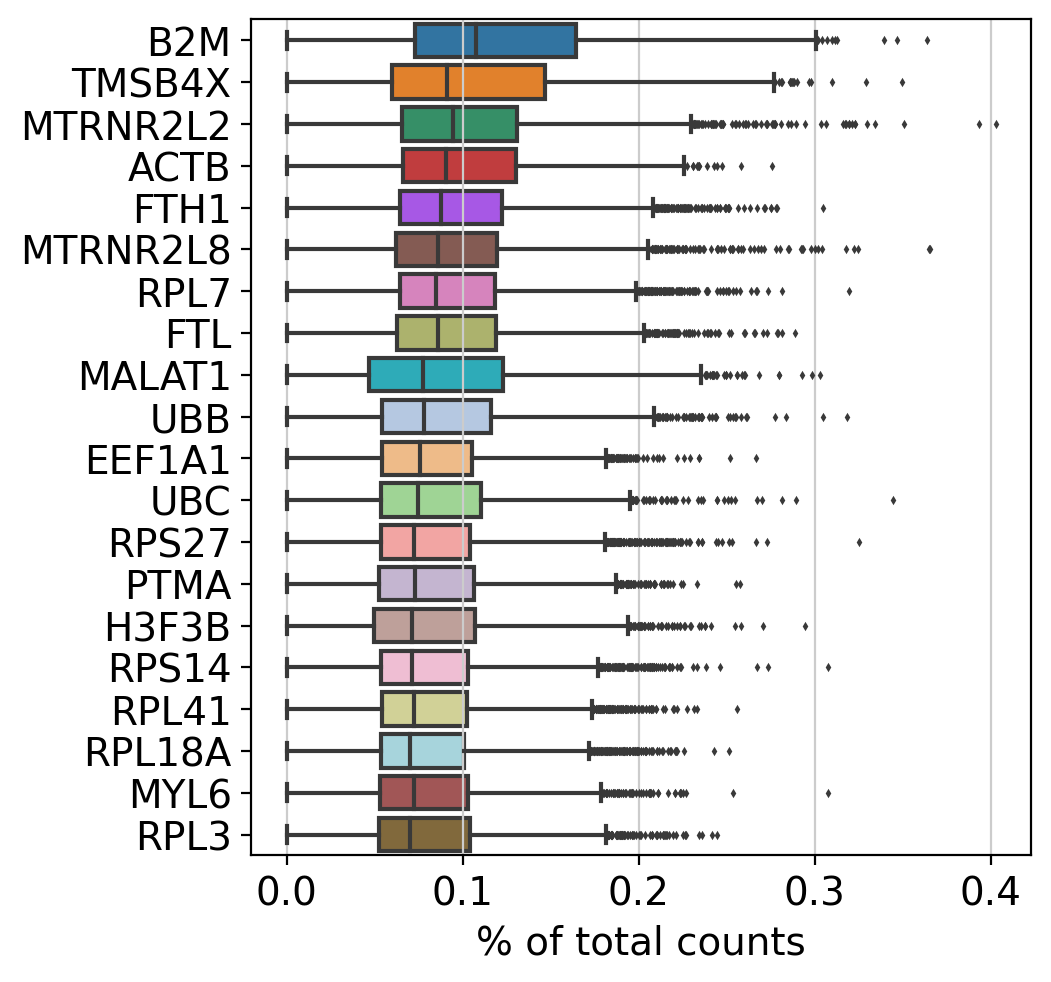

filtered out 2237 genes that are detected in less than 3 cells
cells:  5532 ,genes:  21449


'\nIt is quite common that nuclear lincRNAs have correlation with quality and mitochondrial reads, \nso high detection of MALAT1 may be a technical issue\n'

In [80]:
# Filtering
# begin preprocessing with genes that yield the highest fraction of counts in each single cell, across all cells.
sc.pl.highest_expr_genes(final_adata, n_top=20)
sc.pp.filter_cells(final_adata, min_genes=200)
sc.pp.filter_genes(final_adata, min_cells=3)
print("cells: ",final_adata.n_obs,",genes: ",final_adata.n_vars)

# We expect to see the “usual suspects”, i.e., mitochondrial genes, actin, ribosomal protein, MALAT1. A few spike-in transcripts may also be present here, 
# though if all of the spike-ins are in the top 50, it suggests that too much spike-in RNA was added. A large number of pseudo-genes or predicted genes may indicate problems with alignment. – Davis McCarthy and Aaron Lun
'''
It is quite common that nuclear lincRNAs have correlation with quality and mitochondrial reads, 
so high detection of MALAT1 may be a technical issue
'''

In [85]:
# filter cells for percent mito/ribo
# remove cells with high prop of mito and low prop of ribo reads

final_adata = final_adata[final_adata.obs['pct_counts_mt'] < 20, :]

# filter for percent ribo > 0.05
final_adata = final_adata[final_adata.obs['pct_counts_ribo'] > 3, :]

print("Remaining cells %d"%final_adata.n_obs)

Remaining cells 4965


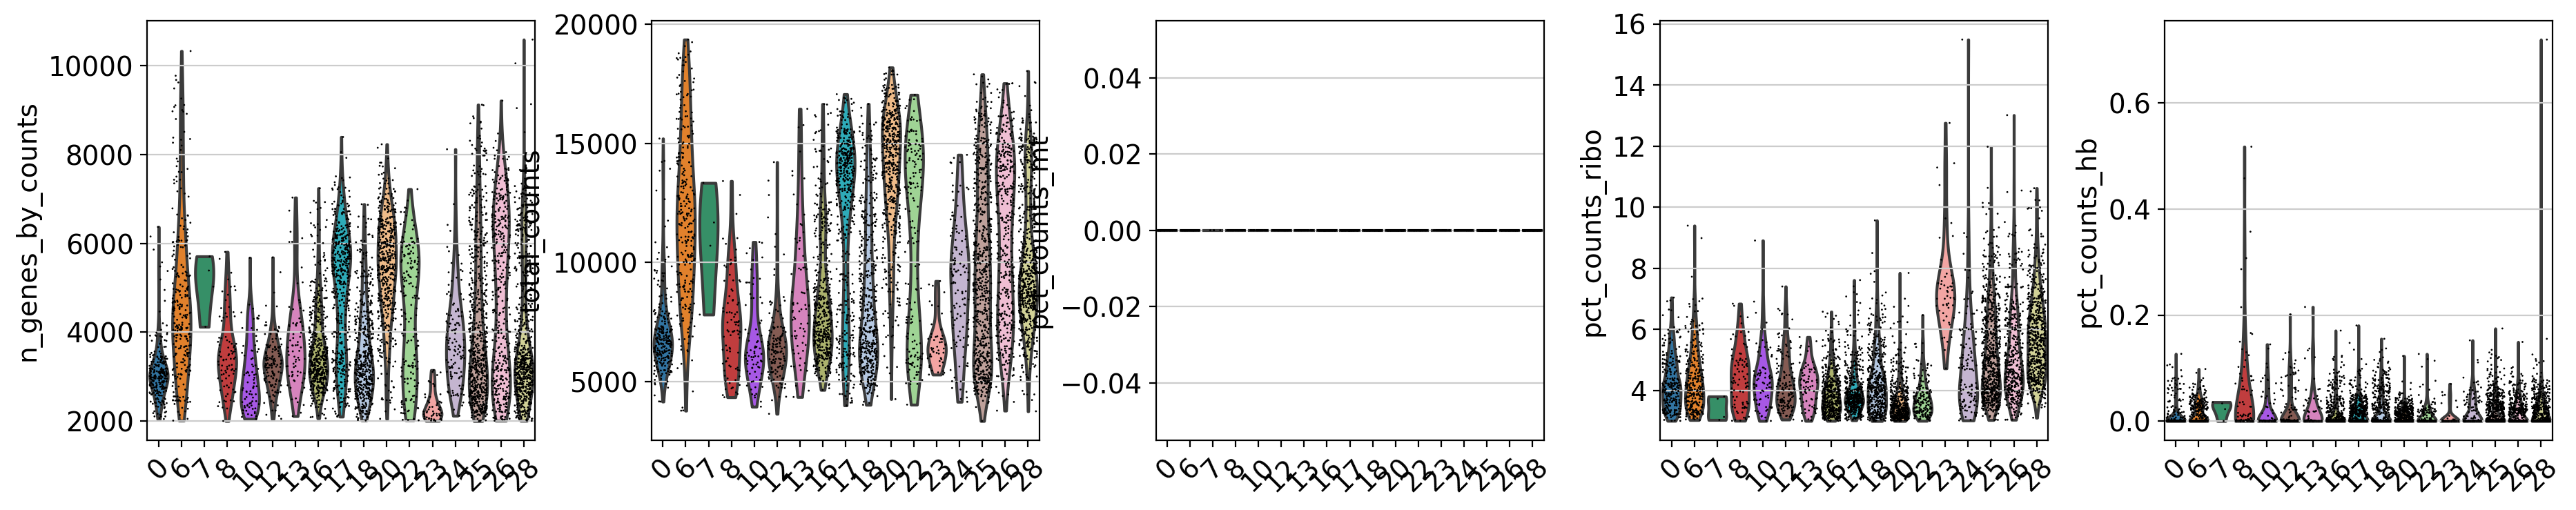

In [86]:
# filtered QC plots
sc.pl.violin(final_adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby='batch', rotation = 45)

In [89]:
# filter genes
# As the level of expression of mitochondrial and MALAT1 genes are judged as mainly technical, 
# it can be wise to remove them from the dataset bofore any further analysis.
malat1 = final_adata.var_names.str.startswith('MALAT1')

# we need to redefine the mito_genes since they were first 
# calculated on the full object before removing low expressed genes.
mito_genes = final_adata.var_names.str.startswith('MT-') 
hb_genes = final_adata.var_names.str.contains('^HB[^(P)]') 
remove = np.add(mito_genes, malat1)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

final_adata = final_adata[:,keep]

print("remain cells x genes:",final_adata.n_obs, final_adata.n_vars)

remain cells x genes: 4965 21437


In [101]:
final_adata

AnnData object with n_obs × n_vars = 4965 × 21437
    obs: 'Cell_type', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'batch_colors', 'doublet_info_colors', 'log1p'

In [109]:
# sex sampling skipped

In [99]:
# save normalized counts in raw slot.
final_adata.raw = final_adata

# normalize to depth 10 000
sc.pp.normalize_per_cell(final_adata, counts_per_cell_after=1e4)

# logaritmize
sc.pp.log1p(final_adata)

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


Preprocessing...


/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.17
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 48.8%
Overall doublet rate:
	Expected   = 1.0%
	Estimated  = 0.4%
Elapsed time: 9.8 seconds


9

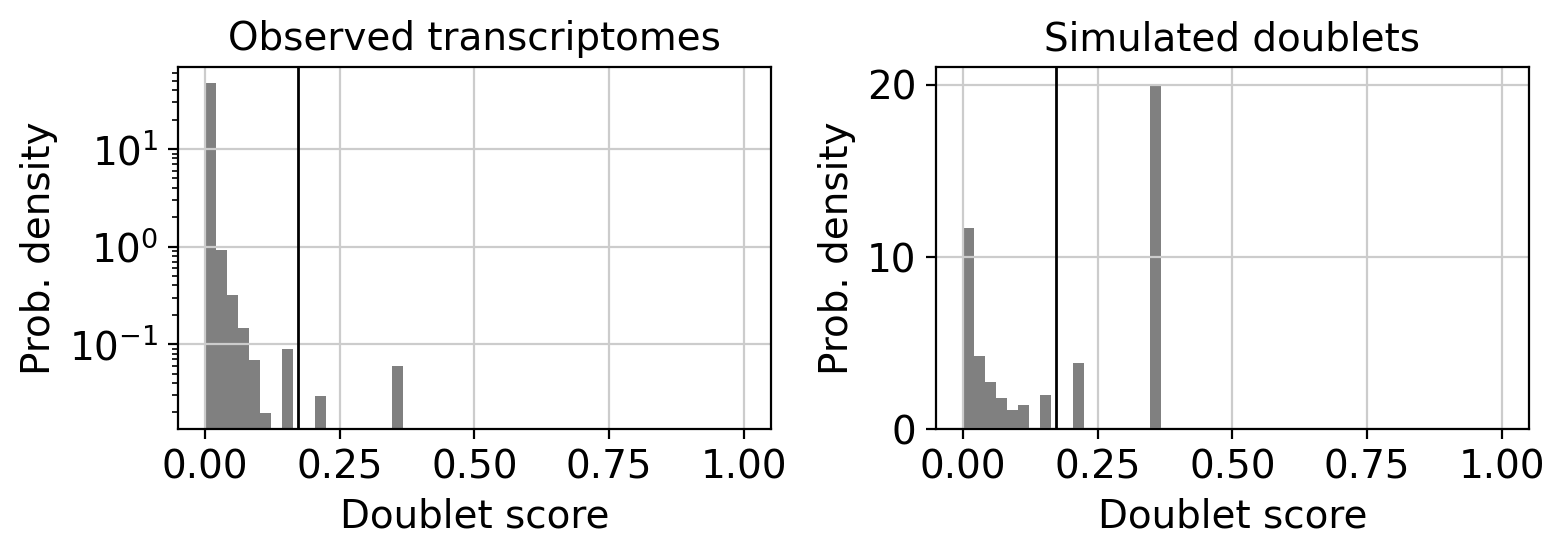

In [105]:
# Predict doublets
'''
Doublets/Mulitples of cells in the same well/droplet is a common issue in scRNAseq protocols. Especially in droplet-based methods whith overloading of cells. 
In a typical 10x experiment the proportion of doublets is linearly dependent on the amount of loaded cells. 
Most doublet detectors simulates doublets by merging cell counts and predicts doublets as cells that have similar embeddings as the simulated doublets.
Most such packages need an assumption about the number/proportion of expected doublets in the dataset.
Data Cillo has an average 2k cells loaded among all samples, so it should have a doublet rate at ~1%
'''
import scrublet as scr
scrub = scr.Scrublet(final_adata.raw.X,expected_doublet_rate=0.01)
final_adata.obs['doublet_scores'], final_adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(final_adata.obs['predicted_doublets'])

In [106]:
'''
The simulated doublet histogram is typically bimodal. 
The left mode corresponds to "embedded" doublets generated by two cells with similar gene expression. 
The right mode corresponds to "neotypic" doublets, which are generated by cells with distinct gene expression (e.g., different cell types) 
and are expected to introduce more artifacts in downstream analyses. Scrublet can only detect neotypic doublets.
'''
# add in column with singlet/doublet instead of True/False
final_adata.obs['doublet_info'] = final_adata.obs["predicted_doublets"].astype(str)

In [107]:
# 9 doublets identified.
final_adata.obs[final_adata.obs['predicted_doublets']==True]

Cell_type batch  n_genes_by_counts  \
HN26_P5_A09_S9_comb               tumor    26               5719   
HN28_P5_G09_S273_comb        Fibroblast    28               3205   
HN28_P14_G01_S169_comb            other    28               9138   
HNSCC25_P31_E07_S247_comb        T cell    25               3788   
HNSCC28_P13_D02_S230_comb        T cell    28               2475   
HNSCC28_P13_E10_S250_comb         other    28               4394   
HNSCC12_p19_HNSCC12_P19_D02       other    12               3022   
HNSCC6_p16_HNSCC6_P16_G11         tumor     6               3135   
HNSCC6_p14_hnscc6_p14_H03         tumor     6               5279   

                             total_counts  total_counts_mt  pct_counts_mt  \
HN26_P5_A09_S9_comb          12984.509766              0.0            0.0   
HN28_P5_G09_S273_comb         9412.142578              0.0            0.0   
HN28_P14_G01_S169_comb       16043.642578              0.0            0.0   
HNSCC25_P31_E07_S247_comb     6520.451172              0.0            0.0   
HNSCC28_P13_D02_S230_comb     7608.447266              0.0            0.0   
HNSCC28_P13_E10_S250_comb     7207.605469              0.0            0.0   
HNSCC12_p19_HNSCC12_P19_D02  10337.996094              0.0            0.0   
HNSCC6_p16_HNSCC6_P16_G11    13157.193359              0.0            0.0   
HNSCC6_p14_hnscc6_p14_H03    12948.337891              0.0            0.0   

                             total_counts_ribo  pct_counts_ribo  \
HN26_P5_A09_S9_comb                 588.433655         4.531813   
HN28_P5_G09_S273_comb               434.693176         4.618429   
HN28_P14_G01_S169_comb              616.558350         3.843007   
HNSCC25_P31_E07_S247_comb           243.481613         3.734122   
HNSCC28_P13_D02_S230_comb           550.685547         7.237818   
HNSCC28_P13_E10_S250_comb           460.408569         6.387815   
HNSCC12_p19_HNSCC12_P19_D02         447.037537         4.324219   
HNSCC6_p16_HNSCC6_P16_G11           461.563507         3.508070   
HNSCC6_p14_hnscc6_p14_H03           519.364563         4.011052   

                             total_counts_hb  pct_counts_hb  percent_mt2  \
HN26_P5_A09_S9_comb                 0.000000       0.000000          0.0   
HN28_P5_G09_S273_comb               0.000000       0.000000          0.0   
HN28_P14_G01_S169_comb              3.906500       0.024349          0.0   
HNSCC25_P31_E07_S247_comb           0.154450       0.002369          0.0   
HNSCC28_P13_D02_S230_comb           0.000000       0.000000          0.0   
HNSCC28_P13_E10_S250_comb           0.000000       0.000000          0.0   
HNSCC12_p19_HNSCC12_P19_D02         0.000000       0.000000          0.0   
HNSCC6_p16_HNSCC6_P16_G11           6.096000       0.046332          0.0   
HNSCC6_p14_hnscc6_p14_H03           0.032806       0.000253          0.0   

                                 n_counts  n_genes  doublet_scores  \
HN26_P5_A09_S9_comb          12976.779297     5719        0.209581   
HN28_P5_G09_S273_comb         9404.444336     3205        0.209581   
HN28_P14_G01_S169_comb       16032.975586     9138        0.348684   
HNSCC25_P31_E07_S247_comb     6500.399414     3788        0.348684   
HNSCC28_P13_D02_S230_comb     7584.469727     2475        0.209581   
HNSCC28_P13_E10_S250_comb     7198.616211     4394        0.348684   
HNSCC12_p19_HNSCC12_P19_D02  10331.045898     3022        0.348684   
HNSCC6_p16_HNSCC6_P16_G11    13143.595703     3135        0.348684   
HNSCC6_p14_hnscc6_p14_H03    12941.149414     5279        0.348684   

                             predicted_doublets doublet_info  
HN26_P5_A09_S9_comb                        True         True  
HN28_P5_G09_S273_comb                      True         True  
HN28_P14_G01_S169_comb                     True         True  
HNSCC25_P31_E07_S247_comb                  True         True  
HNSCC28_P13_D02_S230_comb                  True         True  
HNSCC28_P13_E10_S250_comb                  True         True  
HNSC

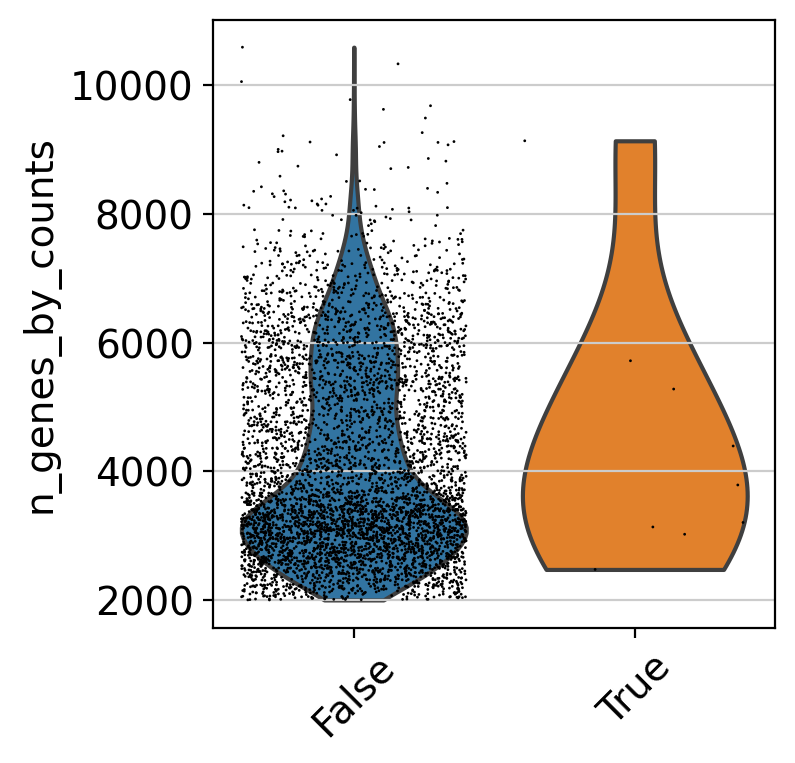

In [108]:
# We should expect that two cells have more detected genes than a single cell, 
# lets check if our predicted doublets also have more detected genes in general.
sc.pl.violin(final_adata, 'n_genes_by_counts', 
             # equivalent metric in seurat is 'nFeature_RNA'
             jitter=0.4, groupby = 'doublet_info', rotation=45)

In [109]:
# Now, lets run PCA and UMAP and plot doublet scores onto umap to check the doublet predictions.
sc.pp.highly_variable_genes(final_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
final_adata = final_adata[:, final_adata.var.highly_variable]

sc.pp.regress_out(final_adata, ['total_counts', 'pct_counts_mt'])

sc.pp.scale(final_adata, max_value=10)
sc.tl.pca(final_adata, svd_solver='arpack')
sc.pp.neighbors(final_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(final_adata)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:46)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


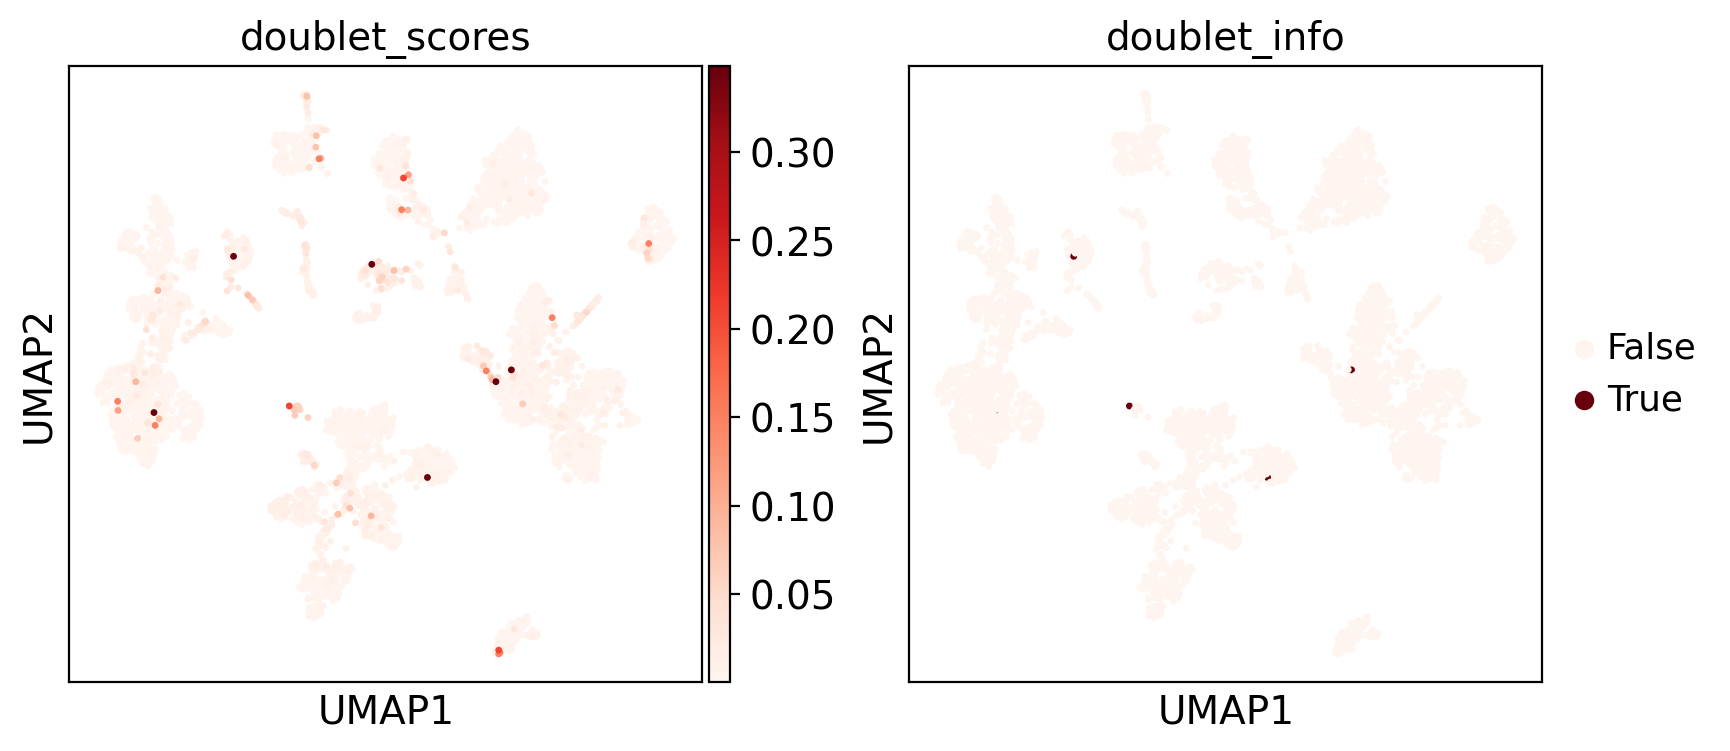

In [110]:
# very little amount of doublets are found, hardly recognizable from plots
sc.pl.umap(final_adata, color=['doublet_scores','doublet_info'],color_map='Reds',palette='Reds')

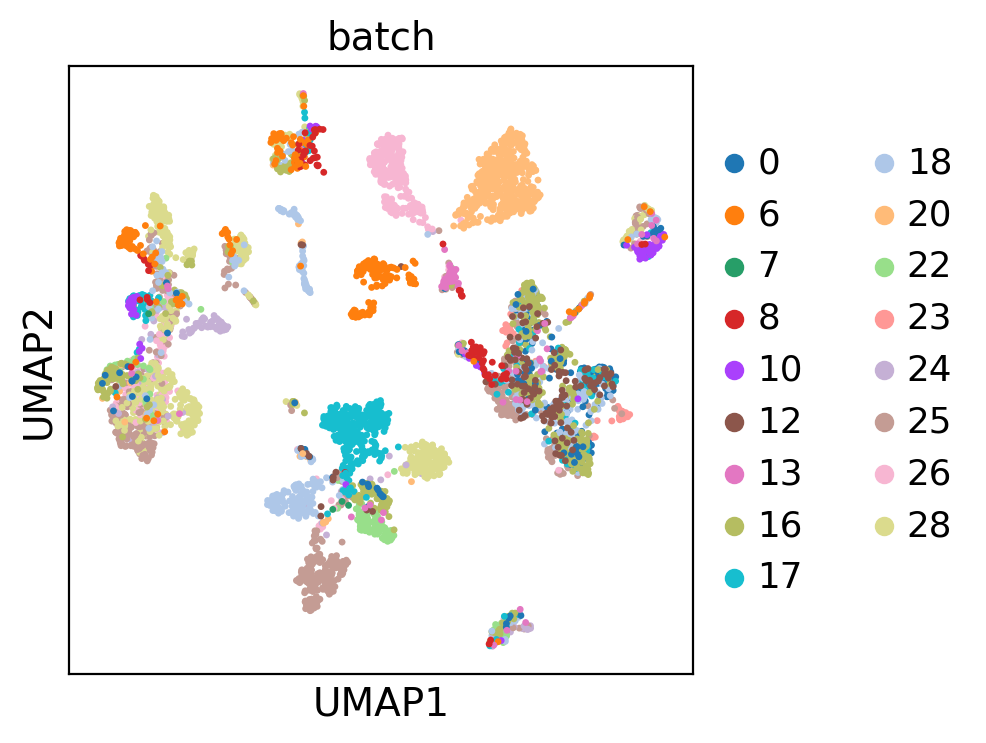

In [111]:
sc.pl.umap(final_adata, color=['batch'])

In [112]:
# remove all doublets predicted from data
# also revert back to the raw counts as the main matrix in adata
final_adata = final_adata.raw.to_adata() 

final_adata = final_adata[final_adata.obs['doublet_info'] == 'False',:]
print(final_adata.shape)

(4956, 21437)


In [235]:
final_adata.X

array([[0.      , 6.0037  , 0.      , ..., 0.      , 0.062122, 0.      ],
       [0.      , 7.3006  , 0.      , ..., 0.      , 0.28214 , 0.      ],
       [0.42761 , 7.2885  , 0.      , ..., 0.      , 3.7196  , 0.      ],
       ...,
       [0.      , 6.8439  , 3.2863  , ..., 4.4841  , 4.8044  , 0.      ],
       [0.      , 6.8676  , 0.      , ..., 0.      , 0.11636 , 0.      ],
       [0.      , 6.3146  , 3.5905  , ..., 3.3105  , 5.3147  , 0.      ]],
      dtype=float32)

In [195]:
# just in case use wrong column in metadata as batch info
def fix_batch(final_adata,df_tmp_Puram = df_tmp_Puram):
    final_adata.obs['batch'] = df_tmp_Puram[df_tmp_Puram['cell'].isin(final_adata.obs.index)]['patient'].apply(str).tolist()
    return final_adata

In [197]:
# final_adata = fix_batch(final_adata)

In [116]:
results_file = './Puram/Puram_scanpy.h5ad'  # the file that will store the analysis results
final_adata.write(results_file)

In [173]:
final_adata = sc.read_h5ad(results_file)
final_adata.uns['log1p']["base"] = None
final_adata

AnnData object with n_obs × n_vars = 4956 × 21437
    obs: 'Cell_type', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'batch_colors', 'doublet_info_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

### 2.Dim Reduction

In [176]:
final_adata.X

array([[0.      , 6.0037  , 0.      , ..., 0.      , 0.062122, 0.      ],
       [0.      , 7.3006  , 0.      , ..., 0.      , 0.28214 , 0.      ],
       [0.42761 , 7.2885  , 0.      , ..., 0.      , 3.7196  , 0.      ],
       ...,
       [0.      , 6.8439  , 3.2863  , ..., 4.4841  , 4.8044  , 0.      ],
       [0.      , 6.8676  , 0.      , ..., 0.      , 0.11636 , 0.      ],
       [0.      , 6.3146  , 3.5905  , ..., 3.3105  , 5.3147  , 0.      ]],
      dtype=float32)

In [175]:
# Before variable gene selection we need to normalize and logaritmize the data. 
# Then store the full matrix in the raw slot before doing variable gene selection.
# normalize to depth 10 000
Puram_adata = final_adata.copy()
# To make sure result retractable, cillo_adata will be our subject from here on
sc.pp.normalize_per_cell(Puram_adata, counts_per_cell_after=1e4)

# logaritmize
sc.pp.log1p(Puram_adata)

# store normalized counts in the raw slot, 
# we will subset final_adata.X for variable genes, but want to keep all genes matrix as well.
Puram_adata.raw = Puram_adata

Puram_adata

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


AnnData object with n_obs × n_vars = 4956 × 21437
    obs: 'Cell_type', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'batch_colors', 'doublet_info_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Highly variable genes: 5236


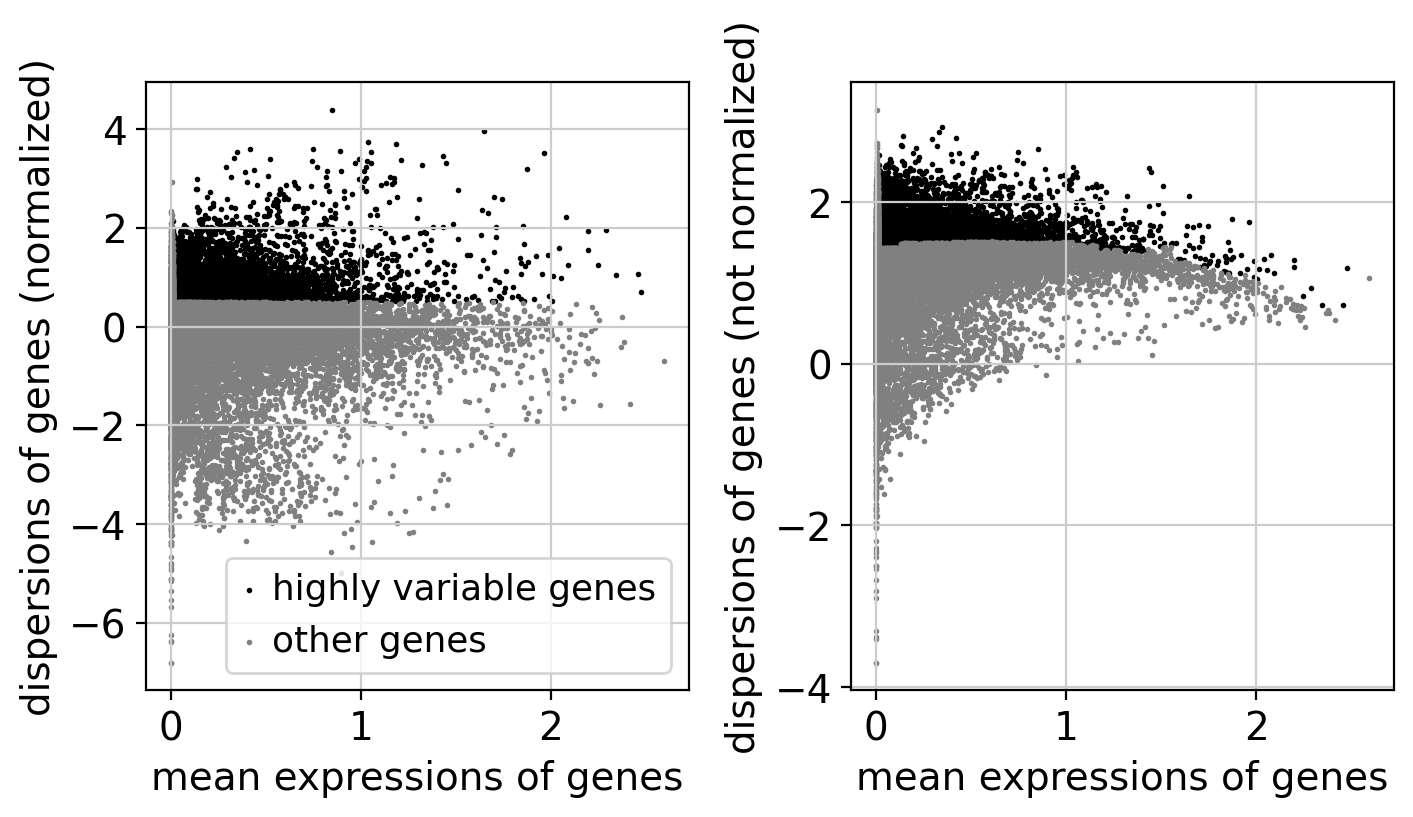

In [118]:
# Next, we first need to define which features/genes are important in our dataset to distinguish cell types. 
# For this purpose, we need to find genes that are highly variable across cells, which in turn will also provide a good separation of the cell clusters.
# compute variable genes
sc.pp.highly_variable_genes(Puram_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(Puram_adata.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(Puram_adata)

# subset for variable genes in the dataset
Puram_adata = Puram_adata[:, Puram_adata.var['highly_variable']]

Now that the data is prepared, we now proceed with PCA. Since each gene has a different expression level, it means that genes with higher expression values will naturally have higher variation that will be captured by PCA. This means that we need to somehow give each gene a similar weight when performing PCA (see below). The common practice is to center and scale each gene before performing PCA. This exact scaling is called Z-score normalization it is very useful for PCA, clustering and plotting heatmaps.

Additionally, we can use regression to remove any unwanted sources of variation from the dataset, such as cell cycle, sequencing depth, percent mitocondria. This is achieved by doing a generalized linear regression using these parameters as covariates in the model. Then the residuals of the model are taken as the "regressed data". Although perhaps not in the best way, batch effect regression can also be done here.

In [119]:
# cillo_adata = cillo_adata.copy()     #run this line if you get the "AttributeError: swapaxes not found" 

# regress out unwanted variables
sc.pp.regress_out(Puram_adata, ['total_counts', 'pct_counts_mt'])

# scale data, clip values exceeding standard deviation 10.
sc.pp.scale(Puram_adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:45)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


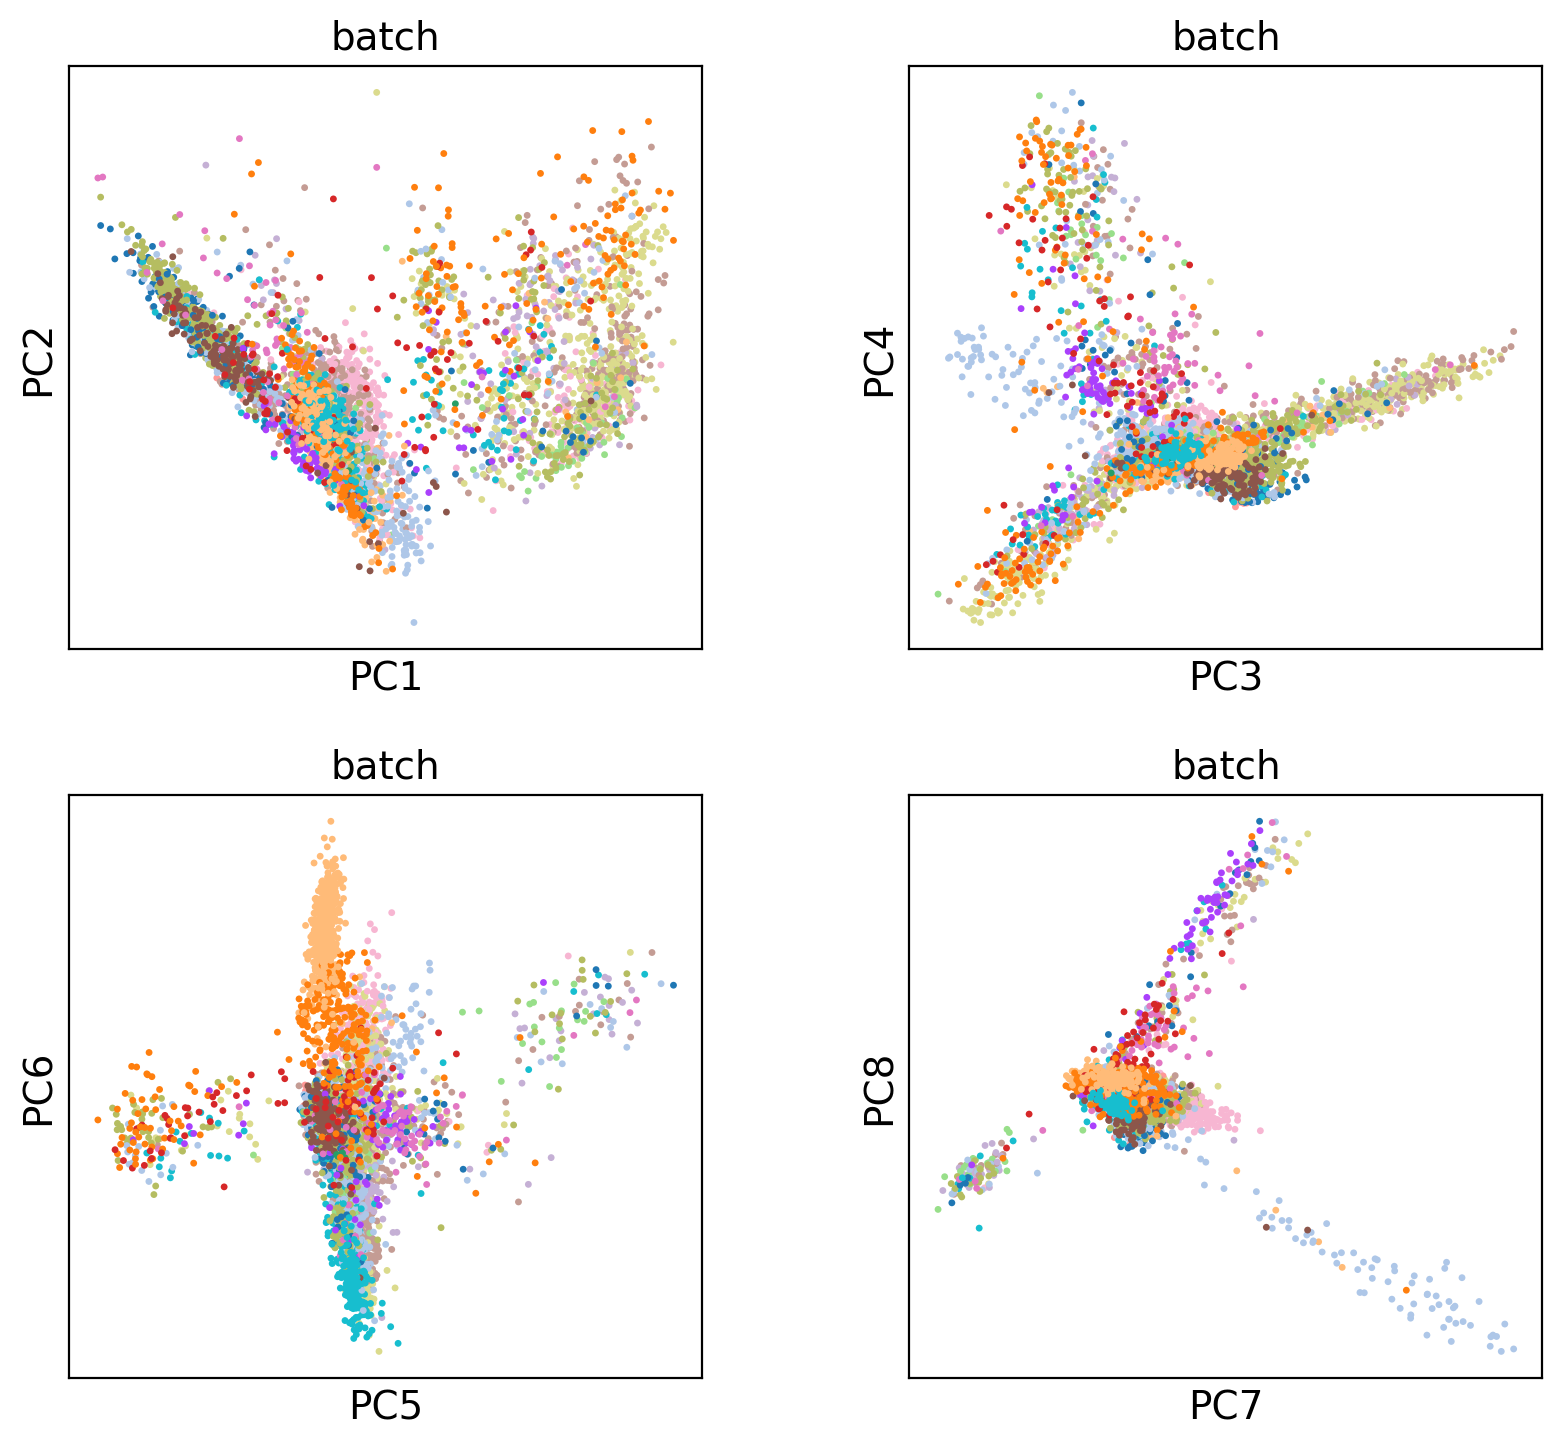

In [120]:
# PCA
# Performing PCA has many useful applications and interpretations, 
# which much depends on the data used. In the case of life sciences, 
# we want to segregate samples based on gene expression patterns in the data.
sc.tl.pca(Puram_adata, svd_solver='arpack')

# plot more PCS
sc.pl.pca(Puram_adata, color='batch', components = ['1,2','3,4','5,6','7,8'], ncols=2, legend_loc = None)

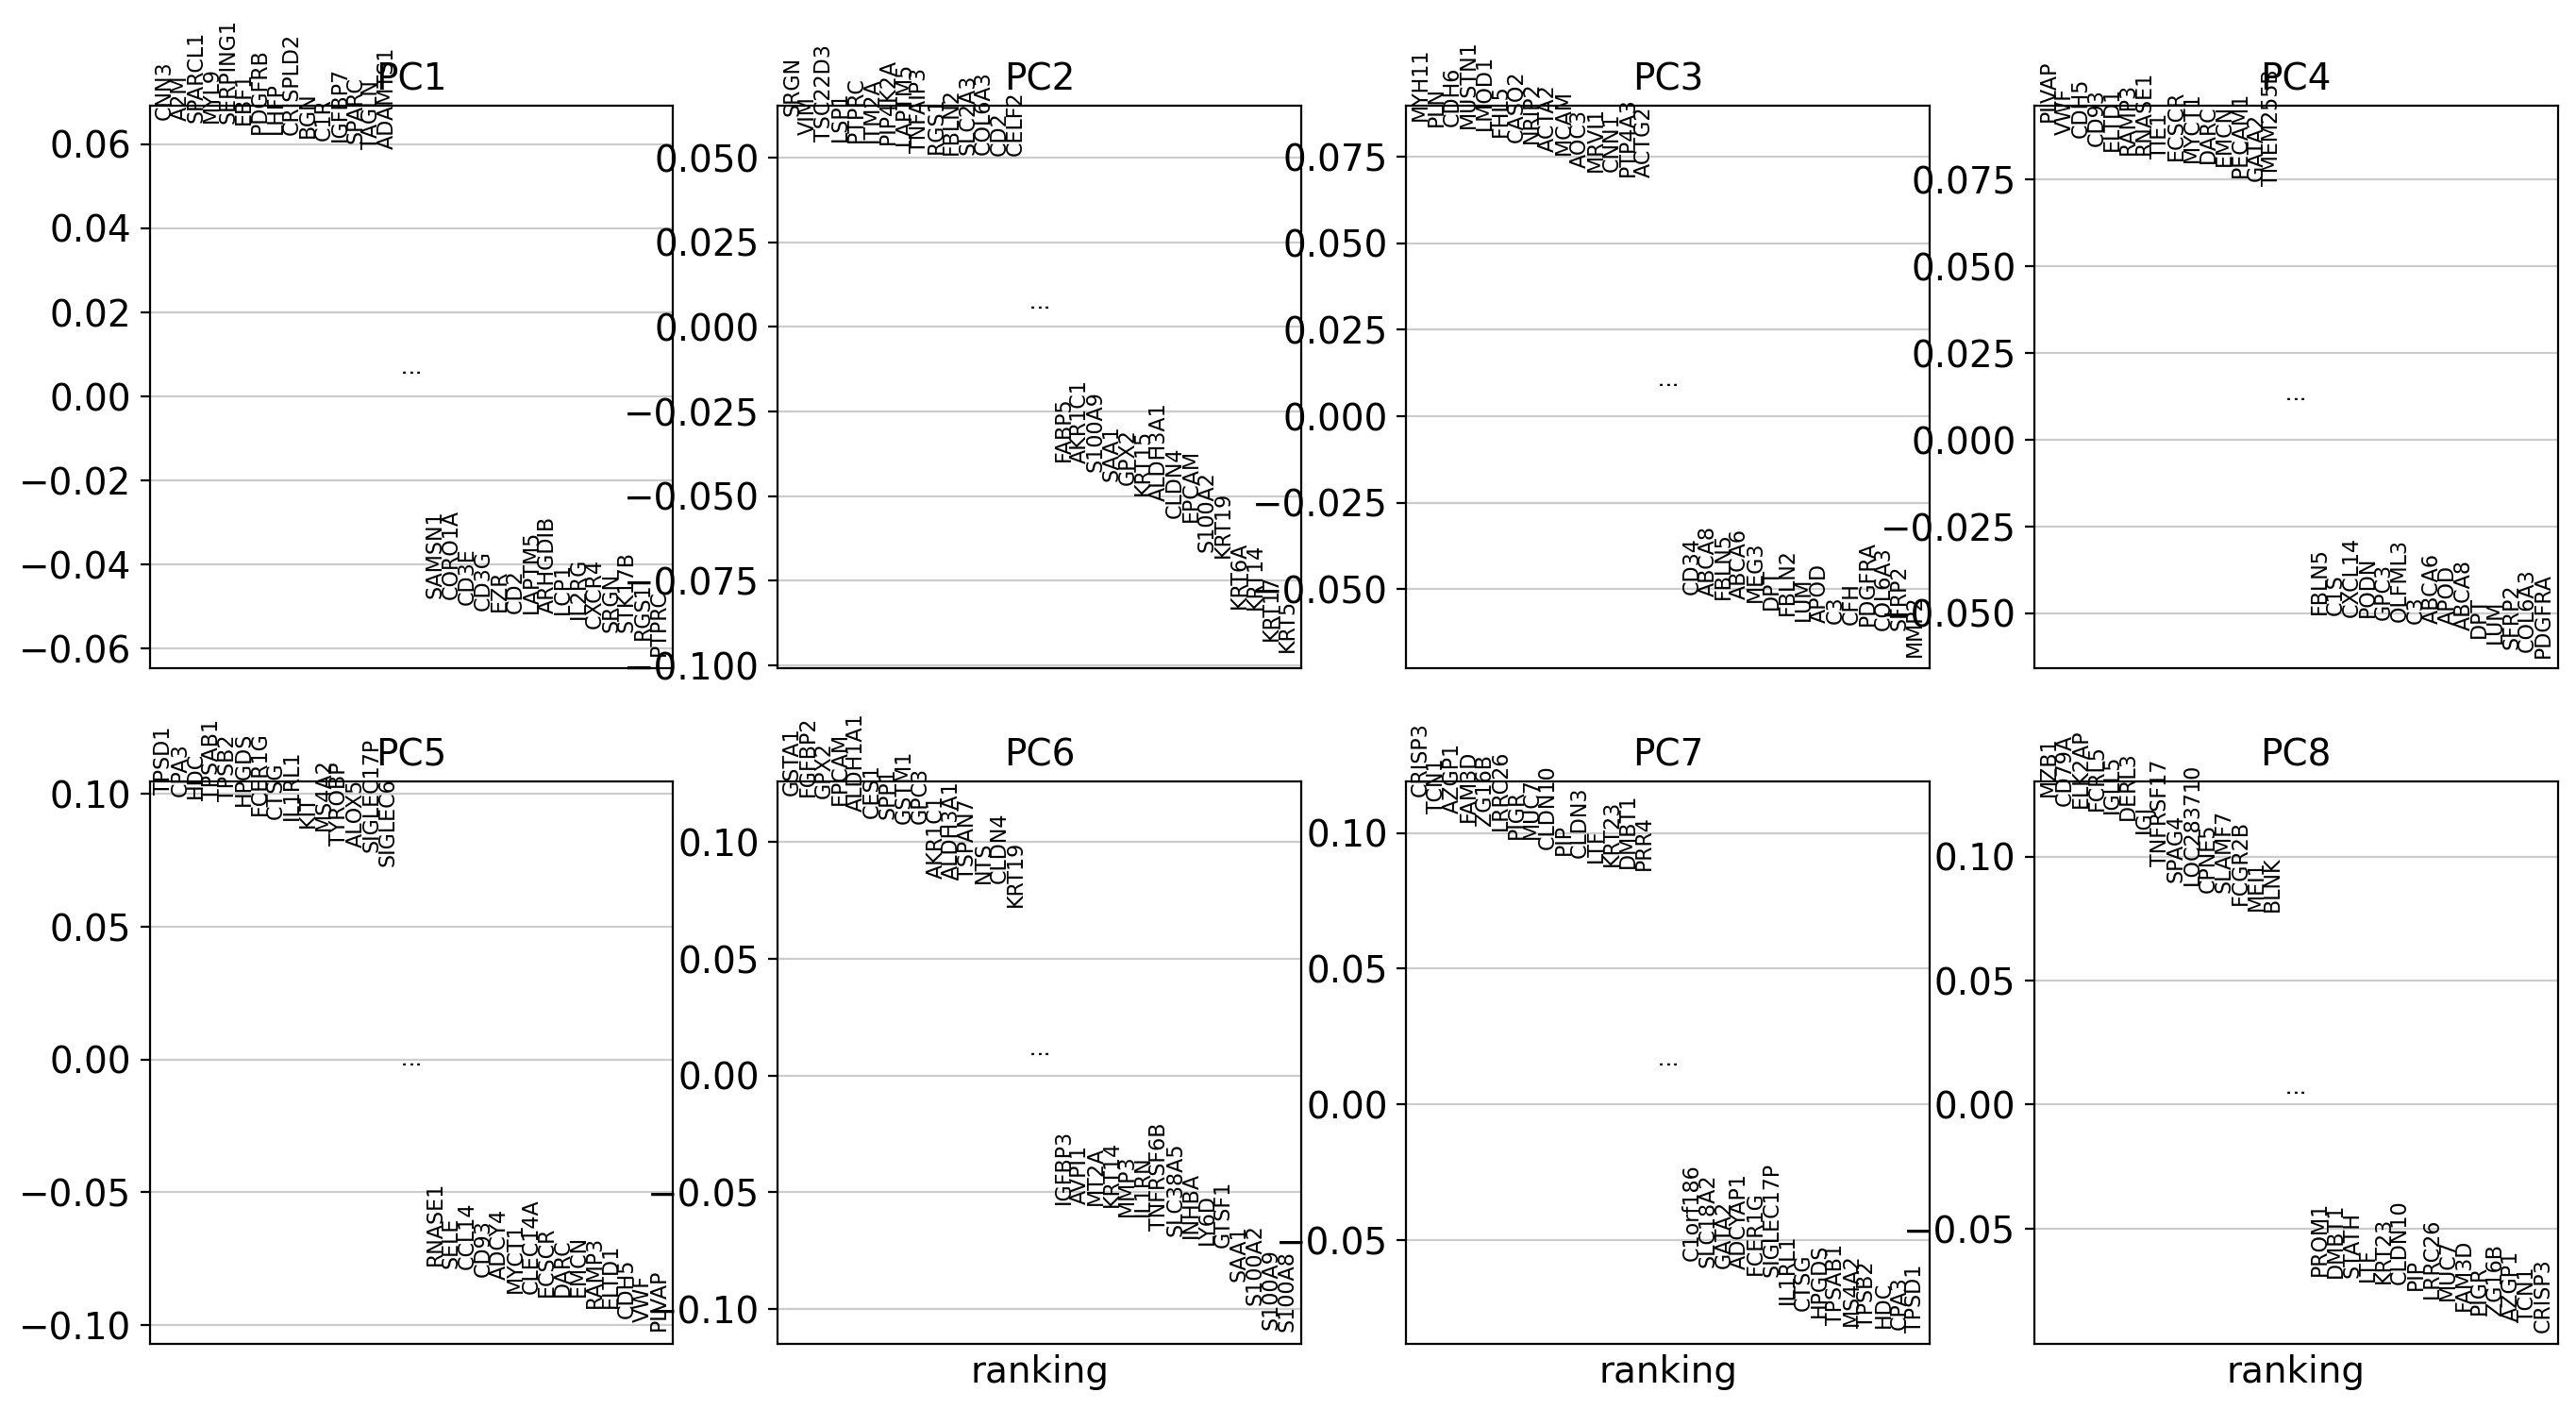

In [121]:
#Plot loadings
sc.pl.pca_loadings(Puram_adata, components=[1,2,3,4,5,6,7,8])

# OBS! only plots the positive axes genes from each PC!!

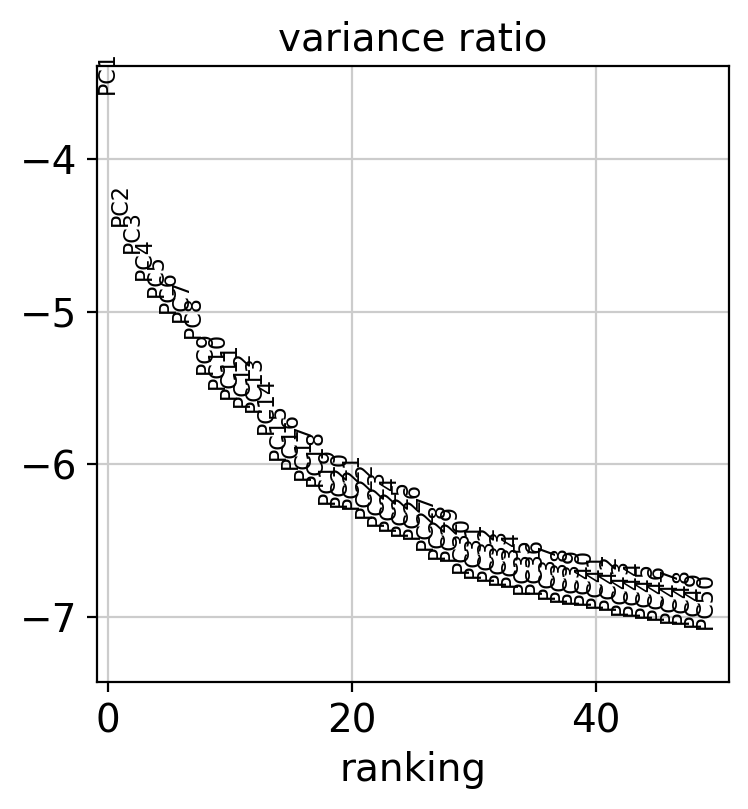

In [122]:
sc.pl.pca_variance_ratio(Puram_adata, log=True, n_pcs = 50)

In [123]:
# regular BH T-SNE plot
sc.tl.tsne(Puram_adata, n_pcs = 30)

computing tSNE
    using 'X_pca' with n_pcs = 30
    using sklearn.manifold.TSNE


/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:09)


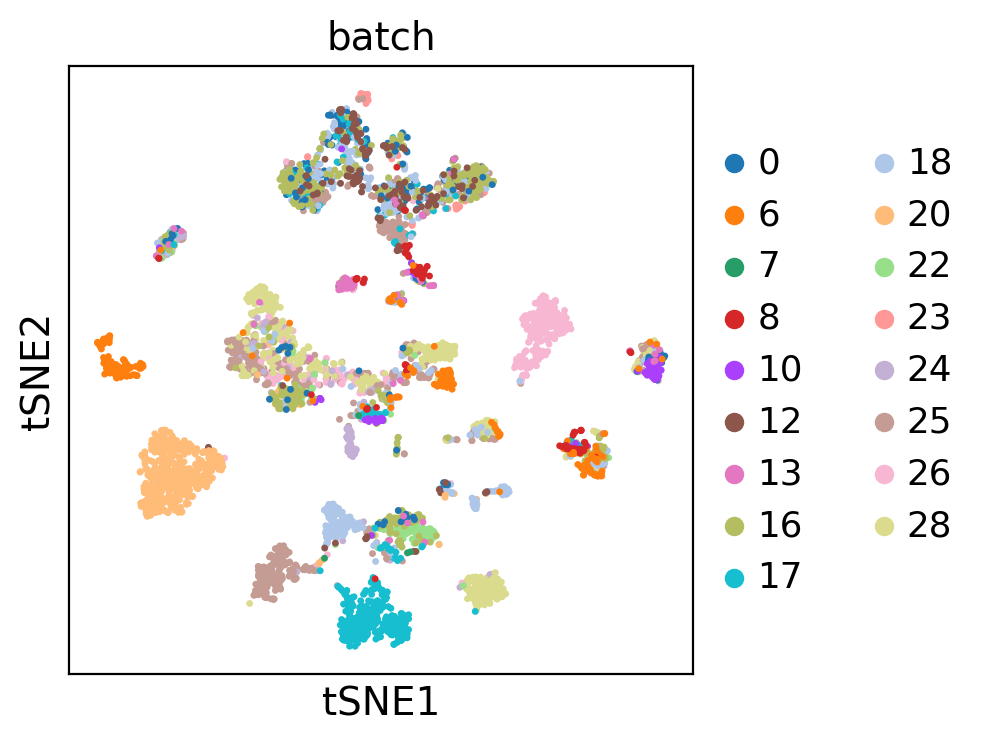

In [124]:
sc.pl.tsne(Puram_adata, color='batch')
# We can clearly see the effect of batches present in the dataset.

In [125]:
sc.pp.neighbors(Puram_adata, n_pcs = 30, n_neighbors = 20)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [126]:
sc.tl.umap(Puram_adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


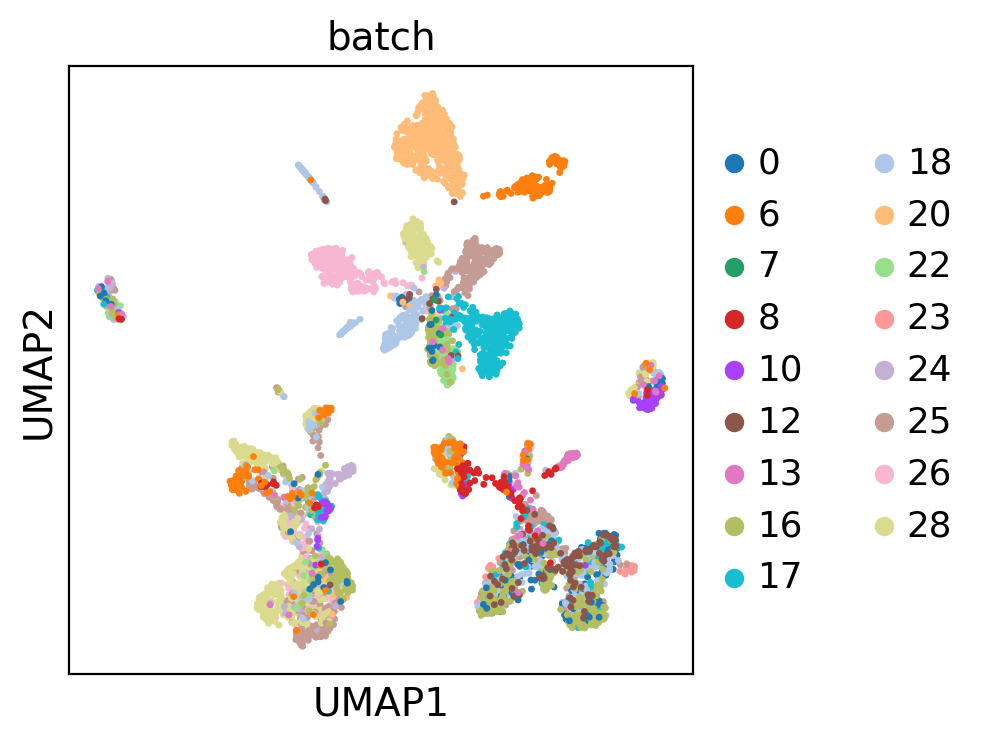

In [127]:
sc.pl.umap(Puram_adata, color='batch')

In [128]:
print(Puram_adata.X.shape)
print(Puram_adata.raw.X.shape) # counts are after dr not raw!

(4956, 5236)
(4956, 21437)


In [129]:
Puram_adata

AnnData object with n_obs × n_vars = 4956 × 5236
    obs: 'Cell_type', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'doublet_info_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [199]:
# Puram_adata = fix_batch(Puram_adata)

In [130]:
save_file = './Puram/scanpy_qc_dr_Puram.h5ad'
Puram_adata.write_h5ad(save_file)

In [1]:
Puram_adata = sc.read_h5ad('./Puram/scanpy_qc_dr_Puram.h5ad')
Puram_adata.uns['log1p']["base"] = None
Puram_adata

NameError: name 'sc' is not defined

### Data integration
As the stored AnnData object contains scaled data based on variable genes, we need to make a new object with the logtransformed normalized counts. The new variable gene selection should not be performed on the scaled data matrix.

In [138]:
adata2 = Puram_adata.raw.to_adata() 

# check that the matrix looks like noramlized counts
print(adata2.X[1:10,1:10])

[[2.8148472  0.         0.         1.5967407  0.         0.
  0.04943941 0.         0.        ]
 [2.8056648  0.         0.         0.47814476 0.         0.749653
  0.00945784 0.         0.        ]
 [0.         1.54761    0.         1.8389676  0.         1.4106108
  0.6286777  0.         0.        ]
 [2.9280047  0.04106649 0.         0.01450218 0.028019   0.
  0.01173698 0.         0.        ]
 [2.588272   0.         0.         0.2613072  0.         0.
  0.0073734  0.         0.        ]
 [1.9819853  0.         0.         0.         0.         0.
  0.09569686 0.         0.        ]
 [2.2766688  0.6770467  0.         0.2967593  0.         0.07945448
  0.6435254  0.         0.        ]
 [2.337699   0.         0.         0.74077487 0.         0.
  0.00608391 0.         0.        ]
 [3.243371   0.2543324  0.         0.         0.         1.0592488
  0.05613184 0.         0.        ]]


In [139]:
var_genes_all = Puram_adata.var.highly_variable

print("Highly variable genes: %d"%sum(var_genes_all))

Highly variable genes: 5166


In [140]:
# Detect variable genes in each dataset separately using the batch_key parameter.

sc.pp.highly_variable_genes(adata2, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key = 'batch')

print("Highly variable genes intersection: %d"%sum(adata2.var.highly_variable_intersection))

print("Number of batches where gene is variable:")
print(adata2.var.highly_variable_nbatches.value_counts())

var_genes_batch = adata2.var.highly_variable_nbatches > 0

extracting highly variable genes


/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:4

    finished (0:00:07)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Highly variable genes intersection: 2
Number of batches where gene is variable:
0     4399
1     2551
2     1760
3     1437
4     1245
5     1219
6     1073
7     1038
8     1013
9      931
10     882
11     842
12     754
13     699
14     573
15     417
16     305
17     180
18      98
19      19
20       2
Name: highly_variable_nbatches, dtype: int64


/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)


In [141]:
print("Any batch var genes: %d"%sum(var_genes_batch))
print("All data var genes: %d"%sum(var_genes_all))
print("Overlap: %d"%sum(var_genes_batch & var_genes_all))
print("Variable genes in all batches: %d"%sum(adata2.var.highly_variable_nbatches == 6))
print("Overlap batch instersection and all: %d"%sum(var_genes_all & adata2.var.highly_variable_intersection))

Any batch var genes: 17038
All data var genes: 5166
Overlap: 5164
Variable genes in all batches: 1073
Overlap batch instersection and all: 2


In [142]:
# Select all genes that are variable in at least 2 datasets and use for remaining analysis.
var_select = adata2.var.highly_variable_nbatches > 2
var_genes = var_select.index[var_select]
len(var_genes)

12727

In [143]:
# Data integration
# split per batch into new objects.
batches = Puram_adata.obs['batch'].cat.categories.tolist()
alldata = {}
for batch in batches:
    alldata[batch] = adata2[adata2.obs['batch'] == batch,]
alldata   

{'HN23': View of AnnData object with n_obs × n_vars = 51 × 21437
     obs: 'Cell_type', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info'
     var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
     uns: 'batch_colors', 'log1p', 'doublet_info_colors', 'hvg', 'pca', 'neighbors', 'umap', 'tsne'
     obsm: 'X_pca', 'X_umap', 'X_tsne'
     obsp: 'distances', 'connectivities',
 'HN25': View of AnnData object with n_obs × n_vars = 223 × 21437
     obs: 'Cell_type', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb'

### Harmony

In [146]:
# for harmony, we don't actually need alldata and adata2 we just created, that was for other potential methods
# create a new object with lognormalized counts
adata_harmony = Puram_adata.copy()

# first store the raw data 
adata_harmony.raw = adata_harmony

# run harmony
sc.external.pp.harmony_integrate(adata_harmony, key='batch')

2022-06-24 13:15:52,813 - harmonypy - INFO - Iteration 1 of 10
2022-06-24 13:15:55,686 - harmonypy - INFO - Iteration 2 of 10
2022-06-24 13:15:58,545 - harmonypy - INFO - Iteration 3 of 10
2022-06-24 13:16:01,444 - harmonypy - INFO - Iteration 4 of 10
2022-06-24 13:16:03,881 - harmonypy - INFO - Iteration 5 of 10
2022-06-24 13:16:06,441 - harmonypy - INFO - Converged after 5 iterations


In [147]:
# tsne and umap
sc.pp.neighbors(adata_harmony, n_pcs =50, use_rep = "X_pca_harmony")
sc.tl.umap(adata_harmony)
sc.tl.tsne(adata_harmony, n_pcs = 50, use_rep = "X_pca_harmony")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)
computing tSNE
    using sklearn.manifold.TSNE


/home/cke/miniconda3/envs/BLADE/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:08)


<AxesSubplot:title={'center':'Uncorrected umap'}, xlabel='UMAP1', ylabel='UMAP2'>

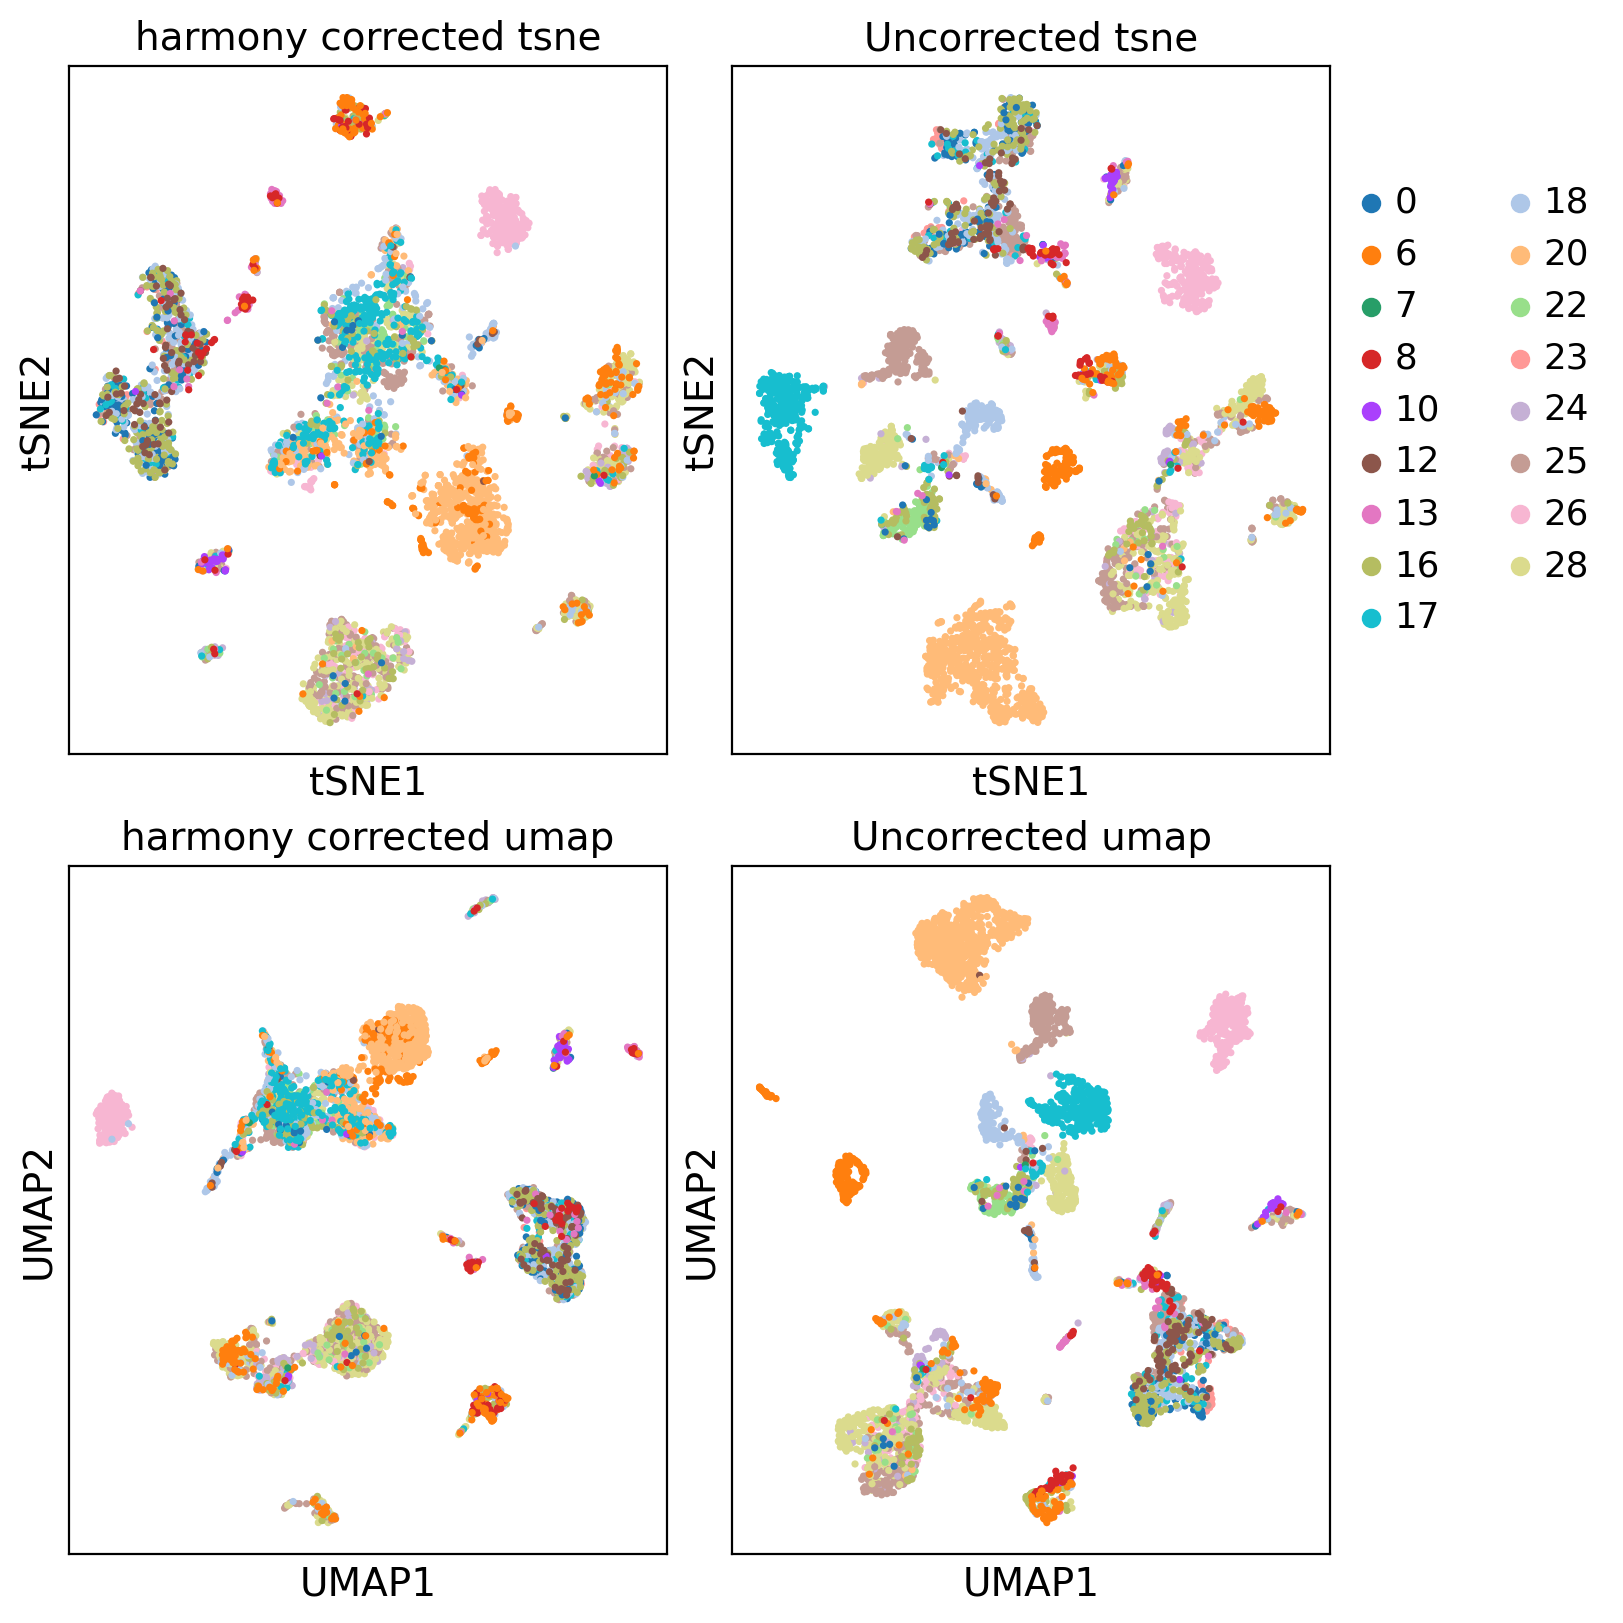

In [204]:
fig, axs = plt.subplots(2, 2, figsize=(8,8),constrained_layout=True)
sc.pl.tsne(adata_harmony, color="batch", title="harmony corrected tsne", ax=axs[0,0], show=False,legend_loc=None)
sc.pl.tsne(Puram_adata, color="batch", title="Uncorrected tsne", ax=axs[0,1], show=False,)
sc.pl.umap(adata_harmony, color="batch", title="harmony corrected umap", ax=axs[1,0], show=False,legend_loc=None)
sc.pl.umap(Puram_adata, color="batch", title="Uncorrected umap", ax=axs[1,1], show=False,legend_loc=None)

<AxesSubplot:title={'center':'Uncorrected umap'}, xlabel='UMAP1', ylabel='UMAP2'>

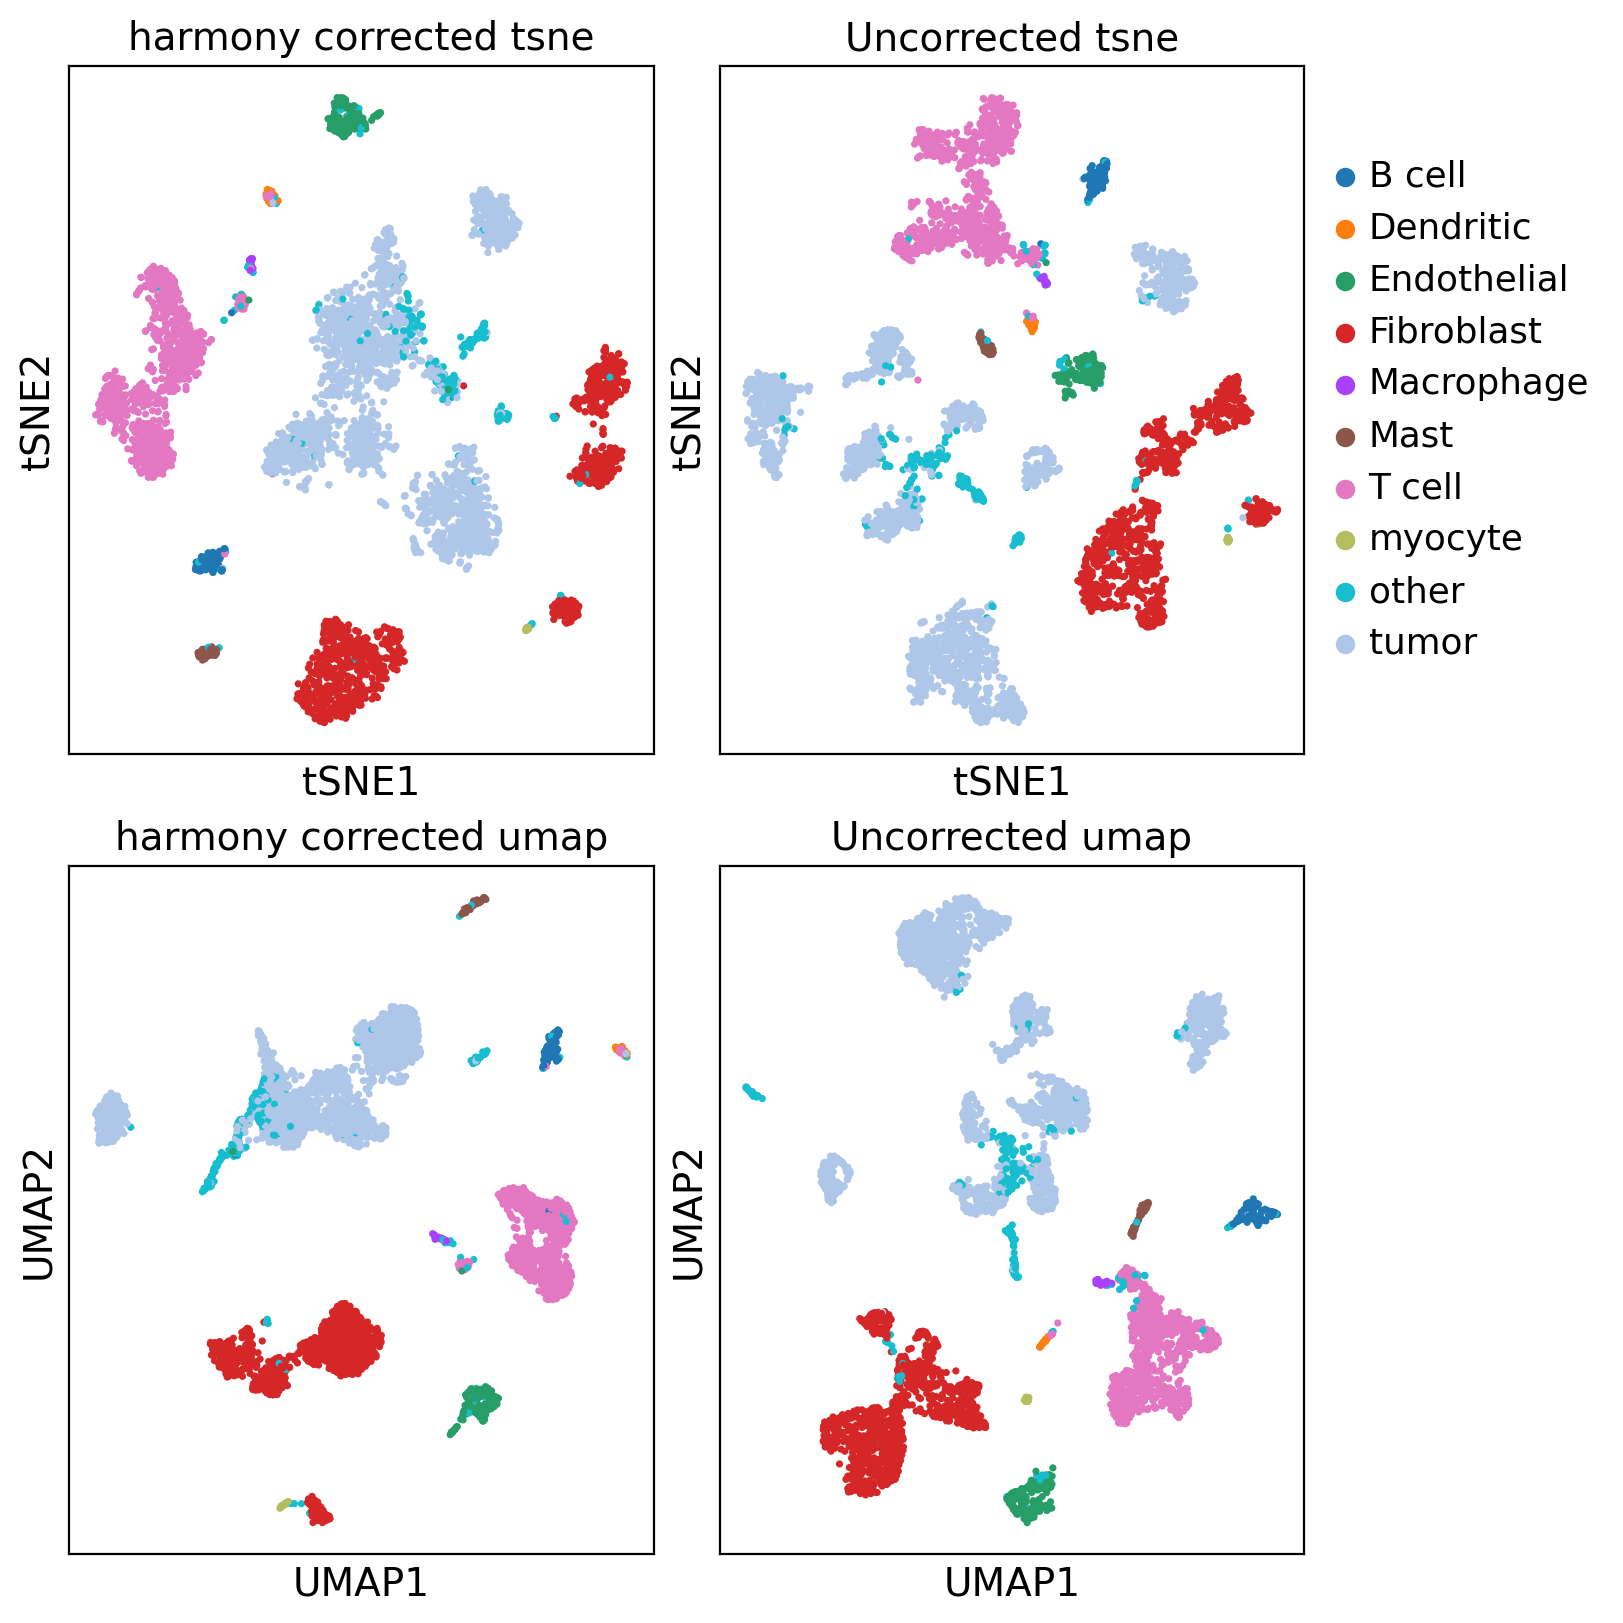

In [205]:
fig, axs = plt.subplots(2, 2, figsize=(8,8),constrained_layout=True)
sc.pl.tsne(adata_harmony, color="Cell_type", title="harmony corrected tsne", ax=axs[0,0], show=False,legend_loc=None)
sc.pl.tsne(Puram_adata, color="Cell_type", title="Uncorrected tsne", ax=axs[0,1], show=False,)
sc.pl.umap(adata_harmony, color="Cell_type", title="harmony corrected umap", ax=axs[1,0], show=False,legend_loc=None)
sc.pl.umap(Puram_adata, color="Cell_type", title="Uncorrected umap", ax=axs[1,1], show=False,legend_loc=None)

In [189]:
adata_harmony
#after preprocessing and be removel, left with 4460 cells x 5166 genes

AnnData object with n_obs × n_vars = 4460 × 5166
    obs: 'Cell_type', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'log1p', 'doublet_info_colors', 'hvg', 'pca', 'neighbors', 'umap', 'tsne', 'Cell_type_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne', 'X_pca_harmony'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [202]:
adata_harmony = fix_batch(adata_harmony)

In [203]:
#save to file
save_file_harmony = './Puram/scanpy_harmony_corrected_Puram.h5ad'
adata_harmony.write_h5ad(save_file_harmony)

In [ ]:
adata_harmony = sc.read_h5ad(save_file_harmony)
# adata_harmony.uns['log1p']["base"] = None
adata_harmony

## Pseudo bulk prepare
Use QC filtered raw counts final_adata n_obs × n_vars = 4956 × 21437
- Subsetting to the cells for the cell type(s) of interest 
- Extracting the raw counts after QC filtering to be used for the DE analysis
- Aggregating the counts and metadata to the sample level.
- Performing the DE analysis (Need at least two biological replicates per condition to perform the analysis, but more replicates are recommended).


In [178]:
final_adata

AnnData object with n_obs × n_vars = 4956 × 21437
    obs: 'Cell_type', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'batch_colors', 'doublet_info_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [180]:
#prepare signature matrix for BLADE
merge_celltype = pd.merge(final_adata.to_df(),final_adata.obs,left_index=True,right_index=True)
counts_Puram_mean = merge_celltype.groupby(['Cell_type']).aggregate(np.mean).fillna(0)[final_adata.to_df().columns]
counts_Puram_mean

C9orf152     RPS11     ELMO2   CREB3L1     PNMA1      MMP2  \
Cell_type                                                                 
B cell       0.000000  5.841971  0.208097  0.000000  0.230034  0.015603   
Dendritic    0.017683  5.327779  0.674968  0.080368  1.543609  0.000000   
Endothelial  0.028524  5.893488  0.542106  0.015094  0.737776  2.274031   
Fibroblast   0.006479  5.699910  0.621450  0.134395  1.045224  2.550525   
Macrophage   0.000000  5.739950  0.564073  0.000000  0.220860  0.307643   
Mast         0.000000  4.537083  0.791185  0.000000  0.456808  0.054088   
T cell       0.000989  4.093909  0.553634  0.000375  0.351467  0.005466   
myocyte      0.000000  5.563400  0.449079  0.000000  0.395577  0.000000   
other        0.126178  5.725872  0.500478  0.352287  0.281493  0.424537   
tumor        0.021723  6.394413  0.743162  0.004988  0.815725  0.765998   

              TMEM216  TRAF3IP2-AS1  LRRC37A5P  LOC653712  ...   MIR4691  \
Cell_type                                                  ...             
B cell       0.214721      0.320511   0.000000   0.051794  ...  0.000000   
Dendritic    0.102317      0.472534   0.000000   0.021111  ...  0.000000   
Endothelial  0.356632      0.566792   0.000000   0.088073  ...  0.033285   
Fibroblast   0.370137      0.469901   0.000000   0.078529  ...  0.000000   
Macrophage   0.398693      0.210133   0.000000   0.107055  ...  0.000000   
Mast         0.286619      0.541879   0.000000   0.084423  ...  0.000000   
T cell       0.266673      0.484706   0.000000   0.067649  ...  0.010042   
myocyte      0.590000      0.355984   0.000000   0.098756  ...  0.000000   
other        0.346321      0.467127   0.001700   0.083870  ...  0.009677   
tumor        0.968635      0.252611   0.000483   0.071757  ...  0.003856   

                GPLD1     RAB8A     RXFP2     PCIF1   PIK3IP1    SNRPD2  \
Cell_type                                                                 
B cell       0.228013  2.436444  0.000000  0.833788  0.223408  2.039287   
Dendritic    0.118238  3.221513  0.000000  0.794228  0.426315  1.887854   
Endothelial  0.164598  1.670316  0.000000  1.222308  0.865399  2.958933   
Fibroblast   0.138277  1.207295  0.000802  1.099708  0.635732  2.501452   
Macrophage   0.150374  3.397401  0.000000  1.061364  1.446469  4.114600   
Mast         0.139658  1.752919  0.000000  1.013755  1.883503  1.997951   
T cell       0.250712  1.497070  0.002590  0.958977  3.408460  2.076782   
myocyte      0.154230  0.706905  0.000000  1.012489  0.126706  3.142584   
other        0.302072  1.486075  0.000000  1.106998  1.086586  3.540576   
tumor        0.159365  2.488540  0.000000  1.830725  1.125250  5.622200   

              SLC39A6      CTSC      AQP7  
Cell_type                                  
B cell       0.223141  0.901751  0.000000  
Dendritic    0.414837  2.988974  0.000000  
Endothelial  0.207165  1.829729  0.012274  
Fibroblast   0.758208  1.145382  0.044894  
Macrophage   0.552769  4.050639  0.000000  
Mast         0.483878  1.284788  0.031048  
T cell       0.343637  1.722533  0.001250  
myocyte      0.272967  0.597943  0.159247  
other        0.997367  1.556963  0.034712  
tumor        1.978218  3.001549  0.004262  

[10 rows x 21437 columns]

In [181]:
#prepare signature matrix for BLADE
# merge_celltype = pd.merge(final_adata.to_df(),final_adata.obs,left_index=True,right_index=True)
counts_Puram_std = merge_celltype.groupby(['Cell_type']).aggregate(np.std).fillna(0)[final_adata.to_df().columns]
counts_Puram_std

C9orf152     RPS11     ELMO2   CREB3L1     PNMA1      MMP2  \
Cell_type                                                                 
B cell       0.000000  2.019362  0.971853  0.000000  1.091669  0.093521   
Dendritic    0.122514  2.259893  1.738026  0.511928  2.495990  0.000000   
Endothelial  0.308069  2.120311  1.470512  0.201384  1.719836  2.713237   
Fibroblast   0.147669  2.178851  1.592225  0.646024  2.106620  3.410712   
Macrophage   0.000000  2.320041  1.462617  0.000000  0.863410  1.061976   
Mast         0.000000  2.871232  1.851910  0.000000  1.543542  0.497207   
T cell       0.015141  3.228158  1.757462  0.009196  1.418586  0.120705   
myocyte      0.000000  2.530170  1.345163  0.000000  1.165545  0.000000   
other        0.669535  2.613593  1.335955  1.121172  1.114049  1.401454   
tumor        0.253909  1.073176  1.376955  0.093635  1.531974  1.507106   

              TMEM216  TRAF3IP2-AS1  LRRC37A5P  LOC653712  ...   MIR4691  \
Cell_type                                                  ...             
B cell       1.093570      0.681402   0.000000   0.272491  ...  0.000000   
Dendritic    0.708871      0.745296   0.000000   0.089699  ...  0.000000   
Endothelial  1.309095      1.026694   0.000000   0.396753  ...  0.317736   
Fibroblast   1.323181      0.901875   0.000000   0.333615  ...  0.000000   
Macrophage   1.163555      0.216550   0.000000   0.263359  ...  0.000000   
Mast         1.190775      1.099480   0.000000   0.357105  ...  0.000000   
T cell       1.289294      0.573813   0.000000   0.351964  ...  0.194349   
myocyte      1.770219      0.676652   0.000000   0.300629  ...  0.000000   
other        1.242585      0.751043   0.029729   0.340897  ...  0.169286   
tumor        1.715508      0.493715   0.015093   0.294160  ...  0.118504   

                GPLD1     RAB8A     RXFP2     PCIF1   PIK3IP1    SNRPD2  \
Cell_type                                                                 
B cell       0.691980  2.685171  0.000000  1.839502  1.127302  2.679954   
Dendritic    0.131234  2.652370  0.000000  1.787145  1.468092  2.427689   
Endothelial  0.280735  2.307711  0.000000  2.125834  1.961044  2.860173   
Fibroblast   0.387415  2.121593  0.028043  2.065924  1.728969  2.718274   
Macrophage   0.274091  2.094435  0.000000  1.564308  2.279515  2.168476   
Mast         0.148252  2.503318  0.000000  2.099219  2.852533  2.739890   
T cell       0.317795  2.631529  0.066658  2.153249  3.475562  3.020049   
myocyte      0.291017  1.692103  0.000000  1.749797  0.472471  2.245053   
other        0.826383  2.166226  0.000000  2.077927  2.160704  2.862519   
tumor        0.458924  1.876025  0.000000  1.902780  1.865176  1.389382   

              SLC39A6      CTSC      AQP7  
Cell_type                                  
B cell       0.963604  1.652728  0.000000  
Dendritic    1.293584  2.704099  0.000000  
Endothelial  0.909893  2.264816  0.100144  
Fibroblast   1.728176  1.808431  0.440838  
Macrophage   1.277862  2.713987  0.000000  
Mast         1.500843  1.975640  0.221344  
T cell       1.344069  2.494963  0.025032  
myocyte      1.028285  1.037213  0.694143  
other        1.779766  2.063712  0.350125  
tumor        1.977725  2.125034  0.097014  

[10 rows x 21437 columns]

In [182]:
# save sc ref for BLADE in pseudo bulk analysis
counts_Puram_mean.T.to_csv("/home/cke/Puram/HNSCC2PuramGSE103322_qc_mean.tsv",sep='\t')
counts_Puram_std.T.to_csv("/home/cke/Puram/HNSCC2PuramGSE103322_qc_std.tsv",sep='\t')

In [183]:
merge_celltype

C9orf152   RPS11    ELMO2  CREB3L1    PNMA1  \
HN28_P15_D06_S330_comb      0.00000  6.0037  0.00000      0.0  5.14740   
HN28_P6_G05_S173_comb       0.00000  7.3006  0.00000      0.0  5.33290   
HN26_P14_D11_S239_comb      0.42761  7.2885  0.00000      0.0  2.83370   
HN26_P14_H05_S281_comb      0.00000  0.0000  5.24650      0.0  5.75070   
HN26_P25_H09_S189_comb      0.00000  7.4742  0.50487      0.0  0.19661   
...                             ...     ...      ...      ...      ...   
HNSCC17_P4_G12_S180_comb    0.00000  5.3595  0.00000      0.0  0.00000   
HNSCC20_P13_C05_S221_comb   0.00000  7.4281  0.00000      0.0  0.00000   
HNSCC17_P4_C12_S132_comb    0.00000  6.8439  3.28630      0.0  0.00000   
HNSCC20_P3_H08_S92_comb     0.00000  6.8676  0.00000      0.0  5.34620   
HNSCC20_P3_G06_S78_comb     0.00000  6.3146  3.59050      0.0  0.00000   

                              MMP2  TMEM216  TRAF3IP2-AS1  LRRC37A5P  \
HN28_P15_D06_S330_comb     0.00000   0.0000       0.29983        0.0   
HN28_P6_G05_S173_comb      0.00000   0.0000       0.59072        0.0   
HN26_P14_D11_S239_comb     0.00000   3.6040       0.13093        0.0   
HN26_P14_H05_S281_comb     0.00000   4.9978       3.28420        0.0   
HN26_P25_H09_S189_comb     0.36065   0.0000       0.16092        0.0   
...                            ...      ...           ...        ...   
HNSCC17_P4_G12_S180_comb   4.55370   0.0000       0.00000        0.0   
HNSCC20_P13_C05_S221_comb  0.00000   4.8608       0.00000        0.0   
HNSCC17_P4_C12_S132_comb   0.00000   0.0000       0.00000        0.0   
HNSCC20_P3_H08_S92_comb    0.00000   4.4569       0.33342        0.0   
HNSCC20_P3_G06_S78_comb    0.00000   0.0000       3.07830        0.0   

                           LOC653712  ...  total_counts_ribo  pct_counts_ribo  \
HN28_P15_D06_S330_comb       0.00000  ...         496.078857         4.566653   
HN28_P6_G05_S173_comb        0.00000  ...         536.591492         6.531142   
HN26_P14_D11_S239_comb       0.00000  ...         596.789917         4.050444   
HN26_P14_H05_S281_comb       0.00000  ...         513.661133         5.851809   
HN26_P25_H09_S189_comb       0.00000  ...         600.984863         4.601677   
...                              ...  ...                ...              ...   
HNSCC17_P4_G12_S180_comb     0.00000  ...         497.123260         4.411548   
HNSCC20_P13_C05_S221_comb    0.90920  ...         565.387085         3.919786   
HNSCC17_P4_C12_S132_comb     0.00000  ...         568.009644         3.773281   
HNSCC20_P3_H08_S92_comb      0.00000  ...         484.732178         3.411739   
HNSCC20_P3_G06_S78_comb      0.40599  ...         500.776367         3.276277   

                           total_counts_hb  pct_counts_hb  percent_mt2  \
HN28_P15_D06_S330_comb             3.10450       0.028578          0.0   
HN28_P6_G05_S173_comb              0.00000       0.000000          0.0   
HN26_P14_D11_S239_comb             2.54990       0.017306          0.0   
HN26_P14_H05_S281_comb             0.18523       0.002110          0.0   
HN26_P25_H09_S189_comb             2.86773       0.021958          0.0   
...                                    ...            ...          ...   
HNSCC17_P4_G12_S180_comb           0.00000       0.000000          0.0   
HNSCC20_P13_C05_S221_comb          0.00000       0.000000          0.0   
HNSCC17_P4_C12_S132_comb           2.32510       0.015446          0.0   
HNSCC20_P3_H08_S92_comb            0.00000       0.000000          0.0   
HNSCC20_P3_G06_S78_comb            0.42975       0.002812          0.0   

                               n_counts  n_genes  doublet_scores  \
HN28_P15_D06_S330_comb     10849.692383     4286        0.002056   
HN28_P6_G05_S173_comb       8208.529297     2723        0.001089   
HN26_P14_D11_S239_comb     14724.187500     6965        0.001160   
HN26_P14_H05_S281_comb      8770.863281     3451        0.006170   
HN26_P25_H09_S189_comb     13049.633789     7355        0.000698   
...

In [184]:
final_adata.to_df()

C9orf152   RPS11    ELMO2  CREB3L1    PNMA1  \
HN28_P15_D06_S330_comb      0.00000  6.0037  0.00000      0.0  5.14740   
HN28_P6_G05_S173_comb       0.00000  7.3006  0.00000      0.0  5.33290   
HN26_P14_D11_S239_comb      0.42761  7.2885  0.00000      0.0  2.83370   
HN26_P14_H05_S281_comb      0.00000  0.0000  5.24650      0.0  5.75070   
HN26_P25_H09_S189_comb      0.00000  7.4742  0.50487      0.0  0.19661   
...                             ...     ...      ...      ...      ...   
HNSCC17_P4_G12_S180_comb    0.00000  5.3595  0.00000      0.0  0.00000   
HNSCC20_P13_C05_S221_comb   0.00000  7.4281  0.00000      0.0  0.00000   
HNSCC17_P4_C12_S132_comb    0.00000  6.8439  3.28630      0.0  0.00000   
HNSCC20_P3_H08_S92_comb     0.00000  6.8676  0.00000      0.0  5.34620   
HNSCC20_P3_G06_S78_comb     0.00000  6.3146  3.59050      0.0  0.00000   

                              MMP2  TMEM216  TRAF3IP2-AS1  LRRC37A5P  \
HN28_P15_D06_S330_comb     0.00000   0.0000       0.29983        0.0   
HN28_P6_G05_S173_comb      0.00000   0.0000       0.59072        0.0   
HN26_P14_D11_S239_comb     0.00000   3.6040       0.13093        0.0   
HN26_P14_H05_S281_comb     0.00000   4.9978       3.28420        0.0   
HN26_P25_H09_S189_comb     0.36065   0.0000       0.16092        0.0   
...                            ...      ...           ...        ...   
HNSCC17_P4_G12_S180_comb   4.55370   0.0000       0.00000        0.0   
HNSCC20_P13_C05_S221_comb  0.00000   4.8608       0.00000        0.0   
HNSCC17_P4_C12_S132_comb   0.00000   0.0000       0.00000        0.0   
HNSCC20_P3_H08_S92_comb    0.00000   4.4569       0.33342        0.0   
HNSCC20_P3_G06_S78_comb    0.00000   0.0000       3.07830        0.0   

                           LOC653712  ...  MIR4691     GPLD1    RAB8A  RXFP2  \
HN28_P15_D06_S330_comb       0.00000  ...      0.0  0.125650  0.17377    0.0   
HN28_P6_G05_S173_comb        0.00000  ...      0.0  0.000000  0.00000    0.0   
HN26_P14_D11_S239_comb       0.00000  ...      0.0  0.000000  0.93130    0.0   
HN26_P14_H05_S281_comb       0.00000  ...      0.0  0.046840  5.54370    0.0   
HN26_P25_H09_S189_comb       0.00000  ...      0.0  0.069015  0.31150    0.0   
...                              ...  ...      ...       ...      ...    ...   
HNSCC17_P4_G12_S180_comb     0.00000  ...      0.0  0.059355  4.18290    0.0   
HNSCC20_P13_C05_S221_comb    0.90920  ...      0.0  0.244890  0.00000    0.0   
HNSCC17_P4_C12_S132_comb     0.00000  ...      0.0  2.310600  3.44400    0.0   
HNSCC20_P3_H08_S92_comb      0.00000  ...      0.0  0.120350  0.00000    0.0   
HNSCC20_P3_G06_S78_comb      0.40599  ...      0.0  0.000000  3.36010    0.0   

                            PCIF1  PIK3IP1  SNRPD2  SLC39A6      CTSC  AQP7  
HN28_P15_D06_S330_comb     4.0557   0.0000  0.0000   0.0000  0.062122   0.0  
HN28_P6_G05_S173_comb      6.2641   0.0000  5.0846   0.0000  0.282140   0.0  
HN26_P14_D11_S239_comb     4.0897   3.0234  5.8272   0.0000  3.719600   0.0  
HN26_P14_H05_S281_comb     0.0000   6.2743  0.0000   0.0000  0.168640   0.0  
HN26_P25_H09_S189_comb     4.7105   3.8261  4.4258   0.0000  3.414500   0.0  
...                           ...      ...     ...      ...       ...   ...  
HNSCC17_P4_G12_S180_comb   0.0000   2.1919  5.5306   0.0000  5.665900   0.0  
HNSCC20_P13_C05_S221_comb  0.0000   0.0000  3.9699   0.0000  0.931300   0.0  
HNSCC17_P4_C12_S132_comb   2.3796   0.0000  6.2187   4.4841  4.804400   0.0  
HNSCC20_P3_H08_S92_comb    4.0692   1.4447  5.8587   0.0000  0.116360   0.0  
HNSCC20_P3_G06_S78_comb    5.0544   0.0000  5.8016   3.3105  5.314700   0.0  

[4956 rows x 21437 columns]

In [185]:
# save sc ref for pseudo bulk analysis
final_adata.to_df().to_csv("/home/cke/Puram/Puram_pseudobulk_scRNAref.tsv",sep='\t')

In [188]:
final_adata.obs

Cell_type batch  n_genes_by_counts  total_counts  \
HN28_P15_D06_S330_comb     Fibroblast    28               4286  10863.072266   
HN28_P6_G05_S173_comb      Fibroblast    28               2723   8215.890625   
HN26_P14_D11_S239_comb          tumor    26               6965  14733.937500   
HN26_P14_H05_S281_comb     Fibroblast    26               3451   8777.818359   
HN26_P25_H09_S189_comb          tumor    26               7355  13060.125977   
...                               ...   ...                ...           ...   
HNSCC17_P4_G12_S180_comb        other    17               4801  11268.680664   
HNSCC20_P13_C05_S221_comb       tumor    20               5788  14423.927734   
HNSCC17_P4_C12_S132_comb        tumor    17               5375  15053.469727   
HNSCC20_P3_H08_S92_comb         tumor    20               5666  14207.774414   
HNSCC20_P3_G06_S78_comb         tumor    20               5653  15284.923828   

                           total_counts_mt  pct_counts_mt  total_counts_ribo  \
HN28_P15_D06_S330_comb                 0.0            0.0         496.078857   
HN28_P6_G05_S173_comb                  0.0            0.0         536.591492   
HN26_P14_D11_S239_comb                 0.0            0.0         596.789917   
HN26_P14_H05_S281_comb                 0.0            0.0         513.661133   
HN26_P25_H09_S189_comb                 0.0            0.0         600.984863   
...                                    ...            ...                ...   
HNSCC17_P4_G12_S180_comb               0.0            0.0         497.123260   
HNSCC20_P13_C05_S221_comb              0.0            0.0         565.387085   
HNSCC17_P4_C12_S132_comb               0.0            0.0         568.009644   
HNSCC20_P3_H08_S92_comb                0.0            0.0         484.732178   
HNSCC20_P3_G06_S78_comb                0.0            0.0         500.776367   

                           pct_counts_ribo  total_counts_hb  pct_counts_hb  \
HN28_P15_D06_S330_comb            4.566653          3.10450       0.028578   
HN28_P6_G05_S173_comb             6.531142          0.00000       0.000000   
HN26_P14_D11_S239_comb            4.050444          2.54990       0.017306   
HN26_P14_H05_S281_comb            5.851809          0.18523       0.002110   
HN26_P25_H09_S189_comb            4.601677          2.86773       0.021958   
...                                    ...              ...            ...   
HNSCC17_P4_G12_S180_comb          4.411548          0.00000       0.000000   
HNSCC20_P13_C05_S221_comb         3.919786          0.00000       0.000000   
HNSCC17_P4_C12_S132_comb          3.773281          2.32510       0.015446   
HNSCC20_P3_H08_S92_comb           3.411739          0.00000       0.000000   
HNSCC20_P3_G06_S78_comb           3.276277          0.42975       0.002812   

                           percent_mt2      n_counts  n_genes  doublet_scores  \
HN28_P15_D06_S330_comb             0.0  10849.692383     4286        0.002056   
HN28_P6_G05_S173_comb              0.0   8208.529297     2723        0.001089   
HN26_P14_D11_S239_comb             0.0  14724.187500     6965        0.001160   
HN26_P14_H05_S281_comb             0.0   8770.863281     3451        0.006170   
HN26_P25_H09_S189_comb             0.0  13049.633789     7355        0.000698   
...                                ...           ...      ...             ...   
HNSCC17_P4_G12_S180_comb           0.0  11259.979492     4801        0.002662   
HNSCC20_P13_C05_S221_comb          0.0  14415.700195     5788        0.001874   
HNSCC17_P4_C12_S132_comb           0.0  15046.707031     5375        0.002662   
HNSCC20_P3_H08_S92_comb            0.0  14200.664062     5666        0.002554   
HNSCC20_P3_G06_S78_comb            0.0  15278.519531     5653        0.002774   

                           predicted_doublets doublet_info  
HN28_P15_D06_S330_comb                  False        False  
HN28_P6_G05_S173_comb                   False        False  
HN26_P14_D11_

In [191]:
merge_sample = pd.merge(final_adata.to_df(),final_adata.obs,left_index=True,right_index=True)
bulk_pseudocount_raw = merge_sample.groupby(['batch']).sum().iloc[:,:21437]
bulk_pseudocount_raw

C9orf152        RPS11       ELMO2     CREB3L1       PNMA1  \
batch                                                               
0       0.146660   877.720459  202.346298    0.000000  113.409203   
6       1.383703  2037.326050  146.851532   46.891560  269.970703   
7       0.000000    26.748199    9.632000    0.000000    0.000000   
8       0.296310   513.901794   35.811131    4.330050   39.936310   
10      0.219090   434.960114    6.713079    0.887530   14.146150   
12      0.000000   486.314117   79.786667    0.000000   22.443897   
13      0.000000   377.705688   48.830219    3.857660   56.491035   
16      1.243891  2266.588379  297.724335   15.295500  238.045959   
17      3.454536  2740.735352  234.773590    8.477082  108.248535   
18     31.950871  2325.199707  307.055969  107.699387  235.340012   
20     31.546955  3037.007568  392.446228    4.574300  499.506012   
22      0.000000   879.321106  167.472092    0.000000   87.056351   
23      0.000000   292.051910   28.379169    0.000000   21.911119   
24      4.578700   692.594788   94.213097   52.064140  233.000580   
25      5.538586  4051.464844  403.718536   17.293520  765.282288   
26      6.155789  2696.526123  312.439453    6.078085  393.971649   
28      6.075330  3885.042969  362.064026   20.774380  421.727325   

              MMP2     TMEM216  TRAF3IP2-AS1  LRRC37A5P  LOC653712  ...  \
batch                                                               ...   
0        45.430355   57.682301    127.312759    0.00000  12.708550  ...   
6       495.995758  161.015884    140.229080    1.08272  19.482645  ...   
7         4.881300    0.000000      0.685584    0.00000   0.056584  ...   
8       109.194702   14.057400     45.321751    0.00000   3.503540  ...   
10      117.446030   29.719999     19.042589    0.00000   3.117744  ...   
12        0.749068   22.398529     51.535603    0.00000   8.572930  ...   
13       31.252373   39.346348     31.539017    0.00000   1.524424  ...   
16      498.715607  212.933716    219.304916    0.00000  57.878124  ...   
17      412.157227  254.487457    116.090645    0.00000  22.230804  ...   
18      271.969177  145.348358    155.220947    0.00000  19.912508  ...   
20      102.409966  669.161865    163.032837    0.30451  56.252678  ...   
22      373.735138  108.354492     53.153320    0.00000   3.942041  ...   
23        0.000000   22.479801     27.785650    0.00000   2.494100  ...   
24      536.820557   42.265499     36.991608    0.00000  15.827640  ...   
25      756.589417  412.282806    288.309265    0.00000  61.554688  ...   
26      194.038025  313.474548    199.206604    0.00000  35.851181  ...   
28     1103.685181  241.598938    274.100037    0.00000  38.726768  ...   

       MIR4691       GPLD1        RAB8A    RXFP2        PCIF1      PIK3IP1  \
batch                                                                        
0       3.4588   53.814304   378.277496  0.00000   251.925751   902.321960   
6       0.0000   80.127975   622.333923  0.00000   354.291077   219.429443   
7       0.0000    0.449178    15.637600  0.00000     0.000000     8.658300   
8       0.0000   33.055904   110.175644  0.00000    68.483429   178.874039   
10      3.8449   17.661652   197.239792  0.00000    59.112389    21.624331   
12      0.0000   34.786556   232.412827  0.83431   173.141403   500.322906   
13      0.0000   11.889826   247.976410  0.00000    89.287086   126.952606   
16      6.4181  104.381767   862.780884  0.00000   509.261108  1112.457764   
17      0.0000   61.745361  1373.005737  0.00000   577.026123   863.977478   
18     10.6845   92.031349   913.882629  0.98112   485.762299  1086.186401   
20      0.0000  122.551353   964.225708  0.00000  1102.744385   568.655640   
22      0.0000   14.615252   401.756256  0.00000   351.726837   196.130081   
23      0.0000    4.009156    46.606678  0.00000    64.518433   183.111115   
24      0.0000   11.230447   211.215286  0.00000   166.981476   115.845490   
25      2.6729   90.67

In [192]:
# save pseudobulk raw counts to be decon 
bulk_pseudocount_raw.to_csv("/home/cke/Puram/Puram_pseudobulk_fromraw.tsv",sep='\t')

In [4]:
bulk_pseudocount_raw = pd.read_csv("/home/cke/Puram/Puram_pseudobulk_fromraw.tsv",sep='\t')
bulk_pseudocount_raw

batch   C9orf152       RPS11       ELMO2     CREB3L1       PNMA1  \
0       0   0.146660   877.72046  202.346300    0.000000  113.409200   
1       6   1.383703  2037.32600  146.851530   46.891560  269.970700   
2       7   0.000000    26.74820    9.632000    0.000000    0.000000   
3       8   0.296310   513.90180   35.811130    4.330050   39.936310   
4      10   0.219090   434.96010    6.713079    0.887530   14.146150   
5      12   0.000000   486.31412   79.786670    0.000000   22.443897   
6      13   0.000000   377.70570   48.830220    3.857660   56.491035   
7      16   1.243891  2266.58840  297.724330   15.295500  238.045960   
8      17   3.454536  2740.73540  234.773590    8.477082  108.248535   
9      18  31.950870  2325.19970  307.055970  107.699390  235.340010   
10     20  31.546955  3037.00760  392.446230    4.574300  499.506000   
11     22   0.000000   879.32110  167.472090    0.000000   87.056350   
12     23   0.000000   292.05190   28.379170    0.000000   21.911120   
13     24   4.578700   692.59480   94.213100   52.064140  233.000580   
14     25   5.538586  4051.46480  403.718540   17.293520  765.282300   
15     26   6.155789  2696.52610  312.439450    6.078085  393.971650   
16     28   6.075330  3885.04300  362.064030   20.774380  421.727330   

           MMP2     TMEM216  TRAF3IP2-AS1  LRRC37A5P  ...  MIR4691  \
0     45.430355   57.682300    127.312760    0.00000  ...   3.4588   
1    495.995760  161.015880    140.229080    1.08272  ...   0.0000   
2      4.881300    0.000000      0.685584    0.00000  ...   0.0000   
3    109.194700   14.057400     45.321750    0.00000  ...   0.0000   
4    117.446030   29.720000     19.042590    0.00000  ...   3.8449   
5      0.749068   22.398530     51.535603    0.00000  ...   0.0000   
6     31.252373   39.346348     31.539017    0.00000  ...   0.0000   
7    498.715600  212.933720    219.304920    0.00000  ...   6.4181   
8    412.157230  254.487460    116.090645    0.00000  ...   0.0000   
9    271.969180  145.348360    155.220950    0.00000  ...  10.6845   
10   102.409966  669.161870    163.032840    0.30451  ...   0.0000   
11   373.735140  108.354490     53.153320    0.00000  ...   0.0000   
12     0.000000   22.479801     27.785650    0.00000  ...   0.0000   
13   536.820560   42.265500     36.991608    0.00000  ...   0.0000   
14   756.589400  412.282800    288.309270    0.00000  ...   2.6729   
15   194.038020  313.474550    199.206600    0.00000  ...   0.0000   
16  1103.685200  241.598940    274.100040    0.00000  ...   0.0000   

         GPLD1        RAB8A    RXFP2       PCIF1     PIK3IP1      SNRPD2  \
0    53.814304   378.277500  0.00000   251.92575   902.32196   624.16693   
1    80.127975   622.333900  0.00000   354.29108   219.42944  1224.89140   
2     0.449178    15.637600  0.00000     0.00000     8.65830    11.72040   
3    33.055904   110.175644  0.00000    68.48343   178.87404   225.41510   
4    17.661652   197.239790  0.00000    59.11239    21.62433   186.78873   
5    34.786556   232.412830  0.83431   173.14140   500.32290   269.57100   
6    11.889826   247.976410  0.00000    89.28709   126.95261   183.43620   
7   104.381770   862.780900  0.00000   509.26110  1112.45780  1513.23100   
8    61.745360  1373.005700  0.00000   577.02610   863.97750  2308.25880   
9    92.031350   913.882600  0.98112   485.76230  1086.18640  1617.10750   
10  122.551350   964.225700  0.00000  1102.74440   568.65564  2911.09030   
11   14.615252   401.756260  0.00000   351.72684   196.13008   743.85890   
12    4.009156    46.606678  0.00000    64.51843   183.11111    86.53440   
13   11.230447   211.215290  0.00000   166.98148   115.84549   335.86163   
14   90.678140  1136.372800  2.07180   797.53980   616.31470  2177.74460   
15  102.378330   618.945400  0.00000   588.63080   410.91412  1644.11250   
16   80.592020   816.077200  0.00000   927.16595   280.80480  1780.53930   

        SLC39A6        CTSC      AQP7  
0    101.812510   392.63065   7.17850

In [8]:
bulk_pseudocount_raw.transpose().to_csv("/home/cke/Puram/Puram_pseudobulk_fromraw_transposed.tsv",sep='\t',header=False)
# for input of CIBERSORTX

In [193]:
# export real annotated cell type prop for pseudo bulk samples counts
merge_sample

C9orf152   RPS11    ELMO2  CREB3L1    PNMA1  \
HN28_P15_D06_S330_comb      0.00000  6.0037  0.00000      0.0  5.14740   
HN28_P6_G05_S173_comb       0.00000  7.3006  0.00000      0.0  5.33290   
HN26_P14_D11_S239_comb      0.42761  7.2885  0.00000      0.0  2.83370   
HN26_P14_H05_S281_comb      0.00000  0.0000  5.24650      0.0  5.75070   
HN26_P25_H09_S189_comb      0.00000  7.4742  0.50487      0.0  0.19661   
...                             ...     ...      ...      ...      ...   
HNSCC17_P4_G12_S180_comb    0.00000  5.3595  0.00000      0.0  0.00000   
HNSCC20_P13_C05_S221_comb   0.00000  7.4281  0.00000      0.0  0.00000   
HNSCC17_P4_C12_S132_comb    0.00000  6.8439  3.28630      0.0  0.00000   
HNSCC20_P3_H08_S92_comb     0.00000  6.8676  0.00000      0.0  5.34620   
HNSCC20_P3_G06_S78_comb     0.00000  6.3146  3.59050      0.0  0.00000   

                              MMP2  TMEM216  TRAF3IP2-AS1  LRRC37A5P  \
HN28_P15_D06_S330_comb     0.00000   0.0000       0.29983        0.0   
HN28_P6_G05_S173_comb      0.00000   0.0000       0.59072        0.0   
HN26_P14_D11_S239_comb     0.00000   3.6040       0.13093        0.0   
HN26_P14_H05_S281_comb     0.00000   4.9978       3.28420        0.0   
HN26_P25_H09_S189_comb     0.36065   0.0000       0.16092        0.0   
...                            ...      ...           ...        ...   
HNSCC17_P4_G12_S180_comb   4.55370   0.0000       0.00000        0.0   
HNSCC20_P13_C05_S221_comb  0.00000   4.8608       0.00000        0.0   
HNSCC17_P4_C12_S132_comb   0.00000   0.0000       0.00000        0.0   
HNSCC20_P3_H08_S92_comb    0.00000   4.4569       0.33342        0.0   
HNSCC20_P3_G06_S78_comb    0.00000   0.0000       3.07830        0.0   

                           LOC653712  ...  total_counts_ribo  pct_counts_ribo  \
HN28_P15_D06_S330_comb       0.00000  ...         496.078857         4.566653   
HN28_P6_G05_S173_comb        0.00000  ...         536.591492         6.531142   
HN26_P14_D11_S239_comb       0.00000  ...         596.789917         4.050444   
HN26_P14_H05_S281_comb       0.00000  ...         513.661133         5.851809   
HN26_P25_H09_S189_comb       0.00000  ...         600.984863         4.601677   
...                              ...  ...                ...              ...   
HNSCC17_P4_G12_S180_comb     0.00000  ...         497.123260         4.411548   
HNSCC20_P13_C05_S221_comb    0.90920  ...         565.387085         3.919786   
HNSCC17_P4_C12_S132_comb     0.00000  ...         568.009644         3.773281   
HNSCC20_P3_H08_S92_comb      0.00000  ...         484.732178         3.411739   
HNSCC20_P3_G06_S78_comb      0.40599  ...         500.776367         3.276277   

                           total_counts_hb  pct_counts_hb  percent_mt2  \
HN28_P15_D06_S330_comb             3.10450       0.028578          0.0   
HN28_P6_G05_S173_comb              0.00000       0.000000          0.0   
HN26_P14_D11_S239_comb             2.54990       0.017306          0.0   
HN26_P14_H05_S281_comb             0.18523       0.002110          0.0   
HN26_P25_H09_S189_comb             2.86773       0.021958          0.0   
...                                    ...            ...          ...   
HNSCC17_P4_G12_S180_comb           0.00000       0.000000          0.0   
HNSCC20_P13_C05_S221_comb          0.00000       0.000000          0.0   
HNSCC17_P4_C12_S132_comb           2.32510       0.015446          0.0   
HNSCC20_P3_H08_S92_comb            0.00000       0.000000          0.0   
HNSCC20_P3_G06_S78_comb            0.42975       0.002812          0.0   

                               n_counts  n_genes  doublet_scores  \
HN28_P15_D06_S330_comb     10849.692383     4286        0.002056   
HN28_P6_G05_S173_comb       8208.529297     2723        0.001089   
HN26_P14_D11_S239_comb     14724.187500     6965        0.001160   
HN26_P14_H05_S281_comb      8770.863281     3451        0.006170   
HN26_P25_H09_S189_comb     13049.633789     7355        0.000698   
...

In [194]:
merge_sample['Cell_type'].value_counts()

tumor          1796
Fibroblast     1224
T cell         1122
other           306
Endothelial     178
B cell          134
Mast             99
Dendritic        48
Macrophage       30
myocyte          19
Name: Cell_type, dtype: int64

In [195]:
table_celltype_count = merge_sample.groupby(['batch'], as_index=False)['Cell_type'].value_counts()
table_celltype_count

batch   Cell_type  count
0       0      T cell    199
1       0       other     15
2       0  Fibroblast     12
3       0      B cell     10
4       0       tumor      8
..    ...         ...    ...
165    28     myocyte      9
166    28      T cell      3
167    28  Macrophage      2
168    28        Mast      1
169    28   Dendritic      0

[170 rows x 3 columns]

In [226]:
True_pseudobulk_prop = table_celltype_count.pivot(columns='Cell_type',index='batch',values='count')
True_pseudobulk_prop = True_pseudobulk_prop.div(True_pseudobulk_prop.sum(axis=1), axis=0)
True_pseudobulk_prop

Cell_type    B cell  Dendritic  Endothelial  Fibroblast  Macrophage      Mast  \
batch                                                                           
0          0.039683   0.003968     0.000000    0.047619    0.007937  0.019841   
6          0.014235   0.000000     0.185053    0.281139    0.021352  0.003559   
7          0.000000   0.000000     0.000000    0.250000    0.000000  0.000000   
8          0.022989   0.000000     0.287356    0.137931    0.000000  0.022989   
10         0.537500   0.000000     0.100000    0.225000    0.000000  0.012500   
12         0.000000   0.000000     0.000000    0.007246    0.000000  0.000000   
13         0.080000   0.386667     0.026667    0.066667    0.026667  0.053333   
16         0.000000   0.010121     0.072874    0.200405    0.012146  0.030364   
17         0.014862   0.000000     0.031847    0.072187    0.004246  0.014862   
18         0.018219   0.000000     0.030364    0.080972    0.006073  0.022267   
20         0.000000   0.000000     0.001996    0.021956    0.000000  0.000000   
22         0.000000   0.005714     0.005714    0.274286    0.000000  0.108571   
23         0.000000   0.000000     0.000000    0.000000    0.000000  0.000000   
24         0.000000   0.000000     0.008000    0.712000    0.016000  0.152000   
25         0.037356   0.012931     0.001437    0.349138    0.002874  0.018678   
26         0.002381   0.007143     0.000000    0.307143    0.007143  0.002381   
28         0.042484   0.000000     0.034314    0.658497    0.003268  0.001634   

Cell_type    T cell   myocyte     other     tumor  
batch                                              
0          0.789683  0.000000  0.059524  0.031746  
6          0.000000  0.000000  0.088968  0.405694  
7          0.000000  0.000000  0.000000  0.750000  
8          0.425287  0.000000  0.103448  0.000000  
10         0.087500  0.000000  0.025000  0.012500  
12         0.898551  0.000000  0.065217  0.028986  
13         0.186667  0.000000  0.120000  0.053333  
16         0.530364  0.002024  0.048583  0.093117  
17         0.123142  0.000000  0.048832  0.690021  
18         0.388664  0.002024  0.226721  0.224696  
20         0.000000  0.000000  0.027944  0.948104  
22         0.000000  0.000000  0.022857  0.582857  
23         1.000000  0.000000  0.000000  0.000000  
24         0.008000  0.000000  0.056000  0.048000  
25         0.242816  0.011494  0.038793  0.284483  
26         0.011905  0.000000  0.040476  0.621429  
28         0.004902  0.014706  0.014706  0.225490

<AxesSubplot:xlabel='batch', ylabel='Cell_type'>

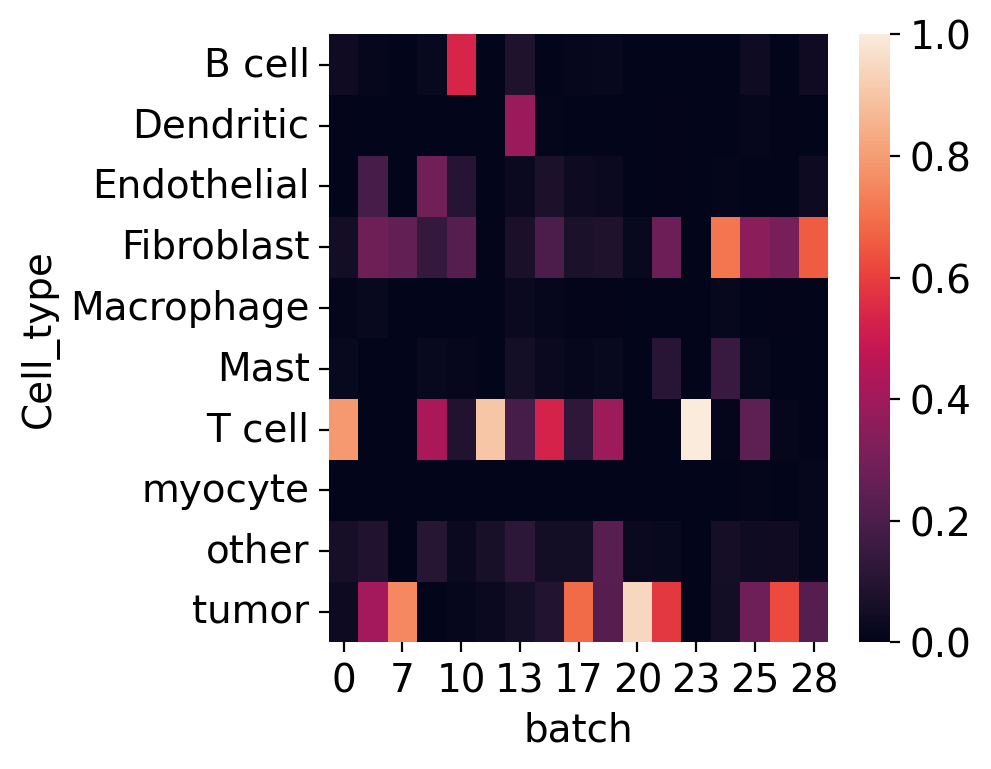

In [228]:
sns.heatmap(True_pseudobulk_prop.T)

In [232]:
# select tumor perct > 0.5 pseudo bulk samples to simulate tumor samples
# to be continued
True_pseudobulk_prop[True_pseudobulk_prop['tumor']>0.5]

Cell_type    B cell  Dendritic  Endothelial  Fibroblast  Macrophage      Mast  \
batch                                                                           
7          0.000000   0.000000     0.000000    0.250000    0.000000  0.000000   
17         0.014862   0.000000     0.031847    0.072187    0.004246  0.014862   
20         0.000000   0.000000     0.001996    0.021956    0.000000  0.000000   
22         0.000000   0.005714     0.005714    0.274286    0.000000  0.108571   
26         0.002381   0.007143     0.000000    0.307143    0.007143  0.002381   

Cell_type    T cell  myocyte     other     tumor  
batch                                             
7          0.000000      0.0  0.000000  0.750000  
17         0.123142      0.0  0.048832  0.690021  
20         0.000000      0.0  0.027944  0.948104  
22         0.000000      0.0  0.022857  0.582857  
26         0.011905      0.0  0.040476  0.621429

In [230]:
True_pseudobulk_prop.sum(axis=1)
# check sum of props to be 100% for each cell type

batch
0     1.0
6     1.0
7     1.0
8     1.0
10    1.0
12    1.0
13    1.0
16    1.0
17    1.0
18    1.0
20    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
28    1.0
dtype: float64

In [233]:
True_pseudobulk_prop.to_csv("/home/cke/Puram/Puram_pseudobulk_prop_fromraw.tsv",sep='\t')

In [264]:
bulk_pseudocount_harmony.to_csv("/home/cke/Puram/Puram_pseudobulk_fromharmony.tsv",sep='\t')

## DE

In [234]:
"""
Finding marker genes
compute a ranking for the highly differential genes in each cluster
t-test
each rank genes run overwrites existing run!
"""
sc.settings.verbosity = 2  # reduce the verbosity

In [238]:
Puram_adata.obs

Cell_type batch  n_genes_by_counts  total_counts  \
HN28_P15_D06_S330_comb     Fibroblast    28               4286  10863.072266   
HN28_P6_G05_S173_comb      Fibroblast    28               2723   8215.890625   
HN26_P14_D11_S239_comb          tumor    26               6965  14733.937500   
HN26_P14_H05_S281_comb     Fibroblast    26               3451   8777.818359   
HN26_P25_H09_S189_comb          tumor    26               7355  13060.125977   
...                               ...   ...                ...           ...   
HNSCC17_P4_G12_S180_comb        other    17               4801  11268.680664   
HNSCC20_P13_C05_S221_comb       tumor    20               5788  14423.927734   
HNSCC17_P4_C12_S132_comb        tumor    17               5375  15053.469727   
HNSCC20_P3_H08_S92_comb         tumor    20               5666  14207.774414   
HNSCC20_P3_G06_S78_comb         tumor    20               5653  15284.923828   

                           total_counts_mt  pct_counts_mt  total_counts_ribo  \
HN28_P15_D06_S330_comb                 0.0            0.0         496.078857   
HN28_P6_G05_S173_comb                  0.0            0.0         536.591492   
HN26_P14_D11_S239_comb                 0.0            0.0         596.789917   
HN26_P14_H05_S281_comb                 0.0            0.0         513.661133   
HN26_P25_H09_S189_comb                 0.0            0.0         600.984863   
...                                    ...            ...                ...   
HNSCC17_P4_G12_S180_comb               0.0            0.0         497.123260   
HNSCC20_P13_C05_S221_comb              0.0            0.0         565.387085   
HNSCC17_P4_C12_S132_comb               0.0            0.0         568.009644   
HNSCC20_P3_H08_S92_comb                0.0            0.0         484.732178   
HNSCC20_P3_G06_S78_comb                0.0            0.0         500.776367   

                           pct_counts_ribo  total_counts_hb  pct_counts_hb  \
HN28_P15_D06_S330_comb            4.566653          3.10450       0.028578   
HN28_P6_G05_S173_comb             6.531142          0.00000       0.000000   
HN26_P14_D11_S239_comb            4.050444          2.54990       0.017306   
HN26_P14_H05_S281_comb            5.851809          0.18523       0.002110   
HN26_P25_H09_S189_comb            4.601677          2.86773       0.021958   
...                                    ...              ...            ...   
HNSCC17_P4_G12_S180_comb          4.411548          0.00000       0.000000   
HNSCC20_P13_C05_S221_comb         3.919786          0.00000       0.000000   
HNSCC17_P4_C12_S132_comb          3.773281          2.32510       0.015446   
HNSCC20_P3_H08_S92_comb           3.411739          0.00000       0.000000   
HNSCC20_P3_G06_S78_comb           3.276277          0.42975       0.002812   

                           percent_mt2      n_counts  n_genes  doublet_scores  \
HN28_P15_D06_S330_comb             0.0  10849.692383     4286        0.002056   
HN28_P6_G05_S173_comb              0.0   8208.529297     2723        0.001089   
HN26_P14_D11_S239_comb             0.0  14724.187500     6965        0.001160   
HN26_P14_H05_S281_comb             0.0   8770.863281     3451        0.006170   
HN26_P25_H09_S189_comb             0.0  13049.633789     7355        0.000698   
...                                ...           ...      ...             ...   
HNSCC17_P4_G12_S180_comb           0.0  11259.979492     4801        0.002662   
HNSCC20_P13_C05_S221_comb          0.0  14415.700195     5788        0.001874   
HNSCC17_P4_C12_S132_comb           0.0  15046.707031     5375        0.002662   
HNSCC20_P3_H08_S92_comb            0.0  14200.664062     5666        0.002554   
HNSCC20_P3_G06_S78_comb            0.0  15278.519531     5653        0.002774   

                           predicted_doublets doublet_info  
HN28_P15_D06_S330_comb                  False        False  
HN28_P6_G05_S173_comb                   False        False  
HN26_P14_D11_

ranking genes
    finished (0:00:26)


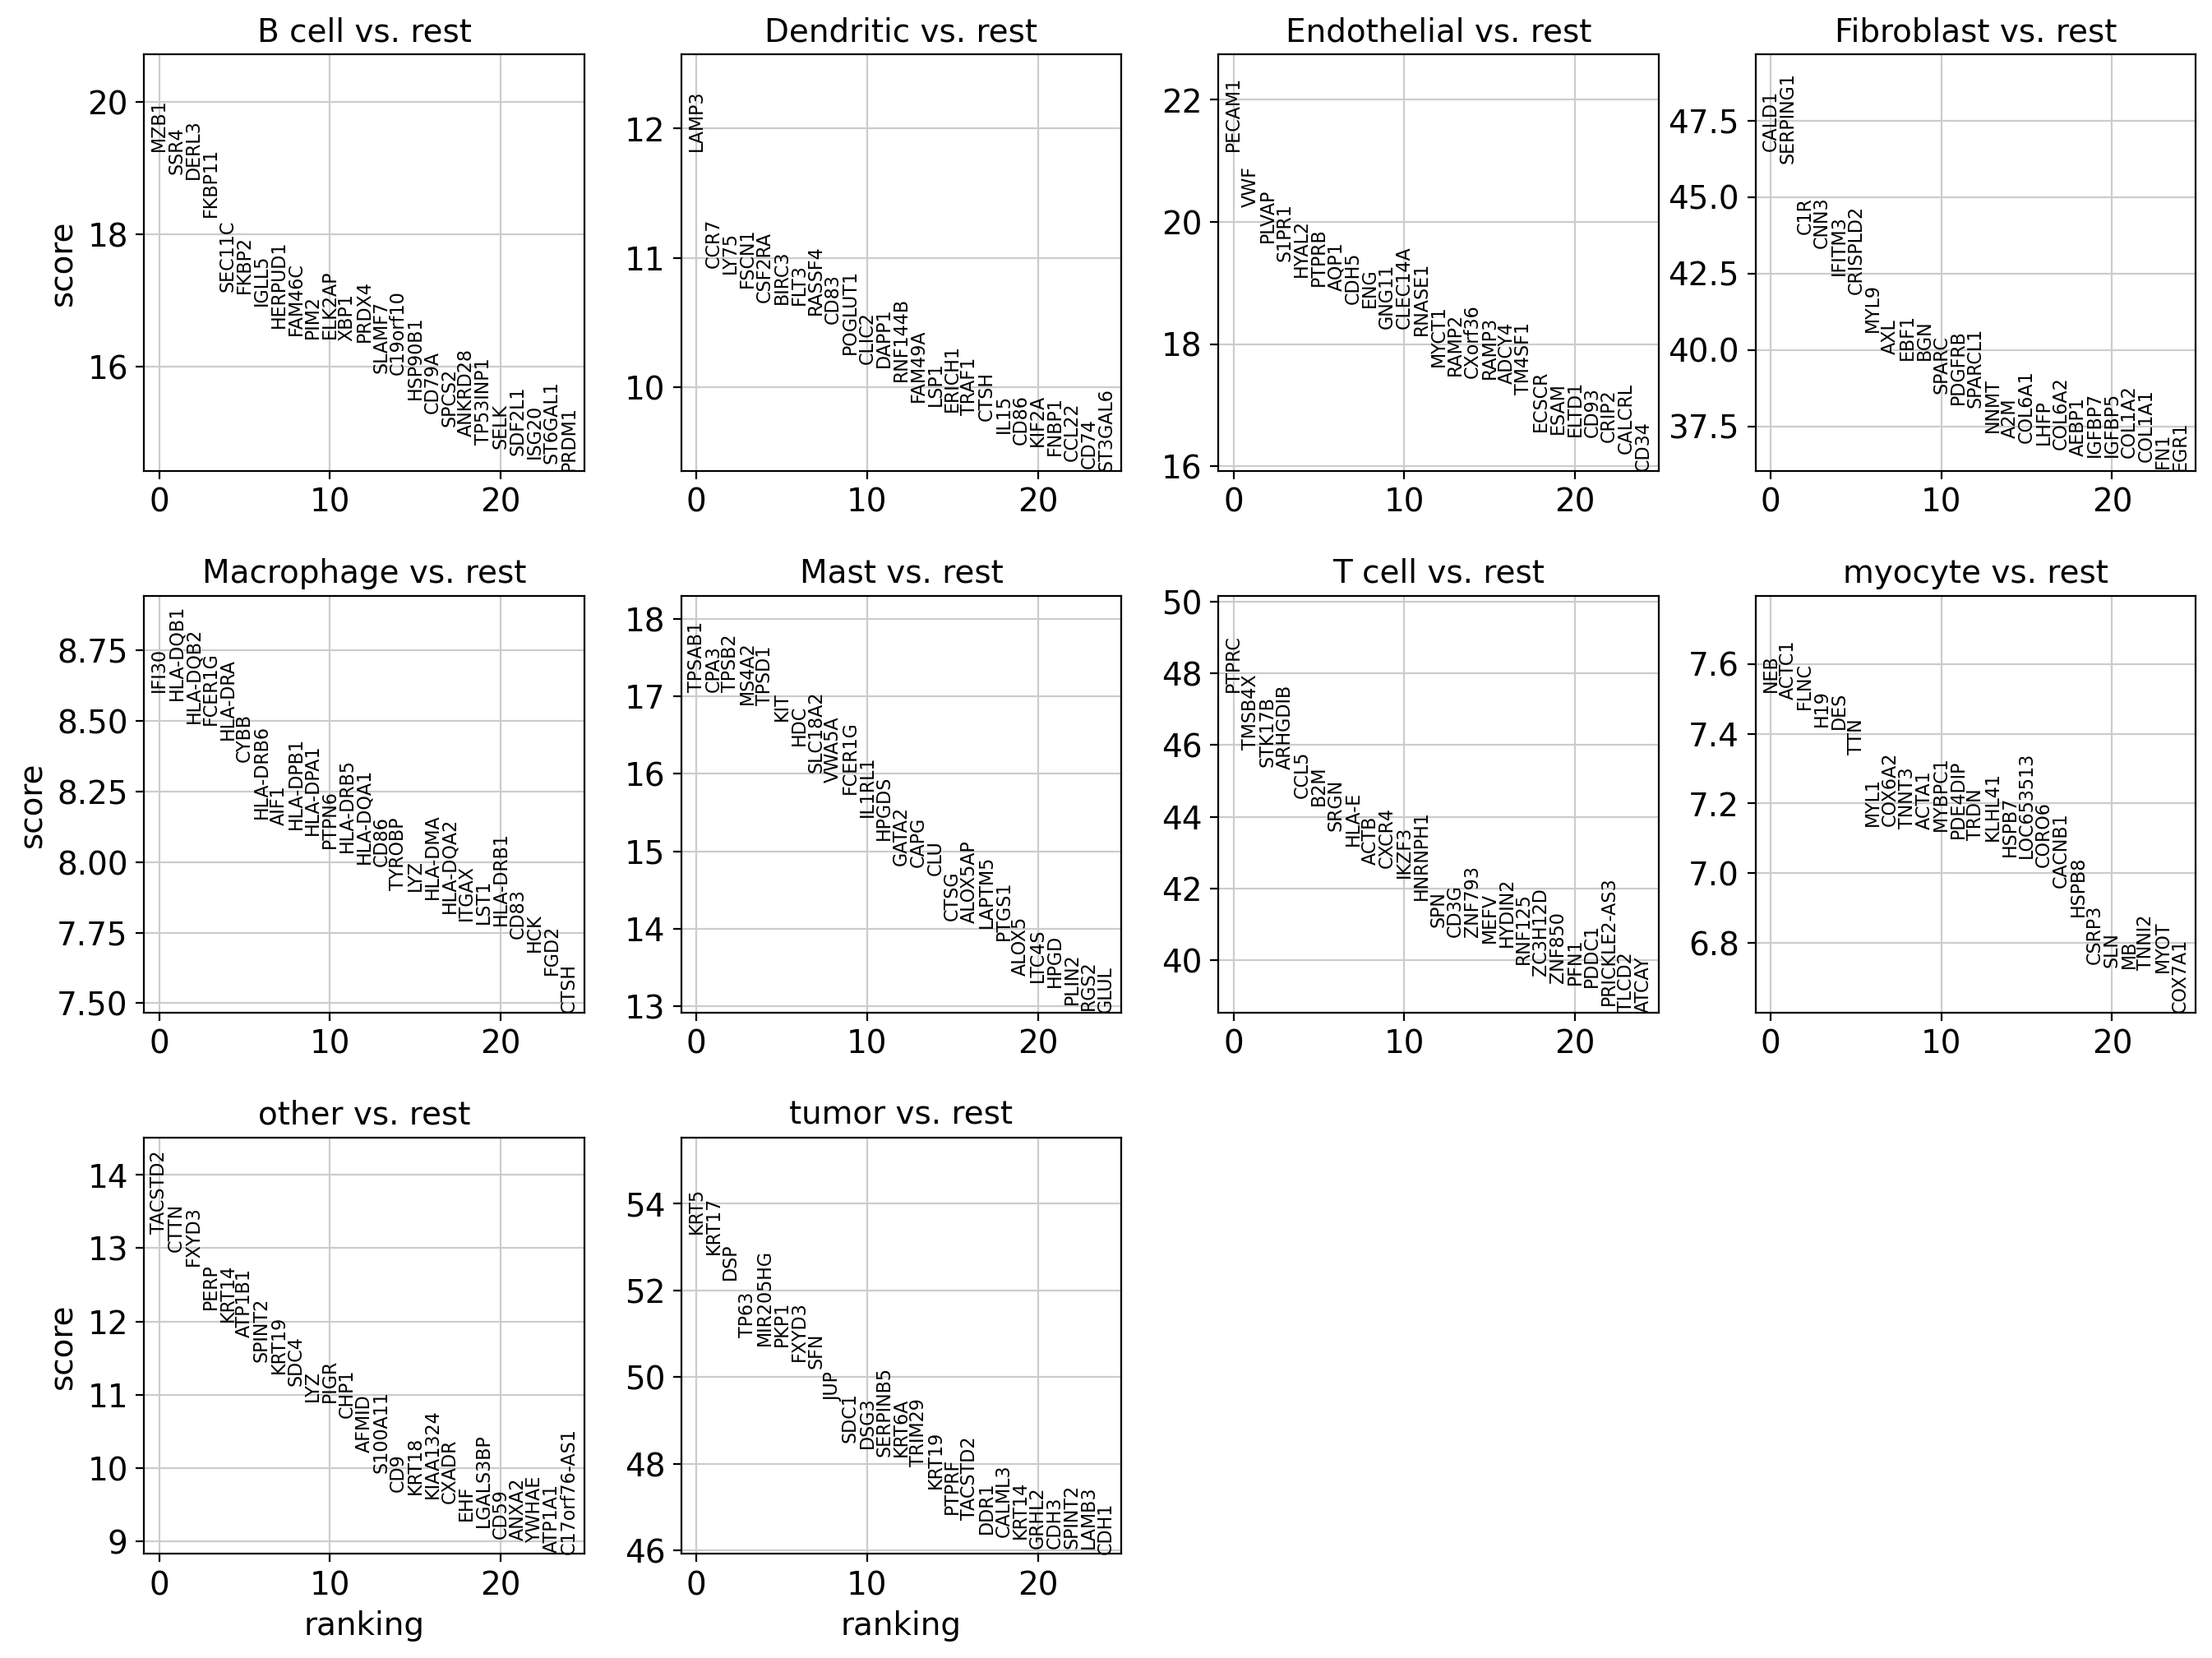

In [260]:
# wilcoxon rank-sum test result
# for cell types
sc.tl.rank_genes_groups(Puram_adata, 'Cell_type', method='wilcoxon')
sc.pl.rank_genes_groups(Puram_adata, n_genes=25, sharey=False)

In [261]:
pd.DataFrame(Puram_adata.uns['rank_genes_groups']['scores'])

B cell  Dendritic  Endothelial  Fibroblast  Macrophage       Mast  \
0      19.264181  11.829137    21.166798   46.515884    8.602474  17.055140   
1      18.906139  10.922486    20.240986   46.097042    8.573101  17.054996   
2      18.832842  10.882851    19.672657   43.788475    8.493812  17.054075   
3      18.270943  10.772662    19.364391   43.326565    8.487092  16.899820   
4      17.134293  10.659432    19.103609   42.457138    8.434361  16.885771   
...          ...        ...          ...         ...         ...        ...   
21432 -11.447855  -6.538550   -10.180514  -30.247297   -5.032023  -9.674672   
21433 -11.717725  -6.551018   -10.465785  -30.524790   -5.105297 -10.164399   
21434 -12.171162  -6.782952   -10.752070  -30.697813   -5.966217 -10.883664   
21435 -13.482319  -6.883967   -13.224868  -31.160852   -6.320171 -11.154072   
21436 -13.704385  -8.596964   -16.881218  -36.143051   -6.377126 -11.824450   

          T cell   myocyte      other      tumor  
0      47.477497  7.519006  13.199584  53.310677  
1      45.871086  7.499246  12.952019  52.830742  
2      45.407005  7.469366  12.761127  52.242168  
3      45.338329  7.419726  12.163373  50.922821  
4      44.536060  7.412818  11.997188  50.732513  
...          ...       ...        ...        ...  
21432 -37.759113 -5.088174  -8.459935 -47.292580  
21433 -38.045422 -5.157012  -8.642124 -48.163849  
21434 -39.254742 -5.327218  -8.853702 -49.145634  
21435 -41.443855 -5.705541  -9.148908 -49.546223  
21436 -41.695065 -5.900808 -10.612232 -51.862671  

[21437 rows x 10 columns]

In [262]:
# genes ranked by differential expression in each pre defined cell types, based on wilcoxon
# a table with the p-val scores and cell types.
result = Puram_adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
DEGs_celltype_wilcoxon = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names', 'pvals']})
DEGs_celltype_wilcoxon

B cell_names  B cell_pvals Dendritic_names  Dendritic_pvals  \
0             MZB1  1.073509e-82           LAMP3     2.759634e-32   
1             SSR4  1.015240e-79            CCR7     8.999767e-28   
2            DERL3  4.063639e-79            LY75     1.391418e-27   
3           FKBP11  1.409943e-74           FSCN1     4.634054e-27   
4           SEC11C  8.234962e-66          CSF2RA     1.575566e-26   
...            ...           ...             ...              ...   
21432         MT2A  2.410367e-30           SYNE2     6.211812e-11   
21433         CNN3  1.034116e-31           CALD1     5.714599e-11   
21434         MYH9  4.427379e-34             CD9     1.177444e-11   
21435       IFITM3  1.987600e-41            IFI6     5.820823e-12   
21436        ANXA1  9.557343e-43          IFITM1     8.185291e-18   

      Endothelial_names  Endothelial_pvals Fibroblast_names  Fibroblast_pvals  \
0                PECAM1       1.932476e-99            CALD1      0.000000e+00   
1                   VWF       4.265438e-91         SERPING1      0.000000e+00   
2                 PLVAP       3.698747e-86              C1R      0.000000e+00   
3                 S1PR1       1.541642e-83             CNN3      0.000000e+00   
4                 HYAL2       2.356235e-81           IFITM3      0.000000e+00   
...                 ...                ...              ...               ...   
21432             GPNMB       2.422782e-24            CXADR     5.662207e-201   
21433             PTPRS       1.240435e-25              EZR     1.222094e-204   
21434            ATP1B1       5.794603e-27             DSG3     6.087210e-207   
21435          LGALS3BP       6.304825e-40             DSC3     3.615593e-213   
21436              CD44       6.185526e-64             F11R     4.783605e-286   

      Macrophage_names  Macrophage_pvals Mast_names    Mast_pvals  \
0                IFI30      7.801565e-18     TPSAB1  3.201110e-65   
1             HLA-DQB1      1.007353e-17       CPA3  3.208894e-65   
2             HLA-DQB2      1.999687e-17      TPSB2  3.259948e-65   
3               FCER1G      2.118720e-17      MS4A2  4.512846e-64   
4              HLA-DRA      3.330189e-17      TPSD1  5.726362e-64   
...                ...               ...        ...           ...   
21432             CNN3      4.853298e-07       CNN3  3.863285e-22   
21433             PTRF      3.302749e-07      ANXA2  2.858783e-24   
21434             CTTN      2.428178e-09     ARID5B  1.379051e-27   
21435             ENAH      2.612743e-10       CTTN  6.840290e-29   
21436             EMP2      1.804420e-10       GLG1  2.918101e-32   

      T cell_names  T cell_pvals myocyte_names  myocyte_pvals other_names  \
0            PTPRC           0.0           NEB   5.519441e-14     TACSTD2   
1           TMSB4X           0.0         ACTC1   6.418595e-14        CTTN   
2           STK17B           0.0          FLNC   8.058232e-14       FXYD3   
3          ARHGDIB           0.0           H19   1.173631e-13        PERP   
4             CCL5           0.0           DES   1.236436e-13       KRT14   
...            ...           ...           ...            ...         ...   
21432          GSN           0.0          LY6E   3.615266e-07       MBNL1   
21433       IFITM3           0.0          PTMA   2.509220e-07        BTG1   
21434          CD9           0.0          MYH9   9.972879e-08         MSN   
21435         CST3           0.0         LPIN3   1.159740e-08      S100A4   
21436         CTTN           0.0        TMSB4X   3.617263e-09         VIM   

        other_pvals tumor_names  tumor_pvals  
0      8.822111e-40        KRT5          0.0  
1      2.288566e-38       KRT17          0.0  
2      2.702638e-37         DSP          0.0  
3      4.870539e-34        TP63          0.0  
4      3.675734e-33    MIR205HG          0.0  
...             ...         ...          ...  
21432  2.675257e-17      EEF1A1          0.0  
21433  5.517747e-18      TMSB4X          0.0  
21434  8.466377e-19        

In [263]:
# extract top 100 DEGs from each cell types
marker_genes = pd.DataFrame()
list_marker_genes = []
for col,gene in DEGs_celltype_wilcoxon[0:100].iteritems():
    if 'names' in col:
        list_marker_genes.extend(gene.tolist())
        marker_genes = pd.concat([marker_genes,gene],axis=1)
        print('detected all',len(gene),' top DEGs in ',col)

detected all 100  top DEGs in  B cell_names
detected all 100  top DEGs in  Dendritic_names
detected all 100  top DEGs in  Endothelial_names
detected all 100  top DEGs in  Fibroblast_names
detected all 100  top DEGs in  Macrophage_names
detected all 100  top DEGs in  Mast_names
detected all 100  top DEGs in  T cell_names
detected all 100  top DEGs in  myocyte_names
detected all 100  top DEGs in  other_names
detected all 100  top DEGs in  tumor_names


In [264]:
marker_genes

B cell_names Dendritic_names Endothelial_names Fibroblast_names  \
0          MZB1           LAMP3            PECAM1            CALD1   
1          SSR4            CCR7               VWF         SERPING1   
2         DERL3            LY75             PLVAP              C1R   
3        FKBP11           FSCN1             S1PR1             CNN3   
4        SEC11C          CSF2RA             HYAL2           IFITM3   
..          ...             ...               ...              ...   
95      KRTCAP2            ISCU             PALMD             TPM1   
96      HNRNPH1        HLA-DQA1              STC1           S100A6   
97        FBXW7             HCK              HEG1            NUPR1   
98          MIF           UBE2F            TGFBR2             GGT5   
99        RRBP1            CD40              FLI1         MTRNR2L2   

   Macrophage_names Mast_names T cell_names myocyte_names other_names  \
0             IFI30     TPSAB1        PTPRC           NEB     TACSTD2   
1          HLA-DQB1       CPA3       TMSB4X         ACTC1        CTTN   
2          HLA-DQB2      TPSB2       STK17B          FLNC       FXYD3   
3            FCER1G      MS4A2      ARHGDIB           H19        PERP   
4           HLA-DRA      TPSD1         CCL5           DES       KRT14   
..              ...        ...          ...           ...         ...   
95           CLEC4A    BHLHE40        VSIG1       APOBEC2     SLC6A14   
96            ICAM1    SLC45A3        HLA-C        NDUFB9      B3GNT6   
97            NR4A3      ABCA1    LOC284023        LIMCH1        PRR4   
98          FAM105A        AHR        RPS27        KLHL30       PTPRF   
99            ARPC3       RHOH       PLCXD1         PADI2      DUSP23   

   tumor_names  
0         KRT5  
1        KRT17  
2          DSP  
3         TP63  
4     MIR205HG  
..         ...  
95       PTHLH  
96       PAICS  
97       MPZL2  
98     S100A14  
99     SERINC2  

[100 rows x 10 columns]

In [265]:
set(list_marker_genes)

{'A2M',
 'ABCA1',
 'ABI3',
 'ABLIM2',
 'ACSL1',
 'ACSL4',
 'ACTA1',
 'ACTA2',
 'ACTB',
 'ACTC1',
 'ACTN2',
 'ADAM19',
 'ADAMTS1',
 'ADCK3',
 'ADCY4',
 'ADCYAP1',
 'ADIRF',
 'ADRBK2',
 'AEBP1',
 'AFMID',
 'AGMAT',
 'AHR',
 'AIF1',
 'AK1',
 'AKAP13',
 'AKAP2',
 'ALDOA',
 'ALOX5',
 'ALOX5AP',
 'ANKRD10',
 'ANKRD28',
 'ANKRD36BP2',
 'ANTXR2',
 'ANXA1',
 'ANXA2',
 'ANXA6',
 'ANXA8L1',
 'ANXA8L2',
 'AP1S3',
 'AP4S1',
 'APOBEC2',
 'AQP1',
 'AREG',
 'ARGFX',
 'ARHGAP10',
 'ARHGAP18',
 'ARHGAP29',
 'ARHGDIB',
 'ARHGEF6',
 'ARPC3',
 'ARRB2',
 'ASAH1',
 'ATCAY',
 'ATP1A1',
 'ATP1B1',
 'ATP5I',
 'ATP5J2',
 'AXL',
 'AZGP1',
 'B2M',
 'B3GNT6',
 'BCL11A',
 'BCL2A1',
 'BCL2L15',
 'BGN',
 'BHLHE40',
 'BIN1',
 'BIRC3',
 'BLCAP',
 'BLNK',
 'BTG1',
 'BTK',
 'BZW1',
 'C16orf54',
 'C17orf76-AS1',
 'C19orf10',
 'C1R',
 'C1S',
 'C1orf162',
 'C1orf186',
 'C1orf210',
 'C21orf62',
 'C4A',
 'C4B',
 'C4B_2',
 'CA3',
 'CA5B',
 'CABP4',
 'CACNB1',
 'CALCRL',
 'CALD1',
 'CALML3',
 'CALR',
 'CAP2',
 'CAPG',
 'CARD8',


In [266]:
len(set(list_marker_genes))

880

In [267]:
marker_genes.to_csv("./Puram/top100DEGs_pseudobulk.csv")

In [268]:
# writing a list of all DEGs
import csv
with open("./Puram/top100DEGs_pseudobulk.txt",'w') as f:
    write = csv.writer(f)
    write.writerow(set(list_marker_genes))

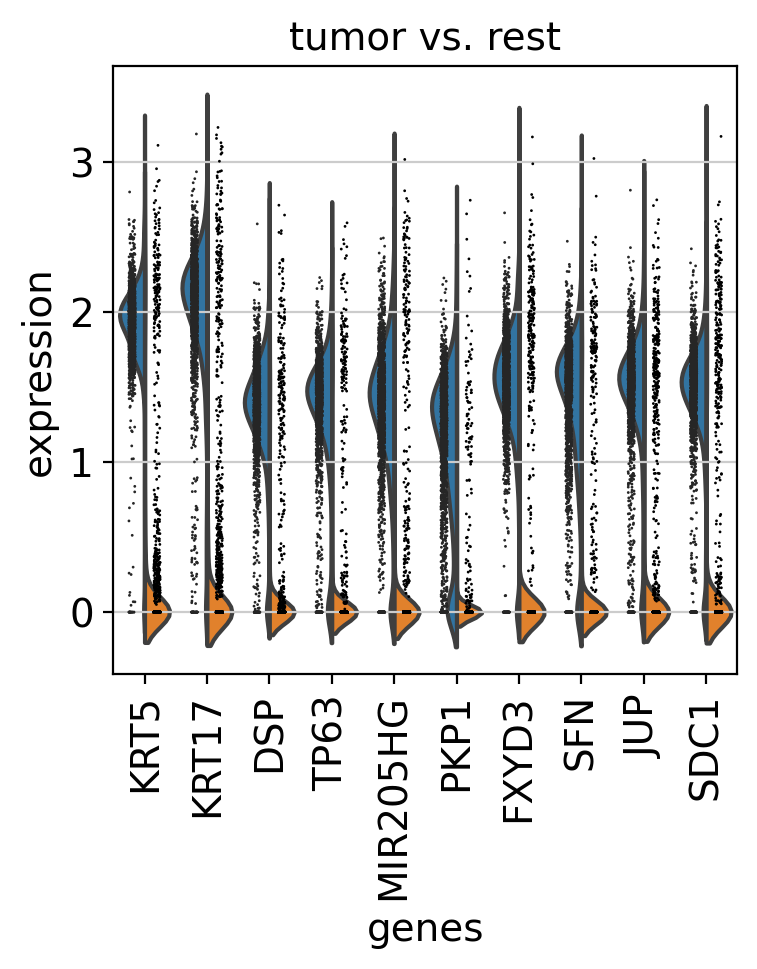

In [270]:
# a more detailed of DEGs look into certain group
sc.pl.rank_genes_groups_violin(Puram_adata, groups='tumor', n_genes=10)

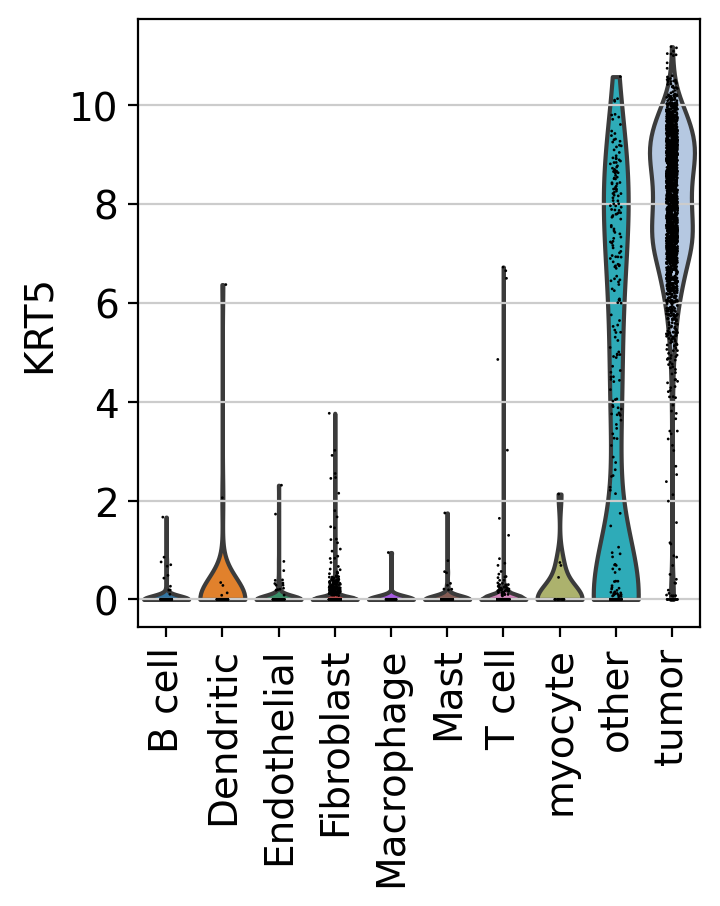

In [277]:
# compare a certain gene across groups
# the gene here is the most DEG in tumor
sc.pl.violin(Puram_tpm_ann, ['KRT5'], groupby='Cell_type',rotation=90)

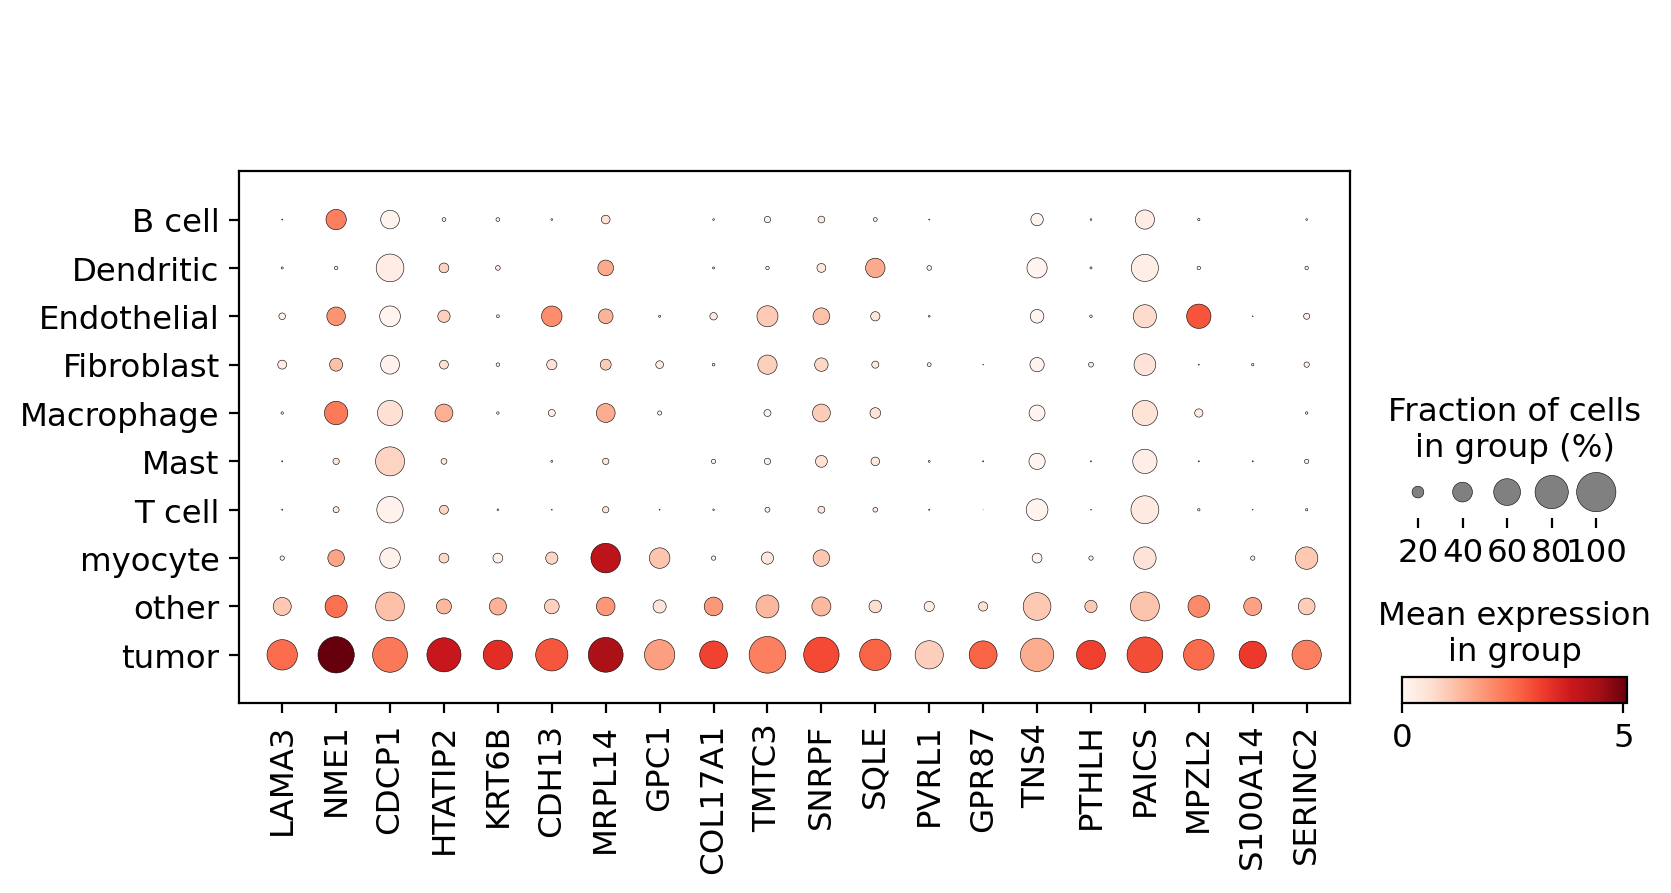

In [273]:
# visualize marker genes
# 20 DEGs from tumor
sc.pl.dotplot(Puram_tpm_ann, list_marker_genes[-20:], groupby='Cell_type')

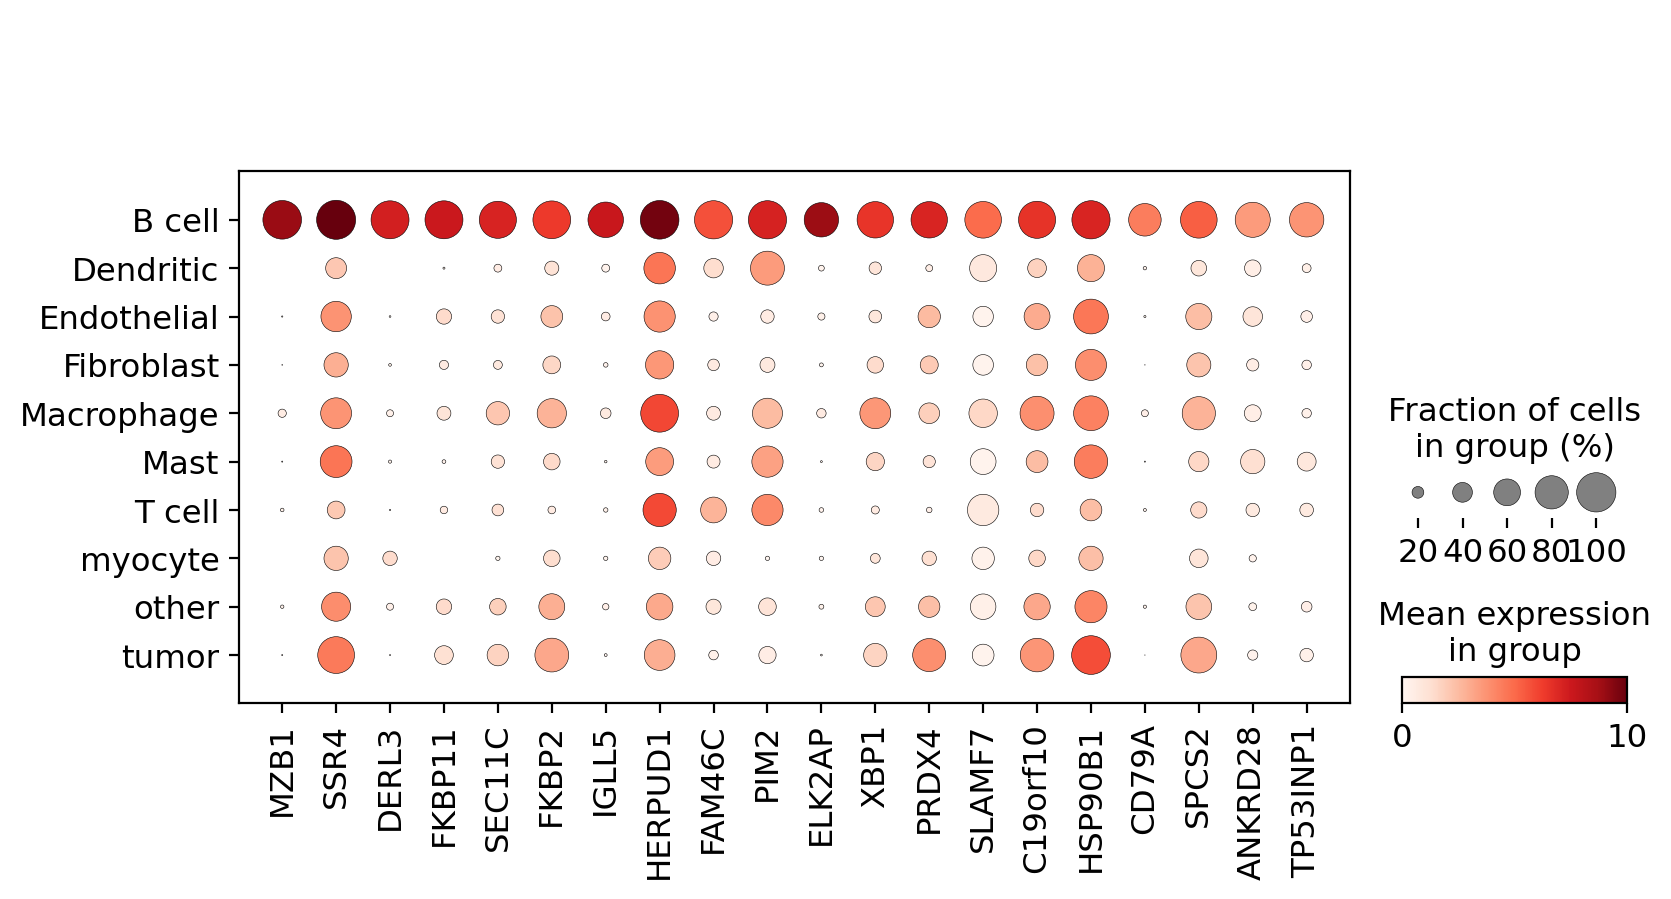

In [274]:
# visualize marker genes
# 20 DEGs from B cell
sc.pl.dotplot(Puram_tpm_ann, list_marker_genes[:20], groupby='Cell_type')

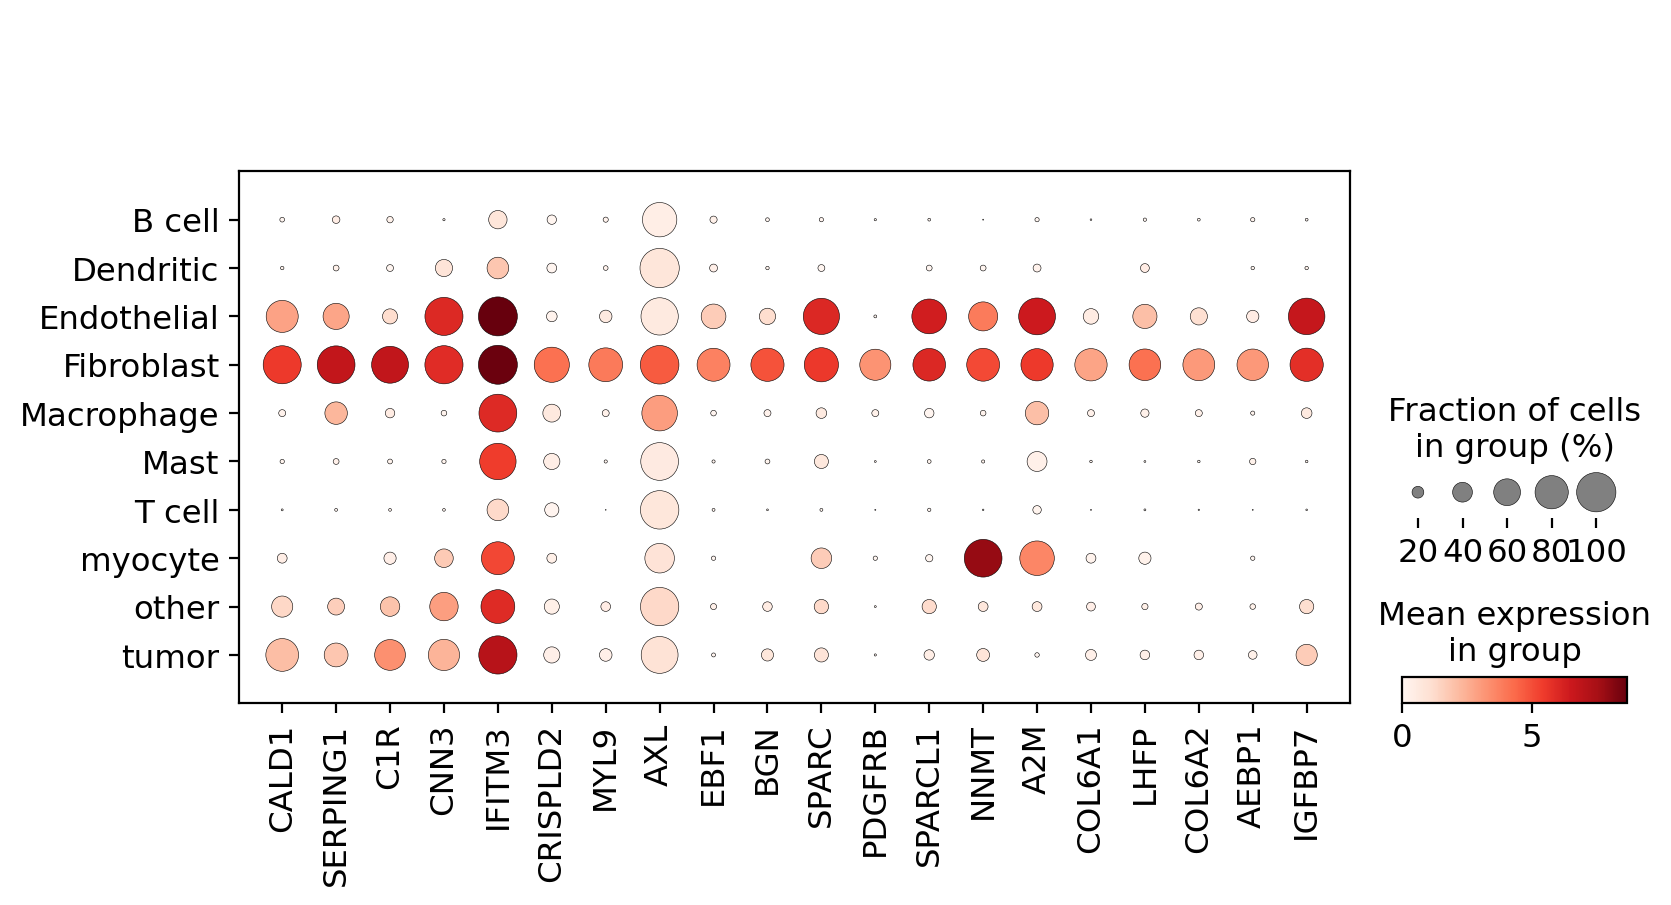

In [275]:
# visualize marker genes
# 20 DEGs from Fibroblast
sc.pl.dotplot(Puram_tpm_ann, list_marker_genes[300:320], groupby='Cell_type')

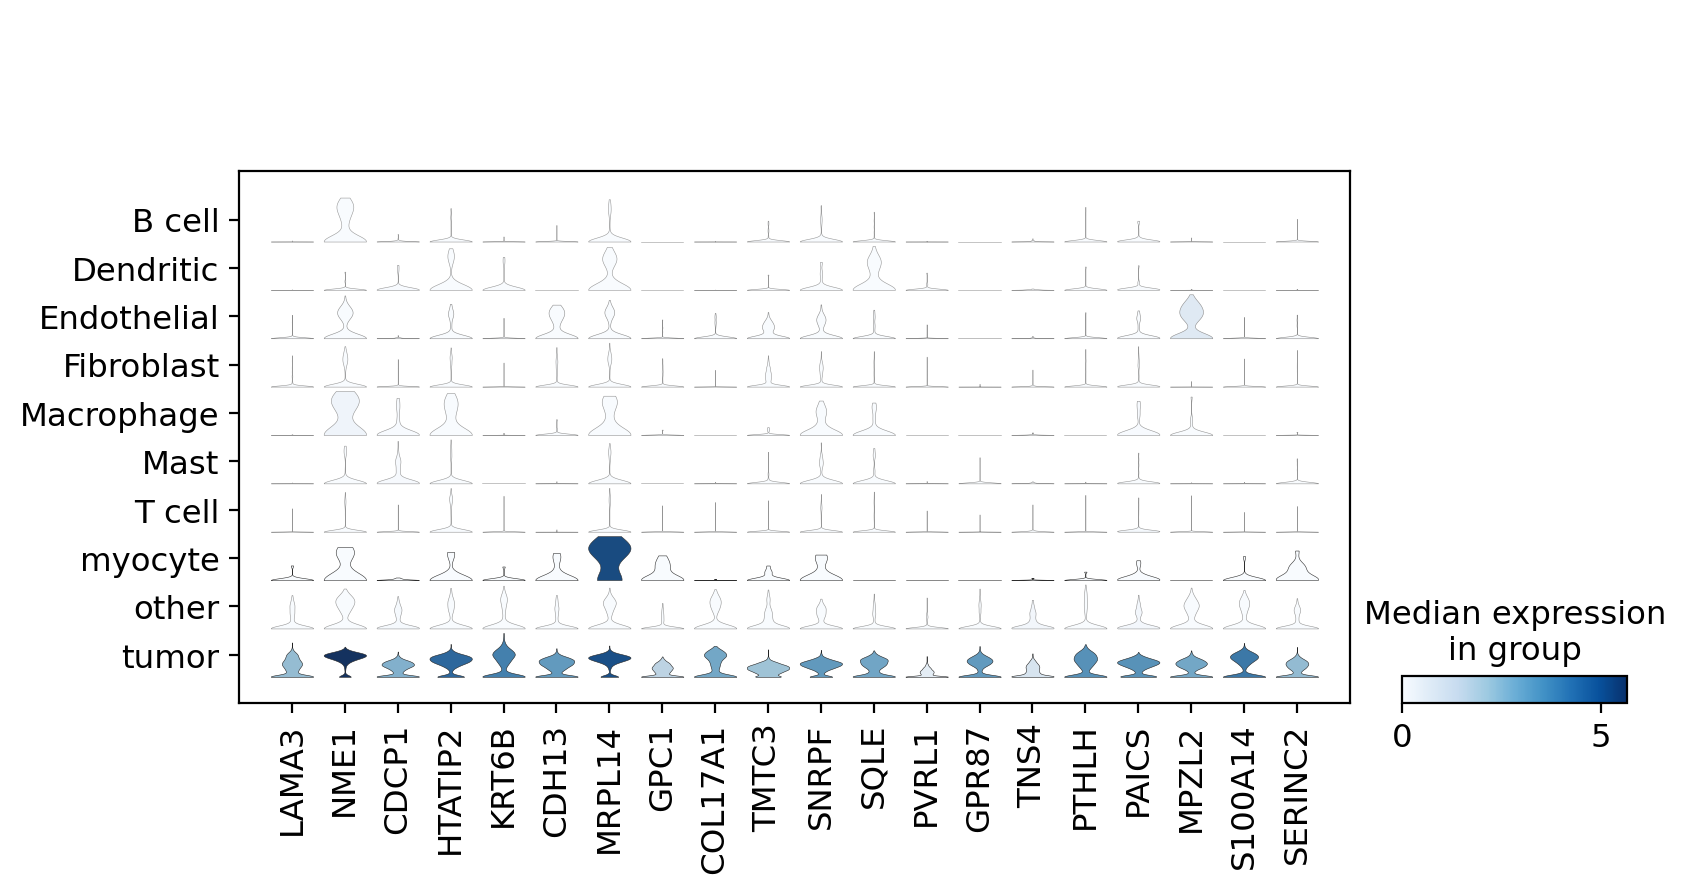

In [276]:
# tumor 20 DEGs in violin plot
sc.pl.stacked_violin(Puram_tpm_ann, list_marker_genes[-20:], groupby='Cell_type', rotation=90);